In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


In [346]:
train_data = pd.read_csv('house_prediction_train.csv')
test_data = pd.read_csv('house_prediction_test.csv')


In [347]:
train_data.shape

(1168, 81)

In [348]:
test_data.shape

(292, 80)

In [349]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [350]:
test_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [351]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [352]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [353]:
train_data.describe(include = 'O').T

count unique      top  freq
MSZoning       1168      5       RL   928
Street         1168      2     Pave  1164
Alley            77      2     Grvl    41
LotShape       1168      4      Reg   740
LandContour    1168      4      Lvl  1046
Utilities      1168      1   AllPub  1168
LotConfig      1168      5   Inside   842
LandSlope      1168      3      Gtl  1105
Neighborhood   1168     25    NAmes   182
Condition1     1168      9     Norm  1005
Condition2     1168      8     Norm  1154
BldgType       1168      5     1Fam   981
HouseStyle     1168      8   1Story   578
RoofStyle      1168      6    Gable   915
RoofMatl       1168      8  CompShg  1144
Exterior1st    1168     14  VinylSd   396
Exterior2nd    1168     15  VinylSd   387
MasVnrType      465      3  BrkFace   354
ExterQual      1168      4       TA   717
ExterCond      1168      5       TA  1022
Foundation     1168      6   CBlock   516
BsmtQual       1138      4       TA   517
BsmtCond       1138      4       TA  1041
BsmtExposure   1137      4       No   756
BsmtFinType1   1138      6      Unf   345
BsmtFinType2   1137      6      Unf  1002
Heating        1168      6     GasA  1143
HeatingQC      1168      5       Ex   585
CentralAir     1168      2        Y  1090
Electrical     1168      5    SBrkr  1070
KitchenQual    1168      4       TA   578
Functional     1168      7      Typ  1085
FireplaceQu     617      5       Gd   301
GarageType     1104      6   Attchd   691
GarageFinish   1104      3      Unf   487
GarageQual     1104      5       TA  1050
GarageCond     1104      5       TA  1061
PavedDrive     1168      3        Y  1071
PoolQC            7      3       Gd     3
Fence           237      4    MnPrv   129
MiscFeature      44      4     Shed    40
SaleType       1168      9       WD   999
SaleCondition  1168      6   Normal   945

In [354]:
train_data.drop('Alley' , axis =1 , inplace = True)
test_data.drop('Alley' , axis = 1 , inplace = True)
train_data['MasVnrType'].fillna('None' , inplace = True)
test_data['MasVnrType'].fillna('None' , inplace = True)

In [355]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean() , inplace = True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean() , inplace = True)

In [356]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [357]:
train_data['BsmtQual'].value_counts()

BsmtQual
TA    517
Gd    498
Ex     94
Fa     29
Name: count, dtype: int64

In [358]:
train_data['BsmtCond'].value_counts()

BsmtCond
TA    1041
Gd      56
Fa      39
Po       2
Name: count, dtype: int64

In [359]:
train_data['BsmtQual'].fillna('None' , inplace = True)
train_data['BsmtCond'].fillna('None' , inplace = True)
test_data['BsmtQual'].fillna('None' , inplace = True)
test_data['BsmtCond'].fillna('None' , inplace = True)

In [360]:
train_data['BsmtExposure'].fillna('None' , inplace = True)
train_data['BsmtFinType1'].fillna('None' , inplace = True)
train_data['BsmtFinType2'].fillna('None' , inplace = True)
test_data['BsmtExposure'].fillna('None' , inplace = True)
test_data['BsmtFinType1'].fillna('None' , inplace = True)
test_data['BsmtFinType2'].fillna('None' , inplace = True)


In [361]:
train_data['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [362]:
train_data.drop(['PoolQC', 'MiscFeature', 'Fence'], axis=1, inplace=True)
test_data.drop(['PoolQC', 'MiscFeature', 'Fence'], axis=1, inplace=True)


In [363]:
train_data['GarageType'].fillna('None' , inplace = True)



In [364]:
train_data['MasVnrArea'].fillna(0 , inplace = True)
test_data['MasVnrArea'].fillna(0 , inplace = True)

In [365]:
train_data['FireplaceQu'].fillna('None' , inplace = True)
test_data['FireplaceQu'].fillna('None' , inplace = True)

In [366]:
train_data['GarageYrBlt'].fillna(0 , inplace = True)
test_data['GarageYrBlt'].fillna(0 , inplace = True)
train_data['GarageQual'].fillna('None' , inplace = True)
test_data['GarageQual'].fillna('None' , inplace = True)
train_data['GarageCond'].fillna('None' , inplace = True)
test_data['GarageCond'].fillna('None' , inplace = True)
train_data['GarageFinish'].fillna('None' , inplace = True)
test_data['GarageFinish'].fillna('None' , inplace = True)

In [367]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [368]:
test_data['GarageType'].fillna('None' , inplace = True)

In [369]:
test_data['Electrical'].fillna('SBrkr' , inplace = True)

In [370]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL     70.98847     4928   Pave      IR1         Lvl   
1  889          20       RL     95.00000    15865   Pave      IR1         Lvl   
2  793          60       RL     92.00000     9920   Pave      IR1         Lvl   
3  110          20       RL    105.00000    11751   Pave      IR1         Lvl   
4  422          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub    Inside  ...             0         0         224        0   
2    AllPub   CulDSac  ...             0         0           0        0   
3    AllPub    Inside  ...             0         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 77 columns]

In [371]:
train_data['ScreenPorch'].value_counts()

ScreenPorch
0      1073
192       5
224       5
189       4
180       3
       ... 
273       1
99        1
122       1
80        1
130       1
Name: count, Length: 65, dtype: int64

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

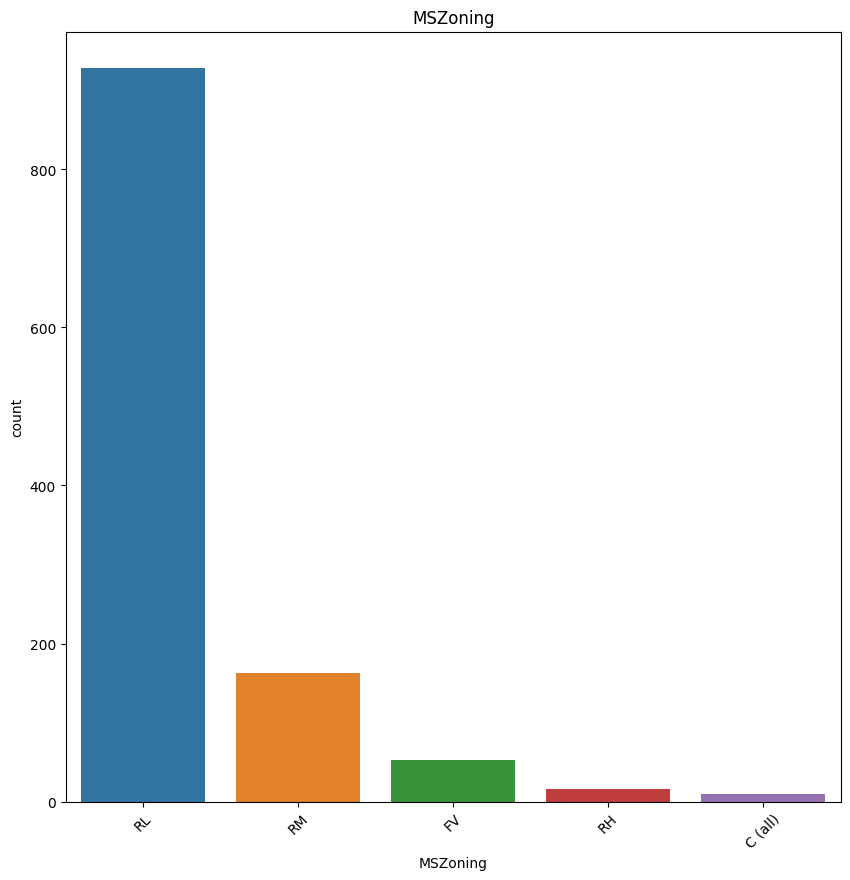

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

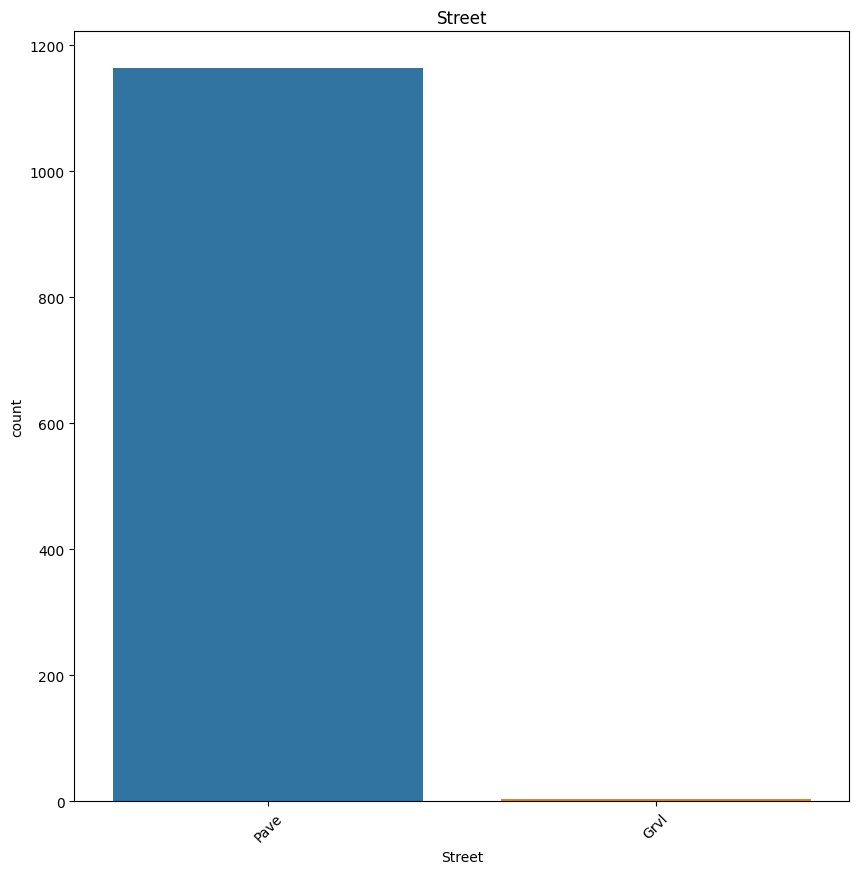

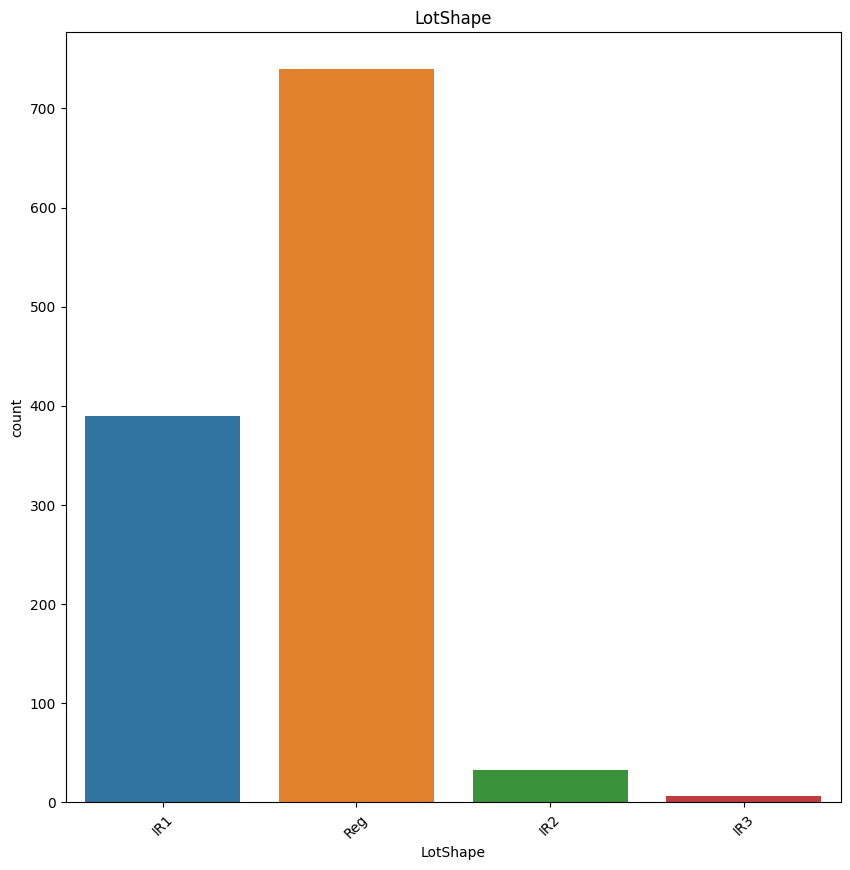

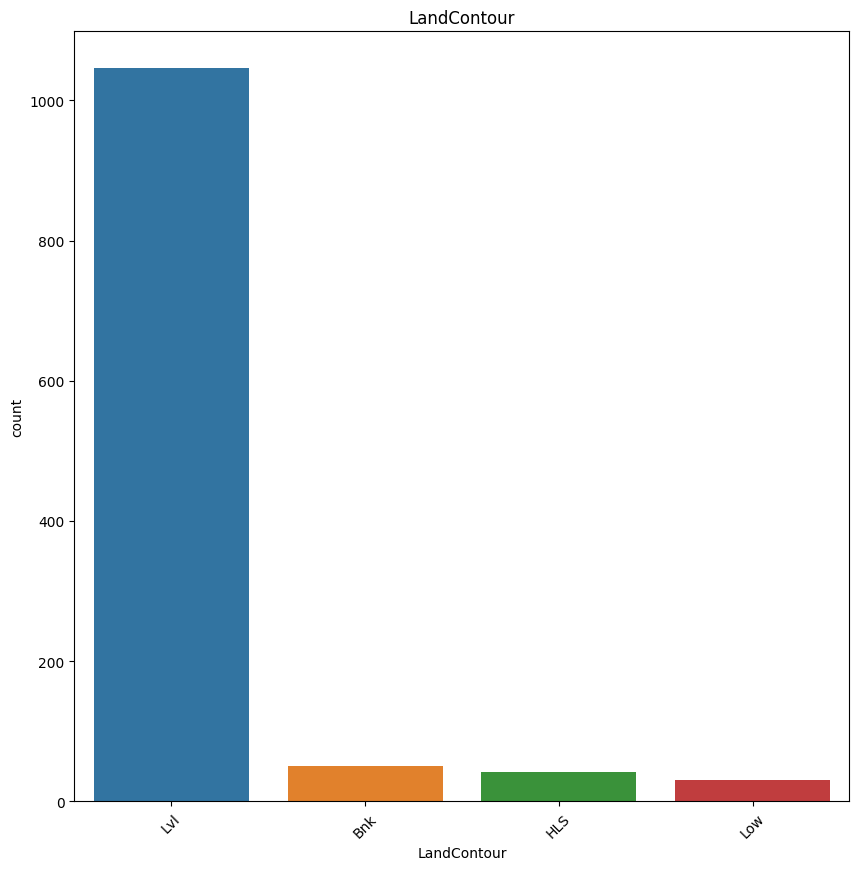

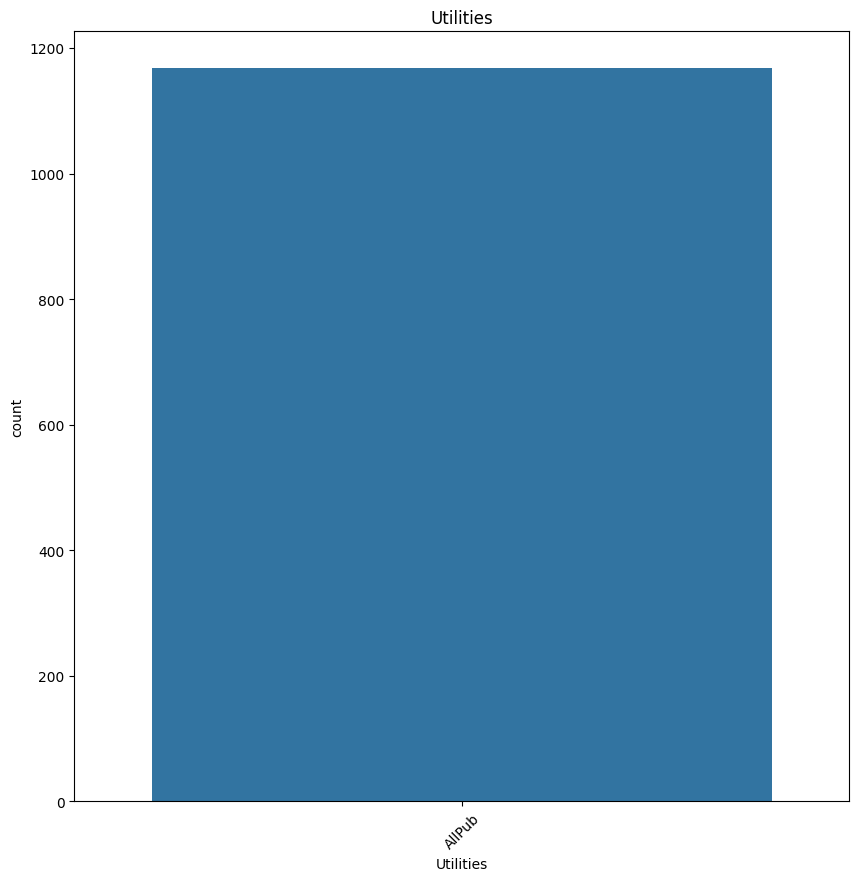

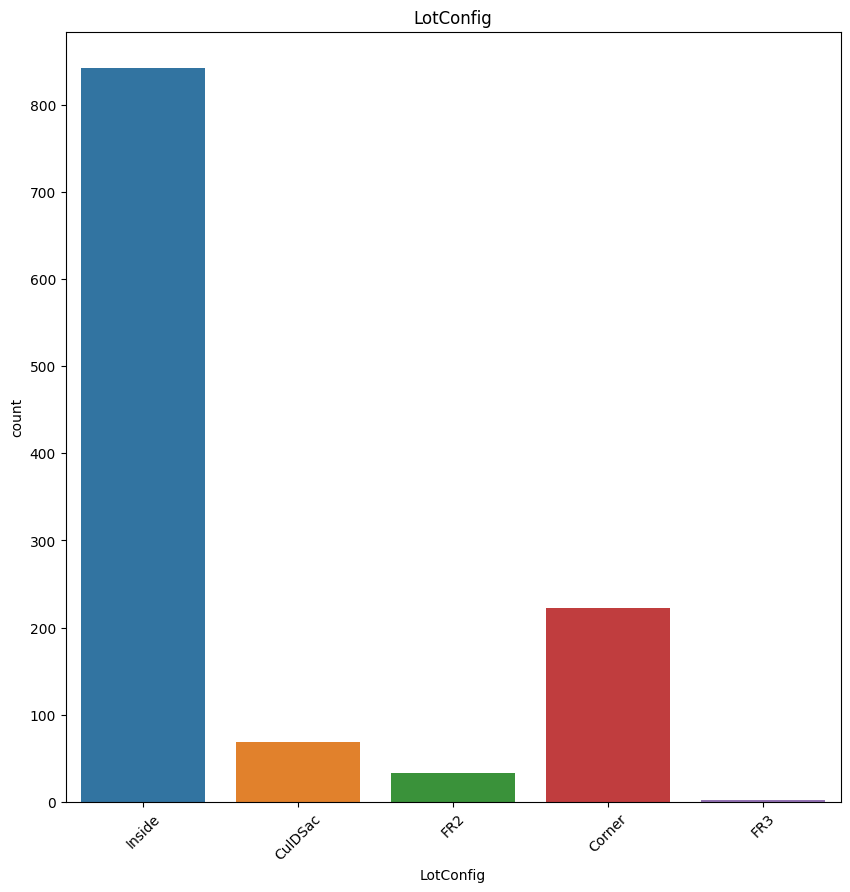

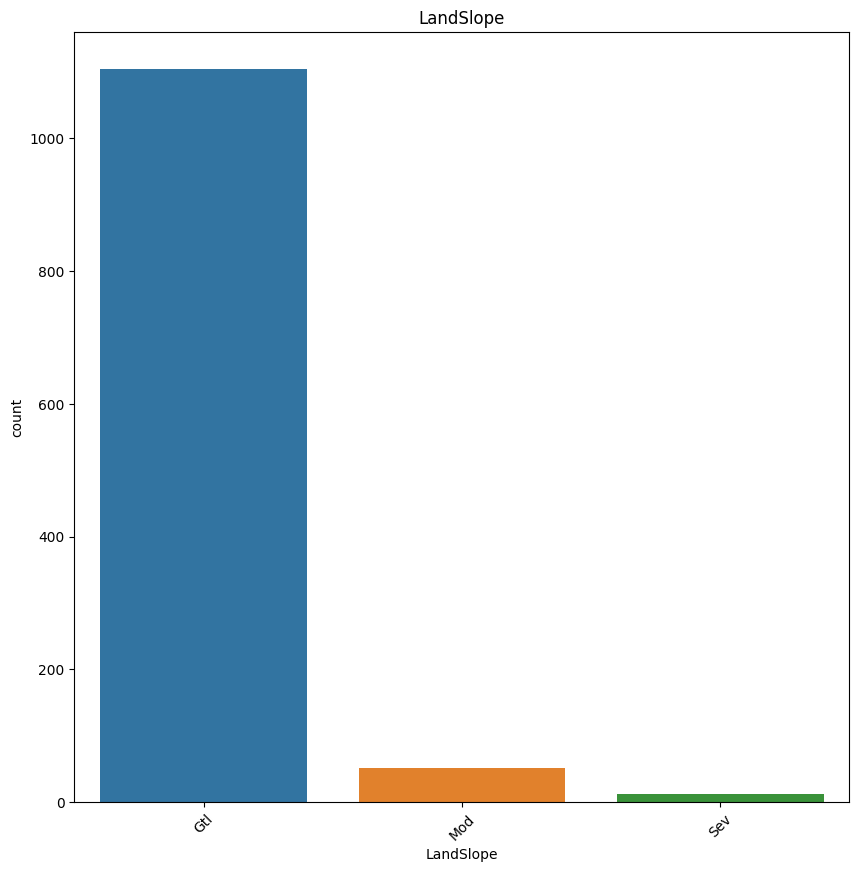

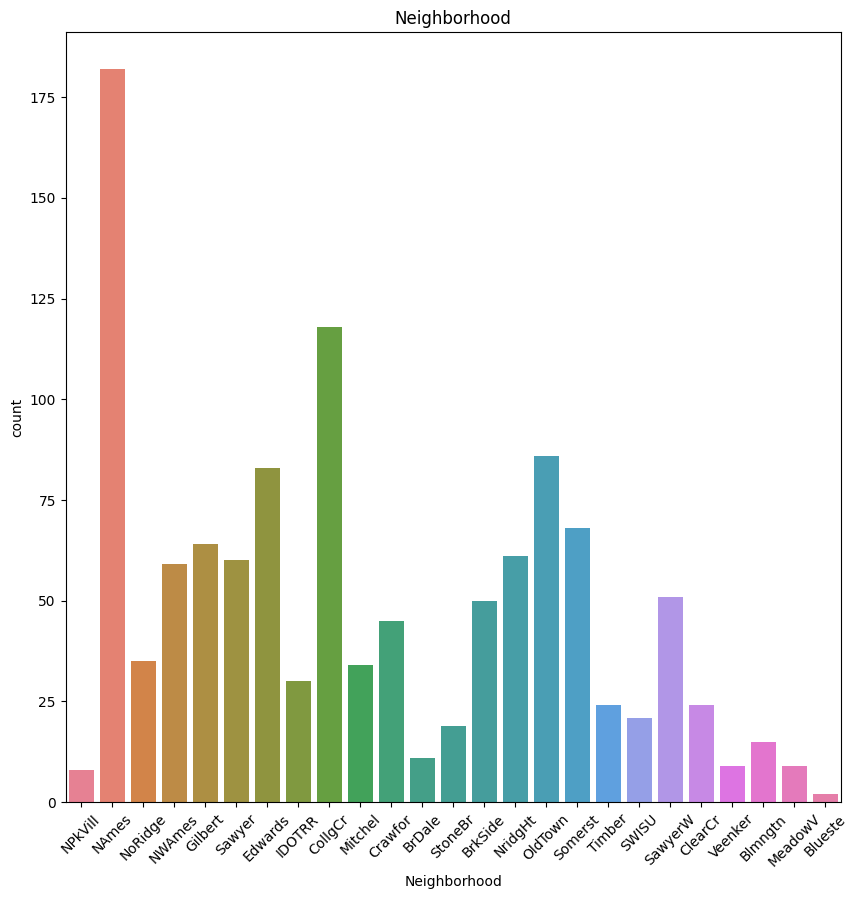

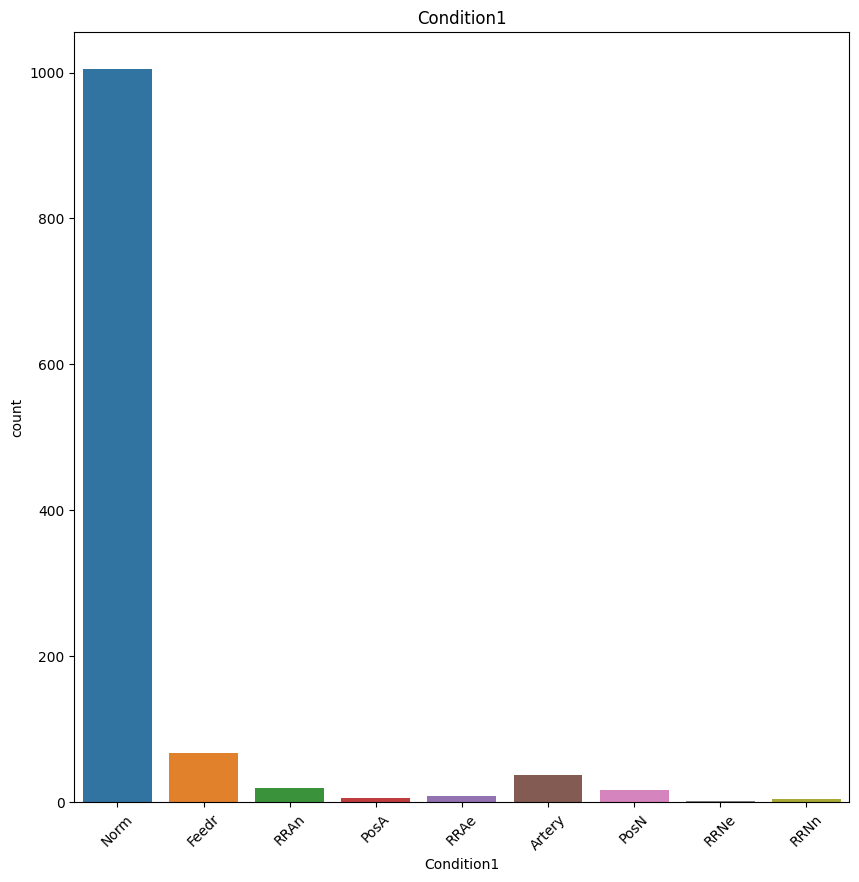

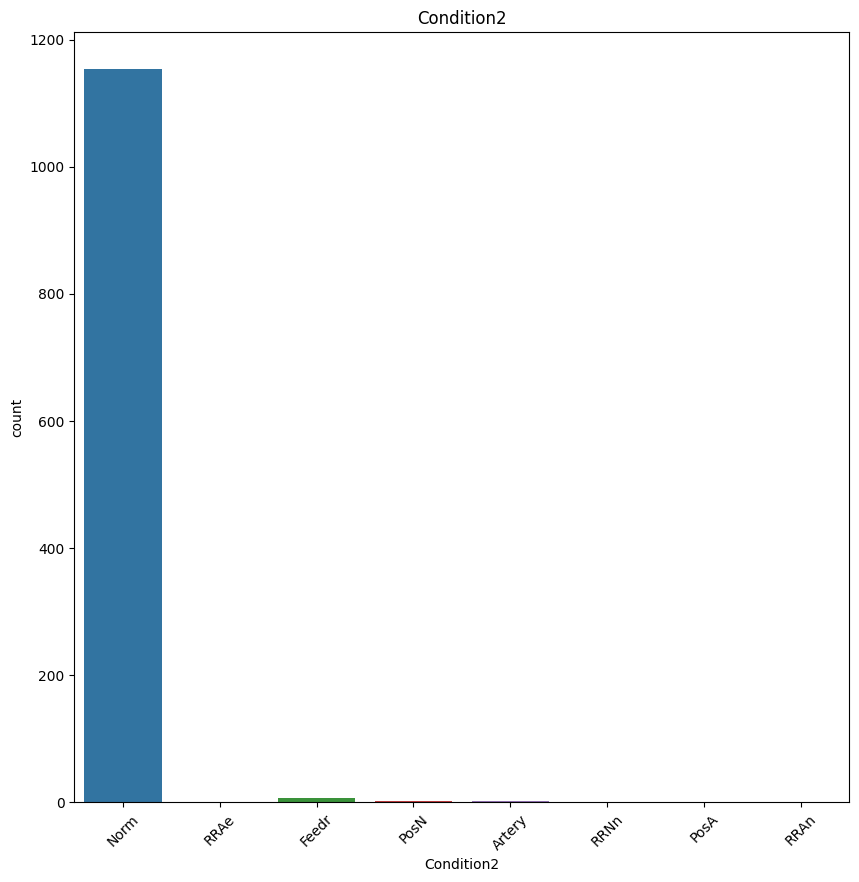

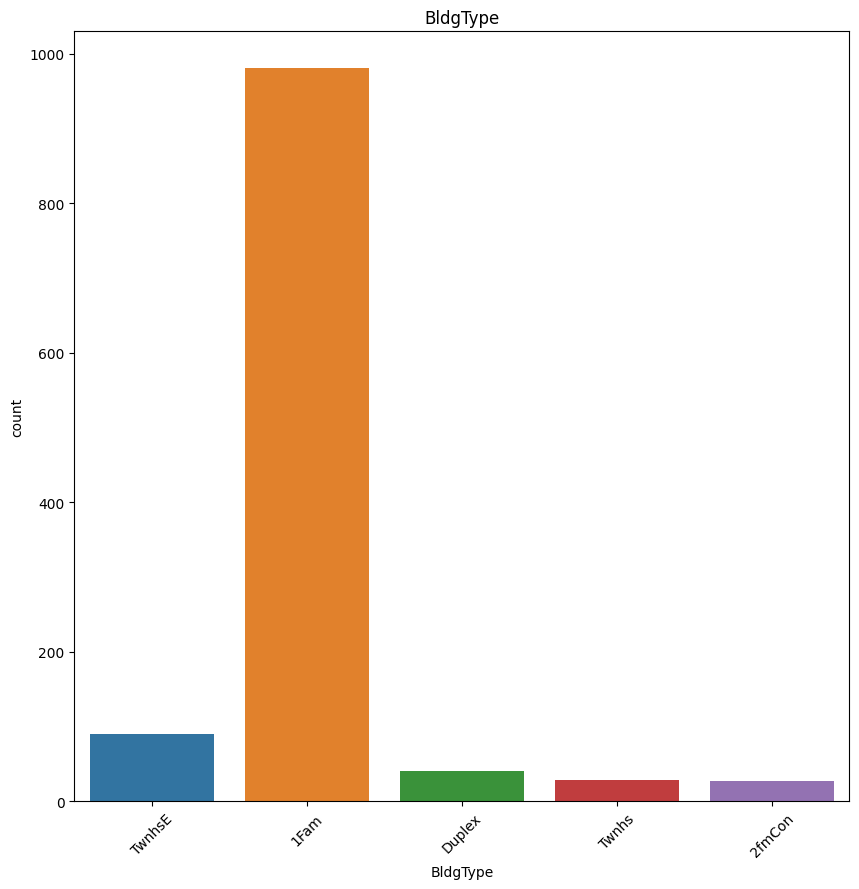

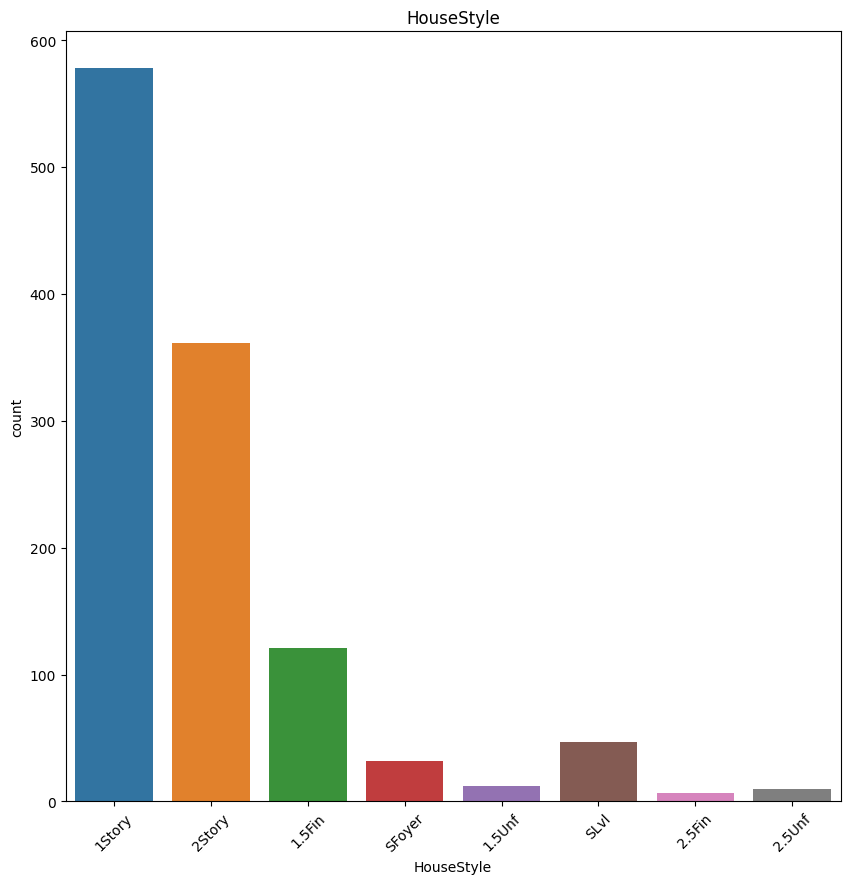

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

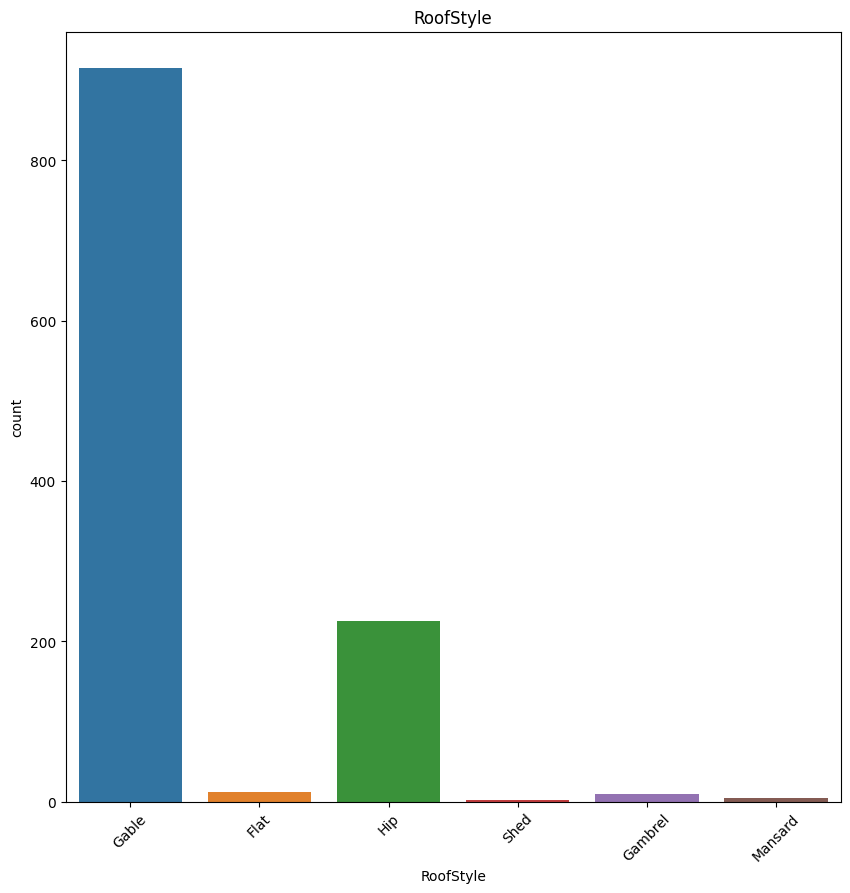

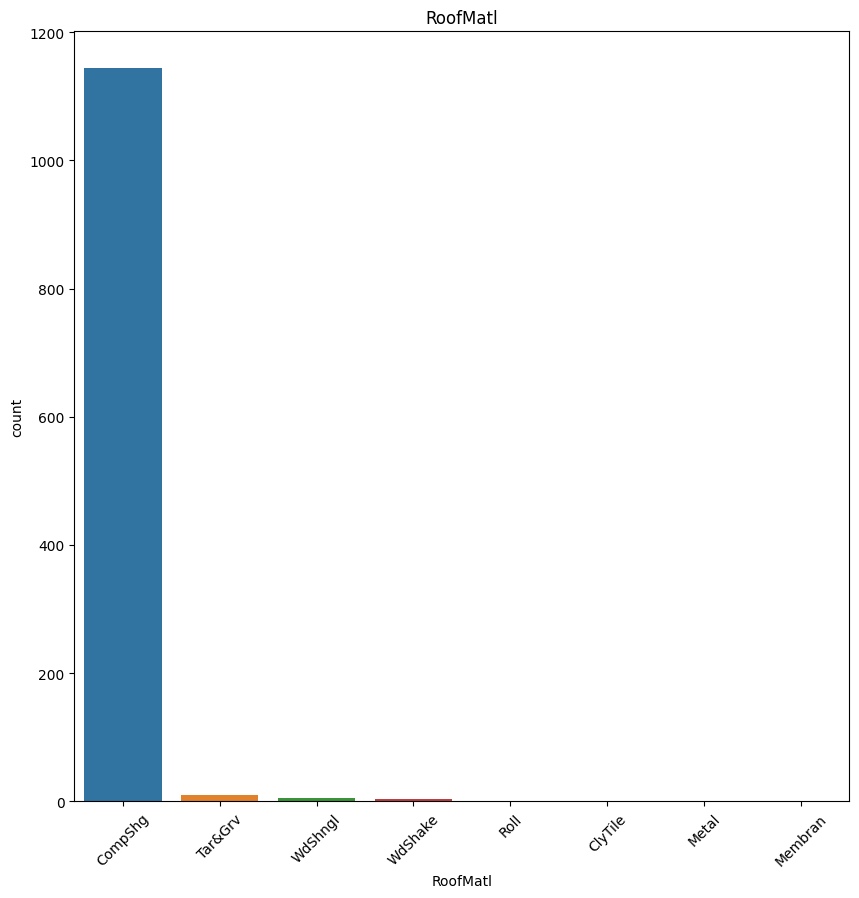

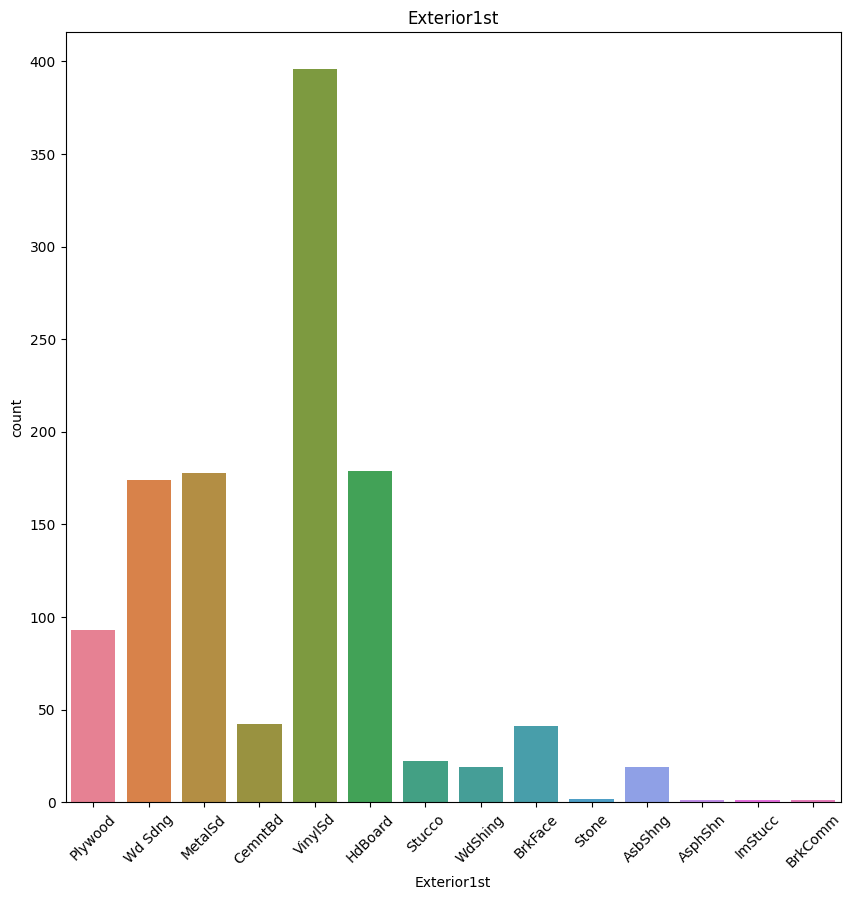

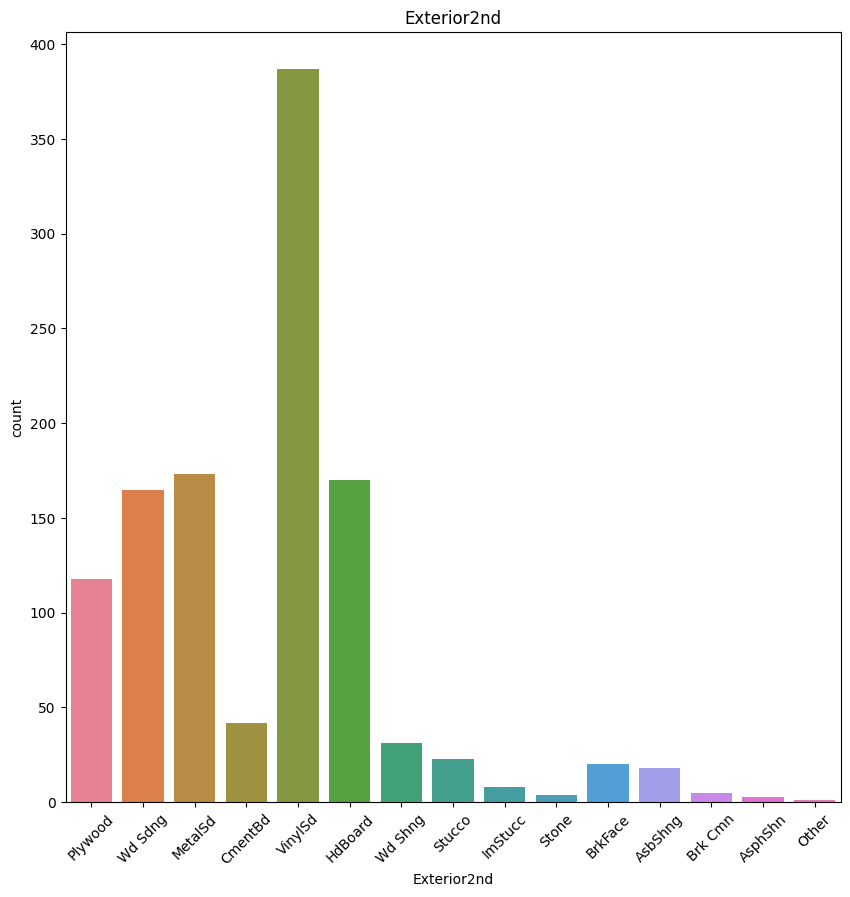

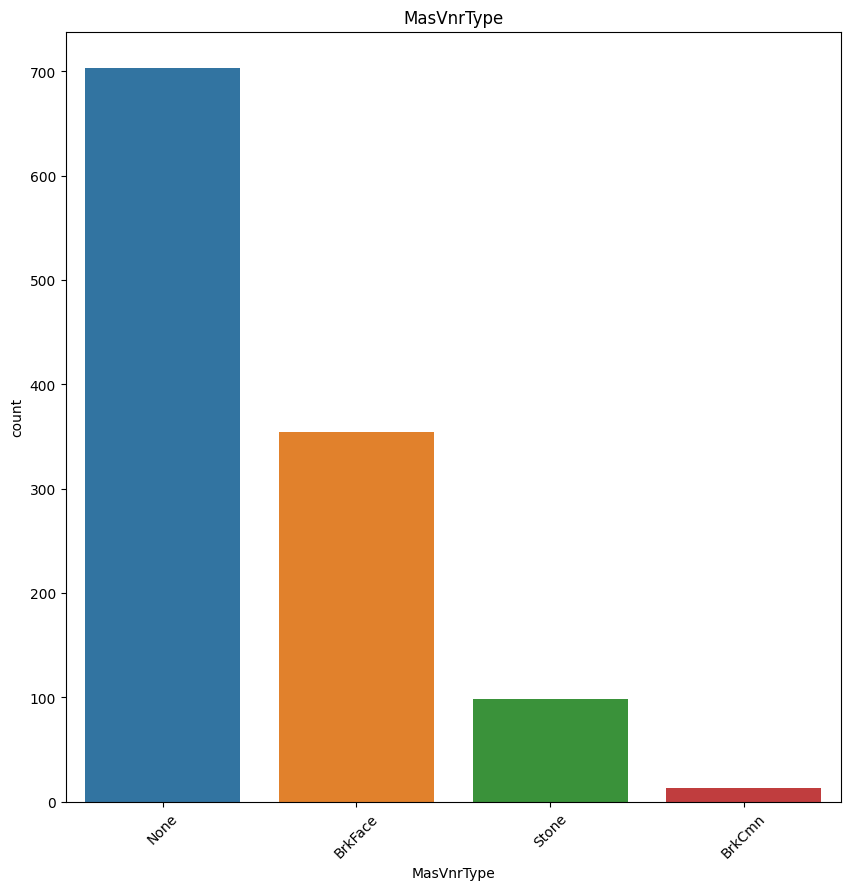

<Figure size 1000x1000 with 0 Axes>

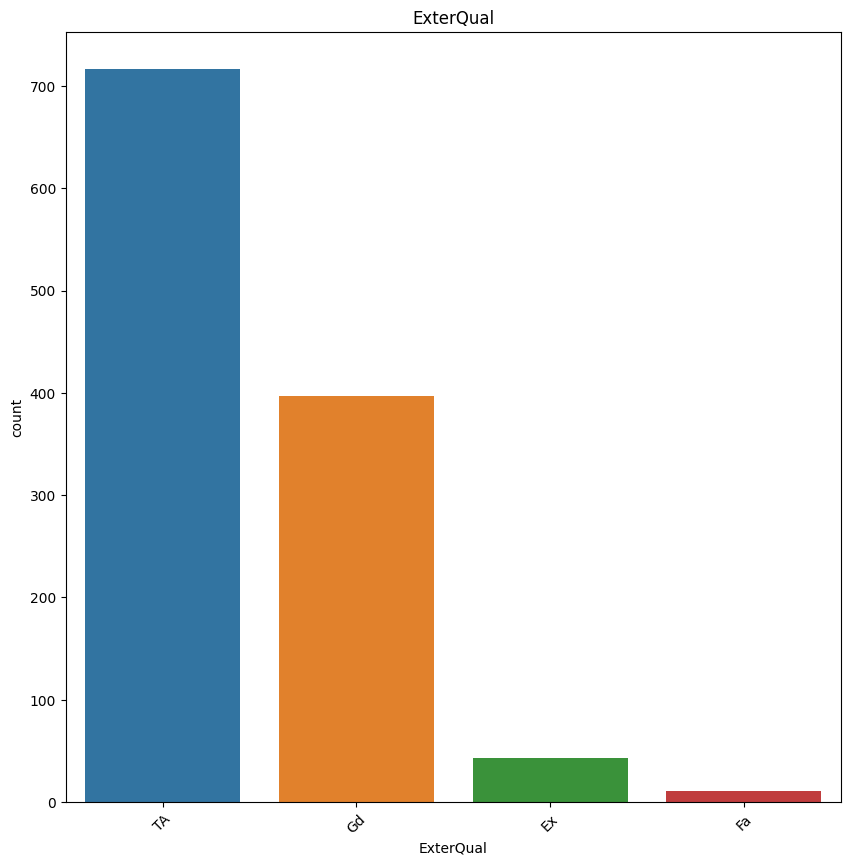

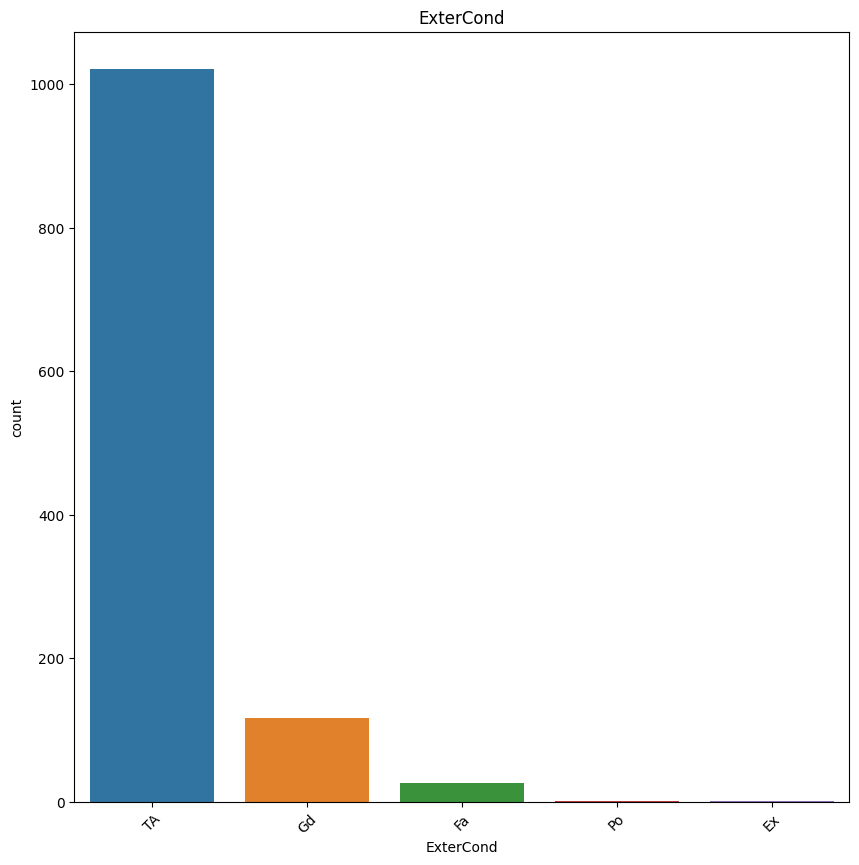

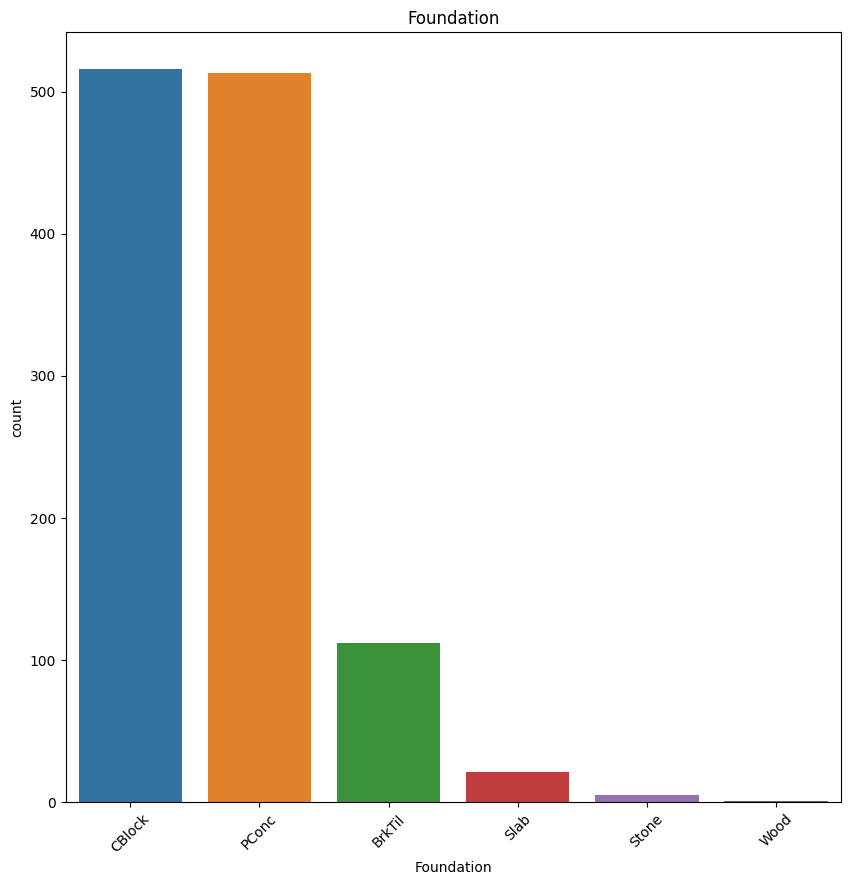

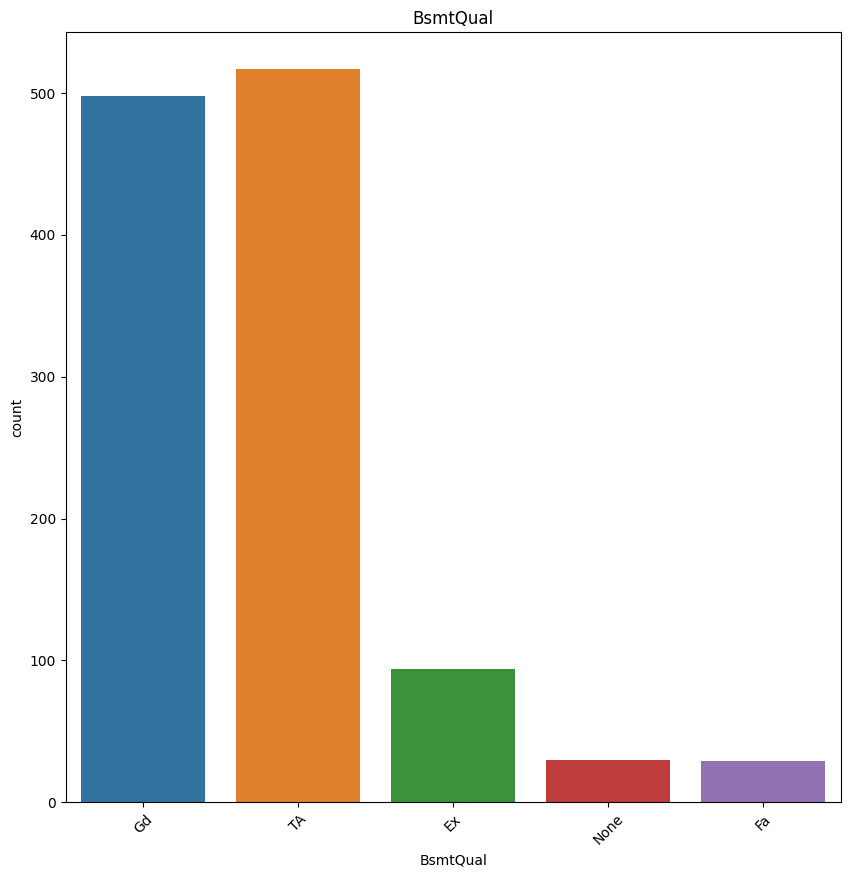

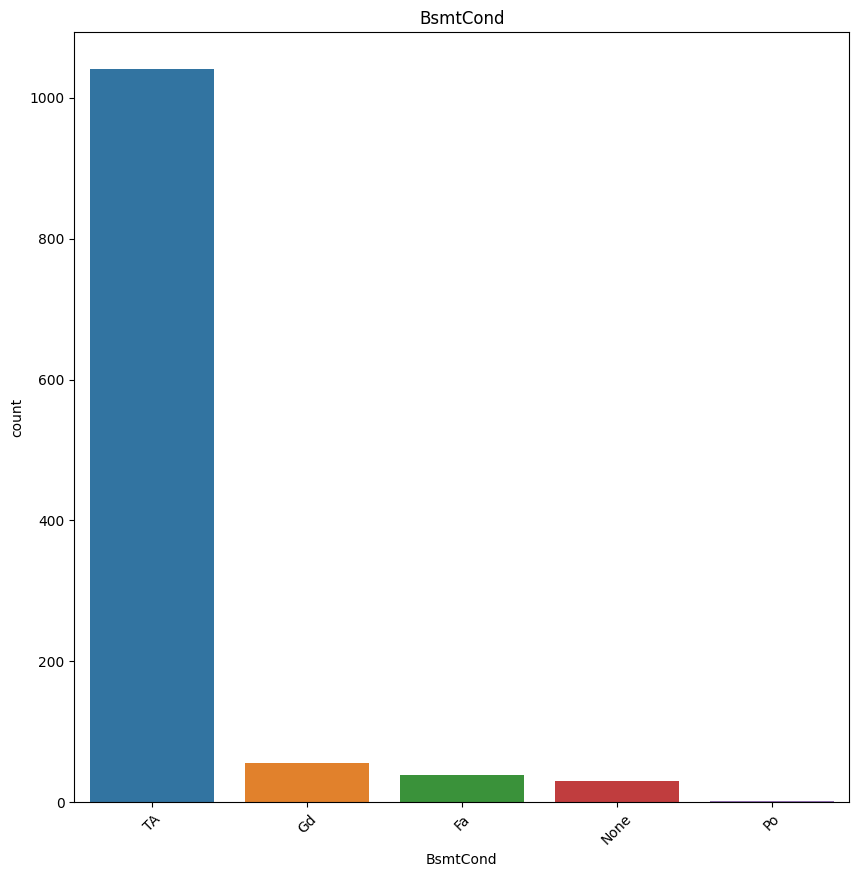

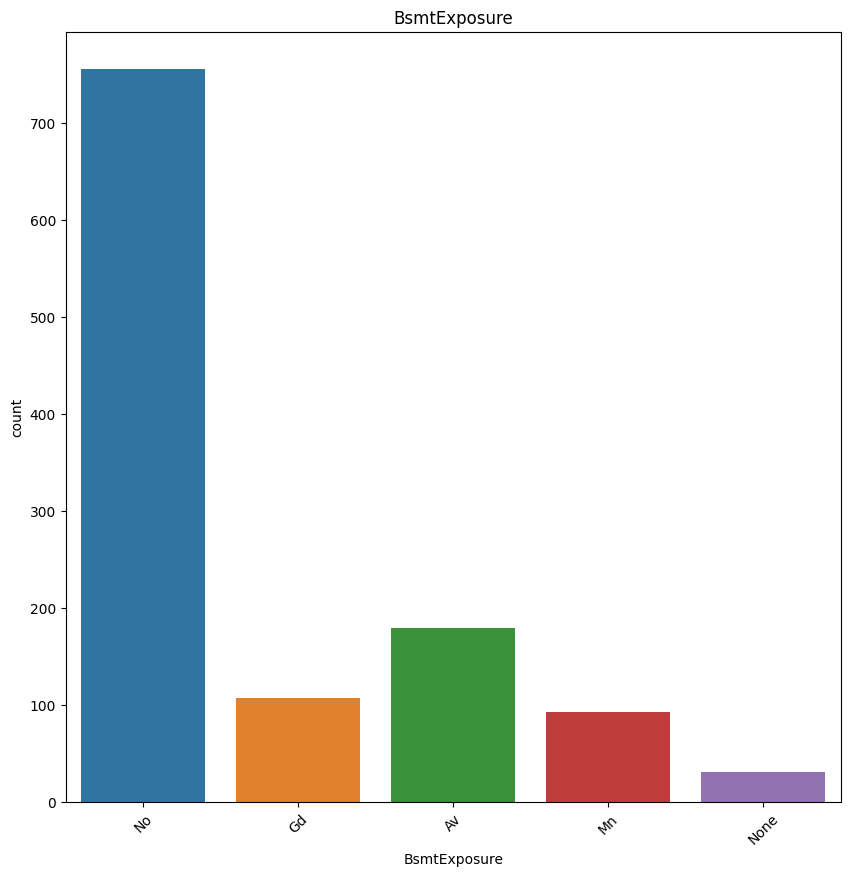

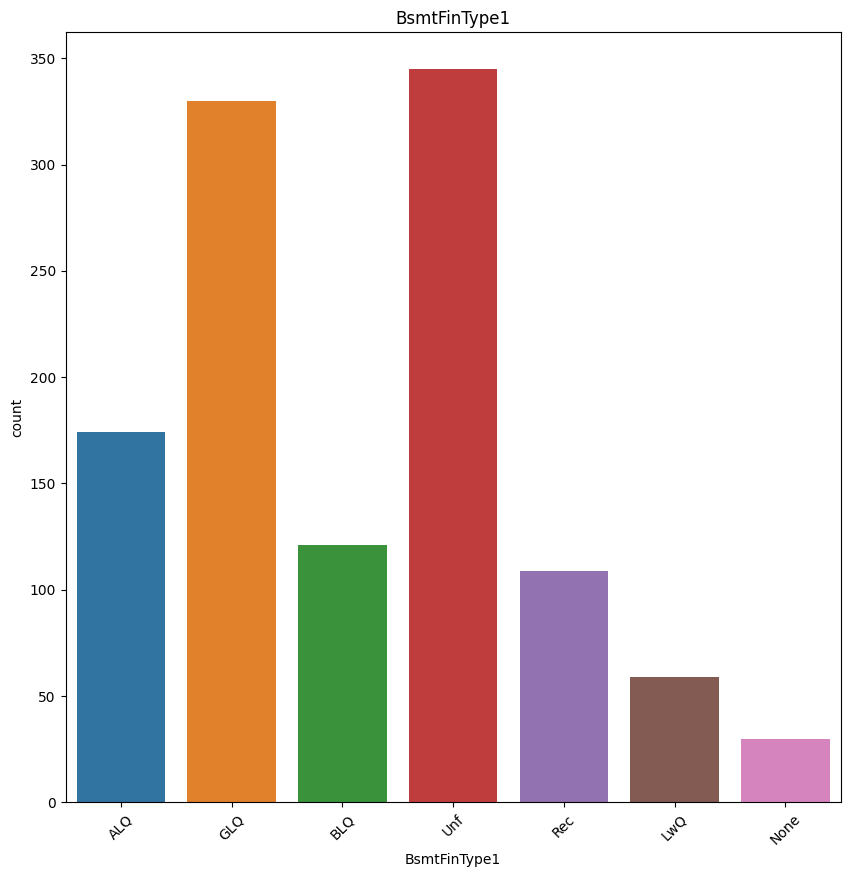

<Figure size 1000x1000 with 0 Axes>

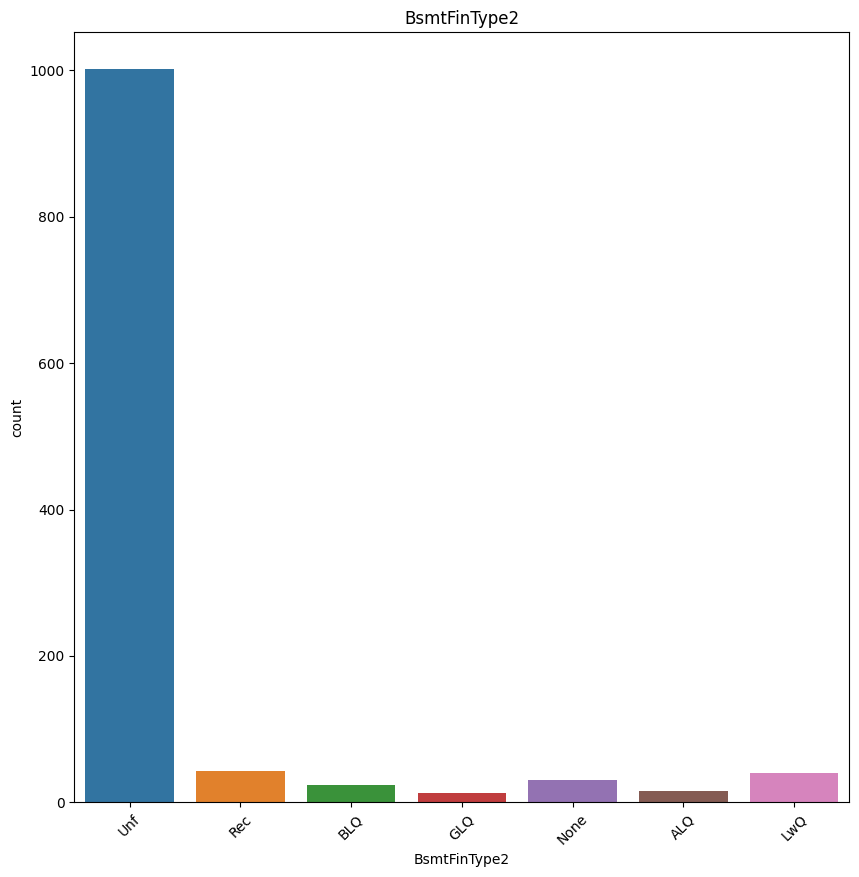

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

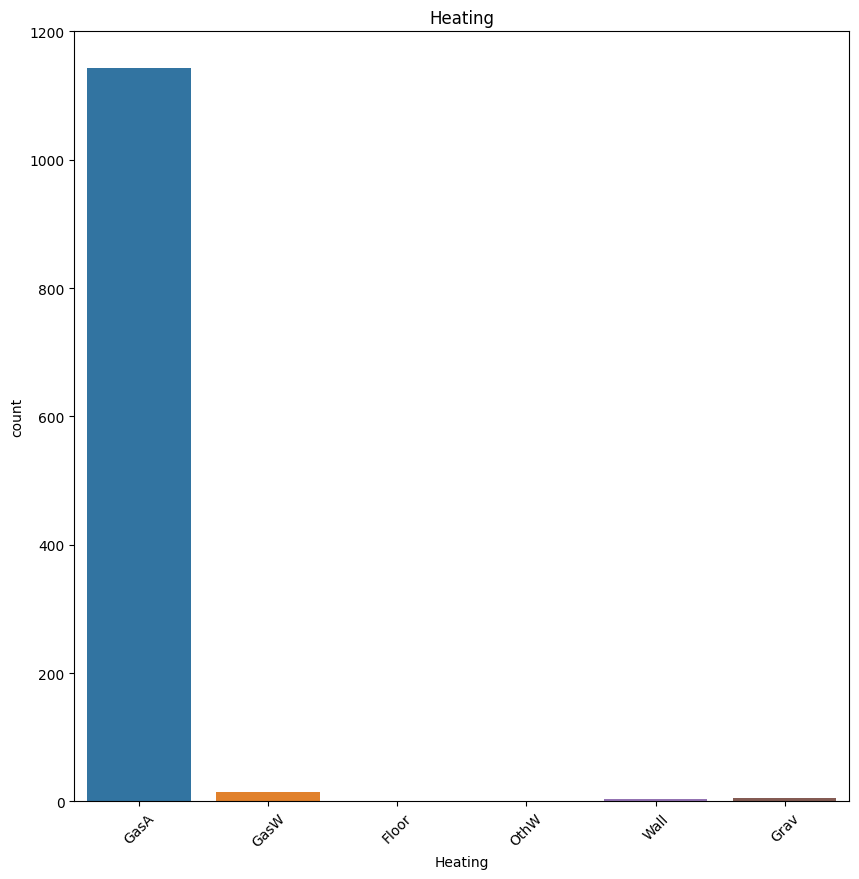

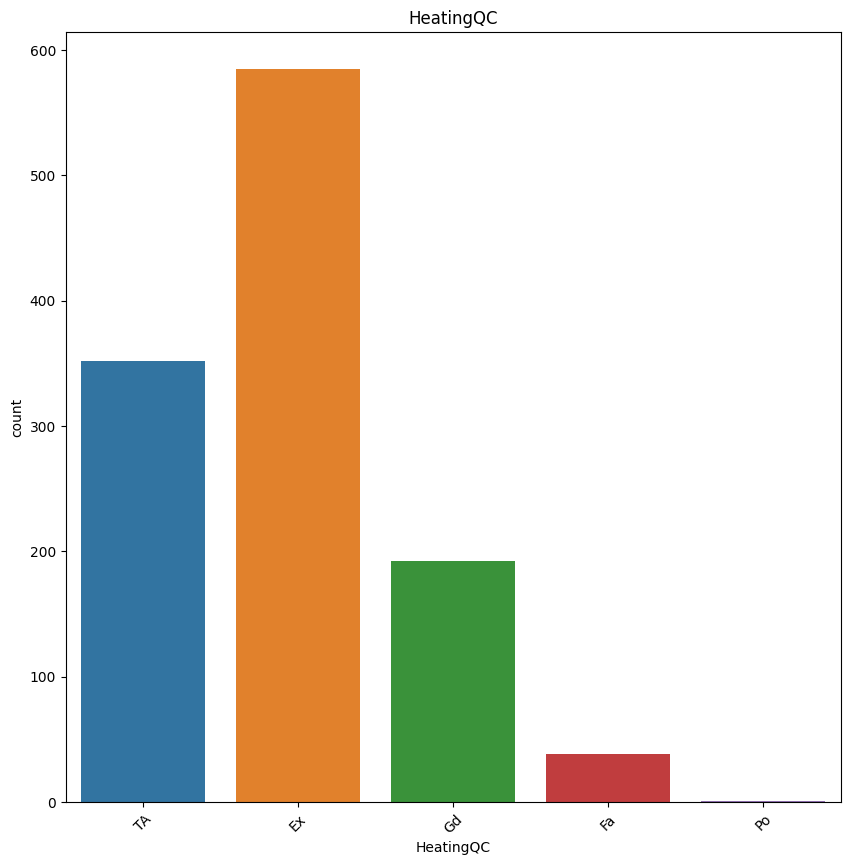

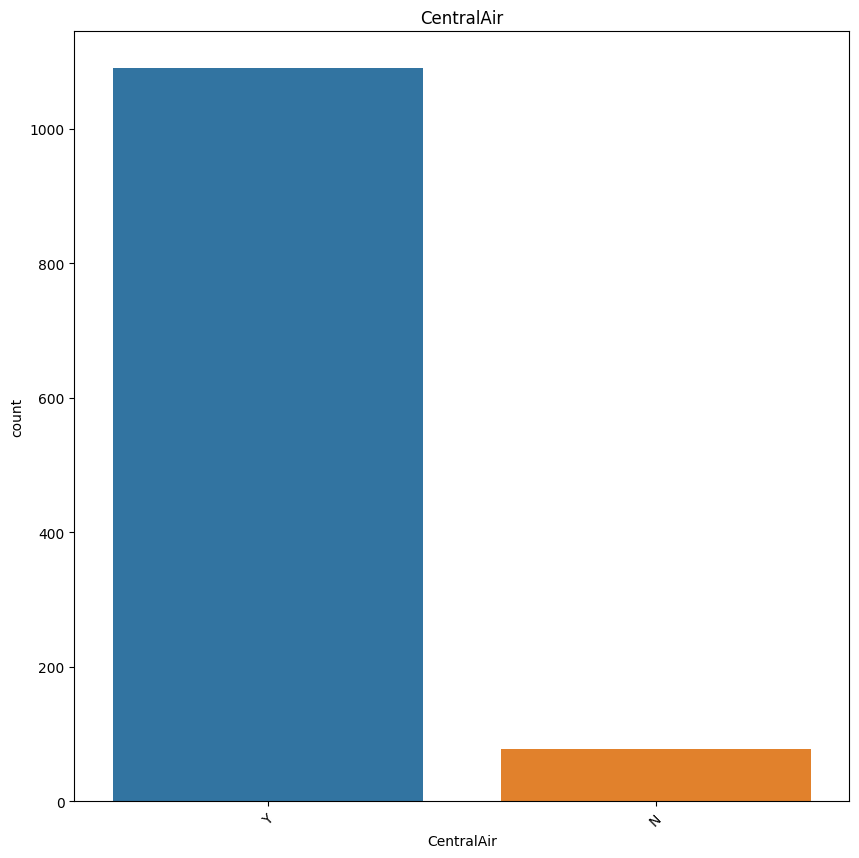

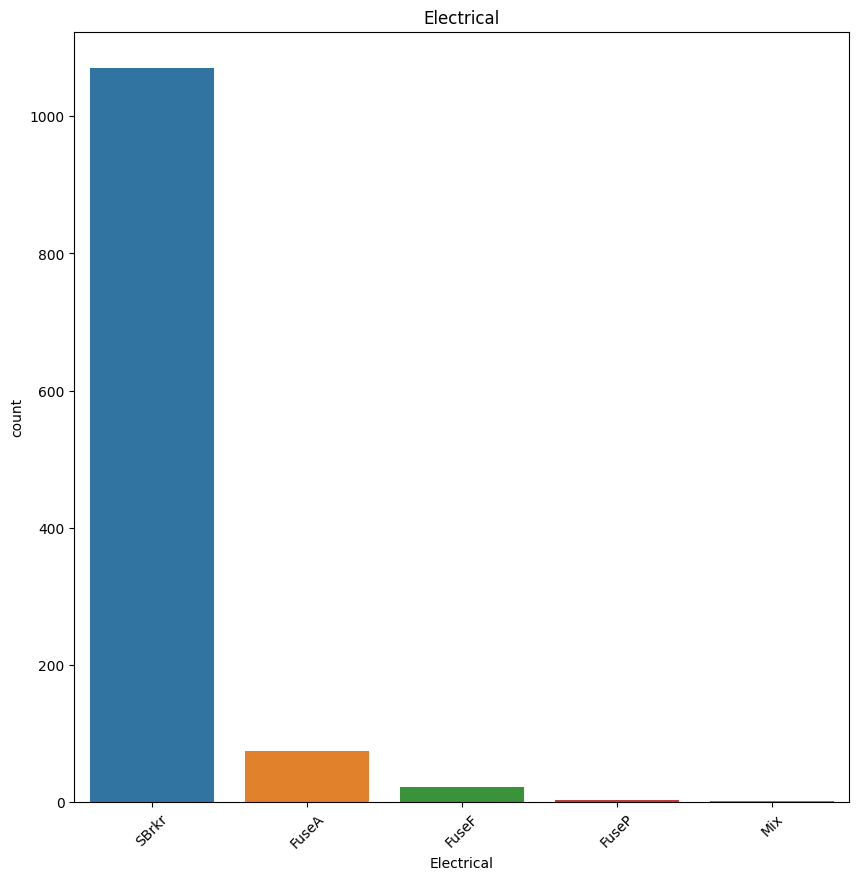

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

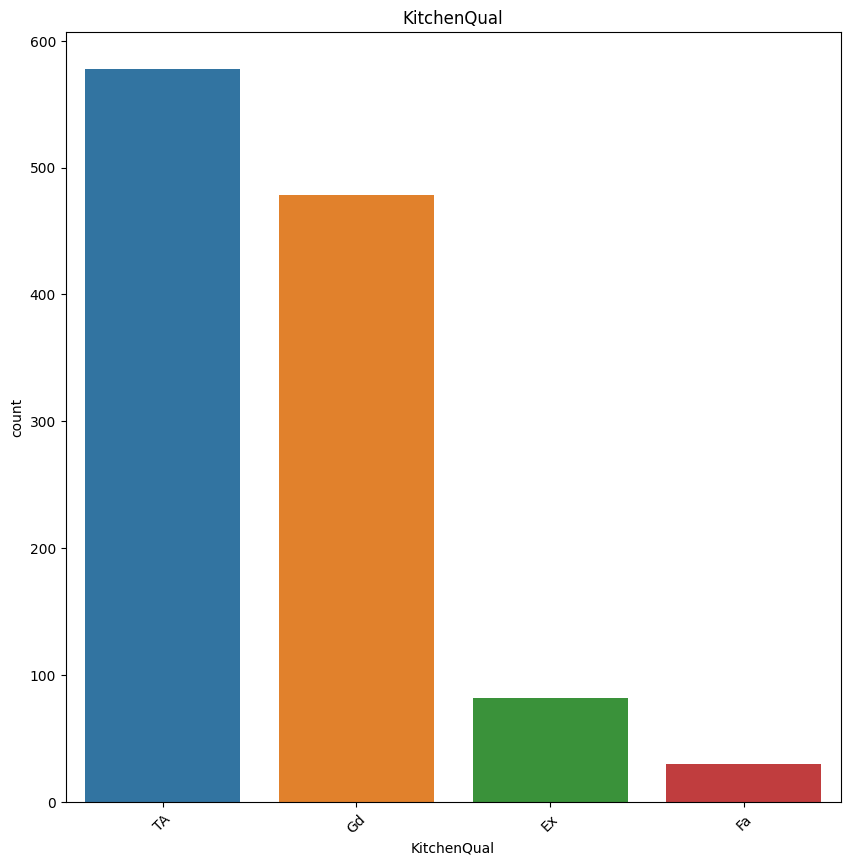

<Figure size 1000x1000 with 0 Axes>

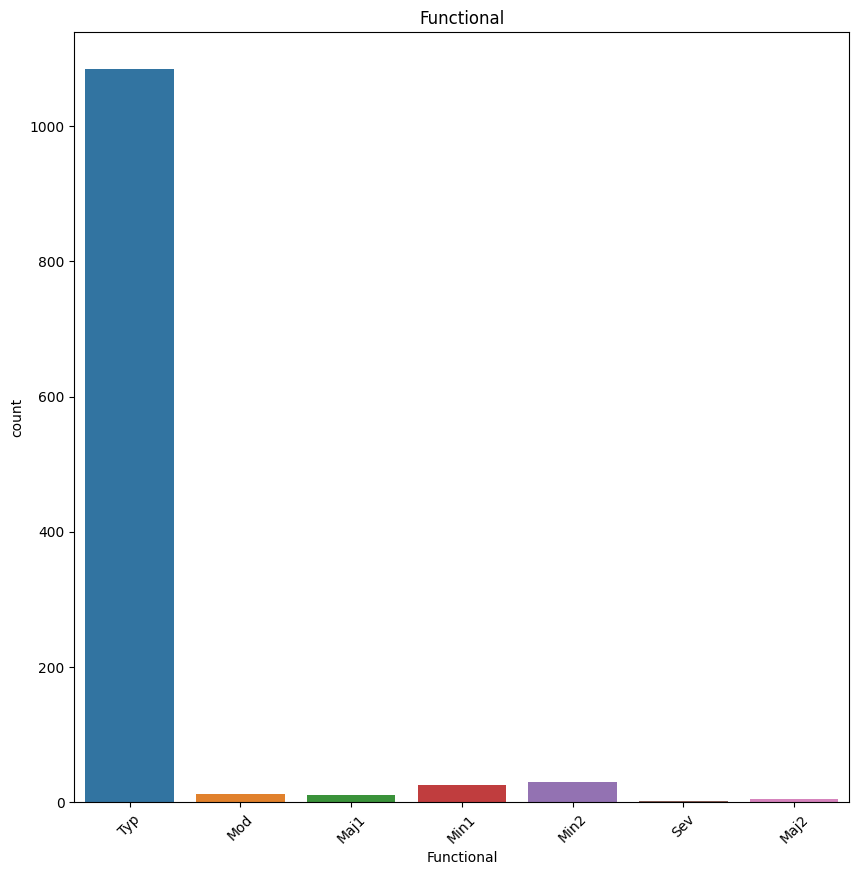

<Figure size 1000x1000 with 0 Axes>

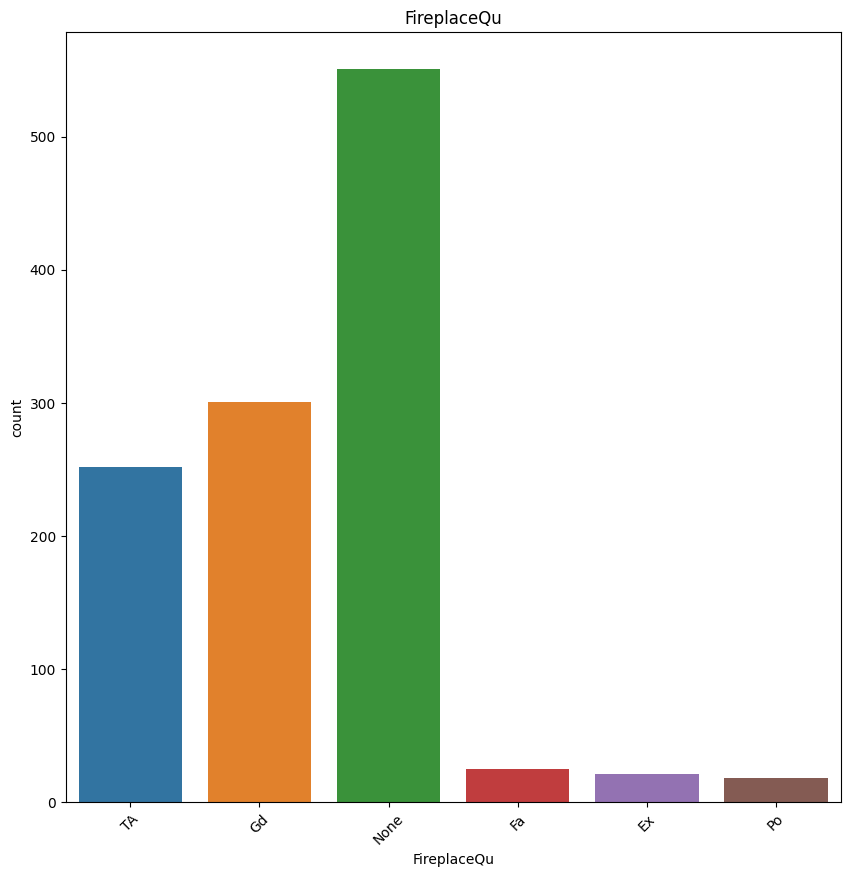

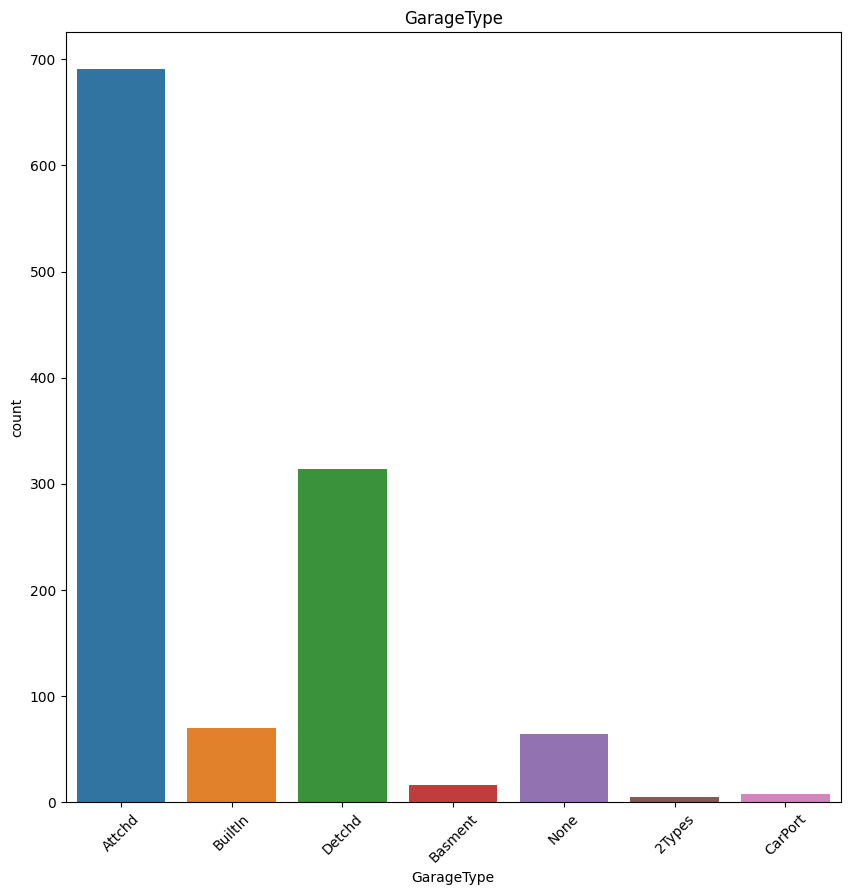

<Figure size 1000x1000 with 0 Axes>

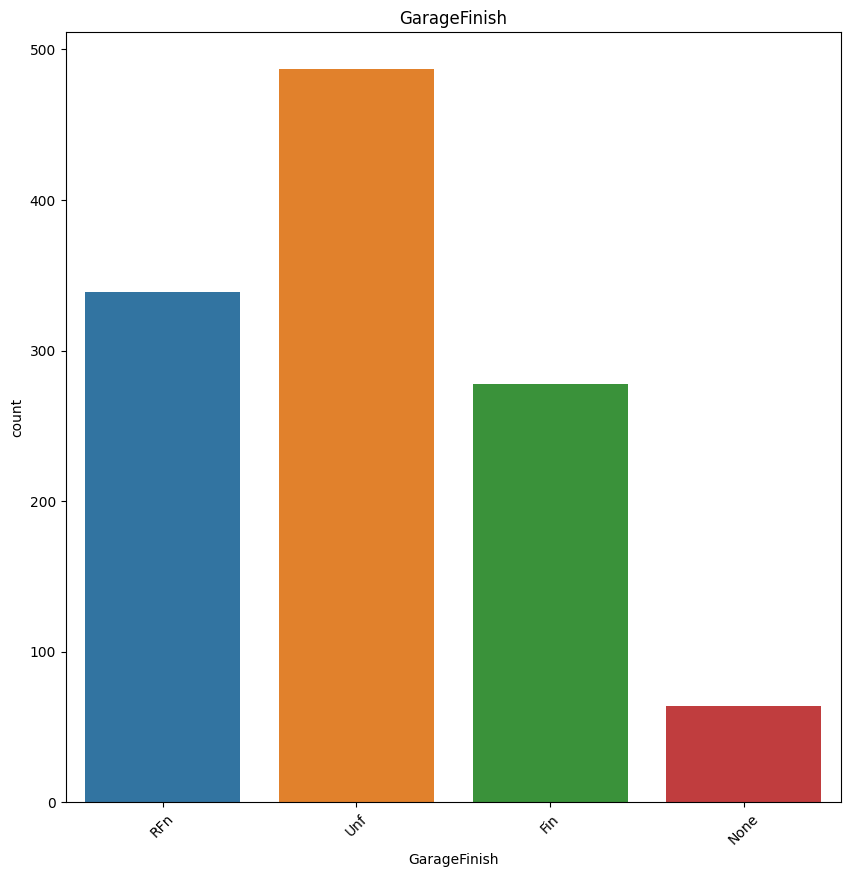

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

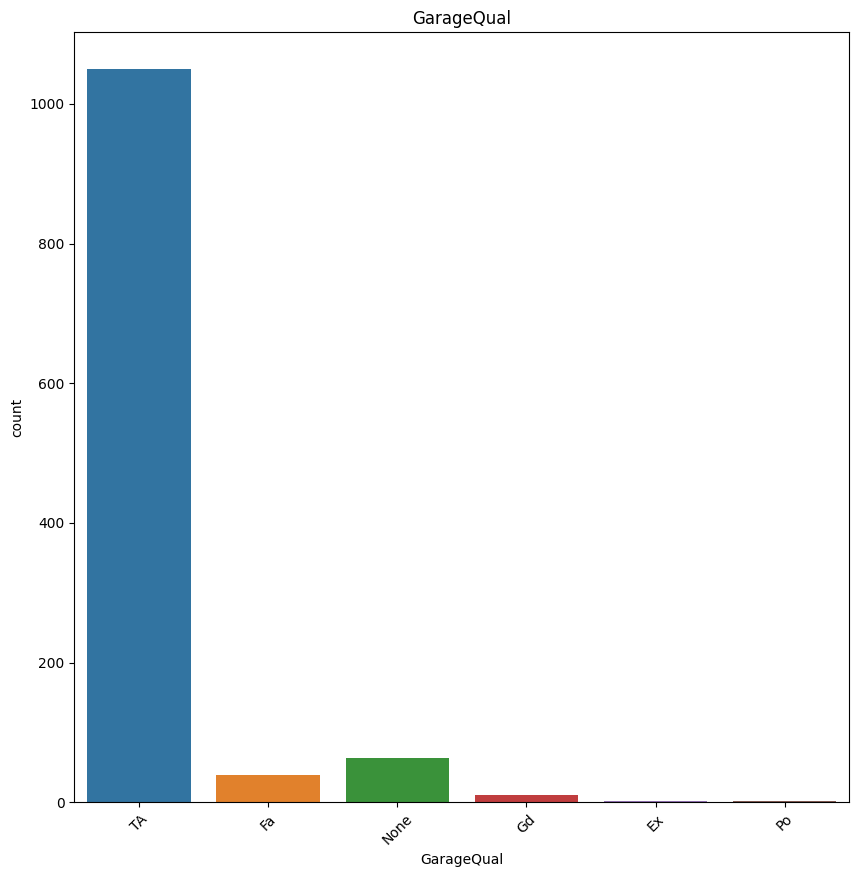

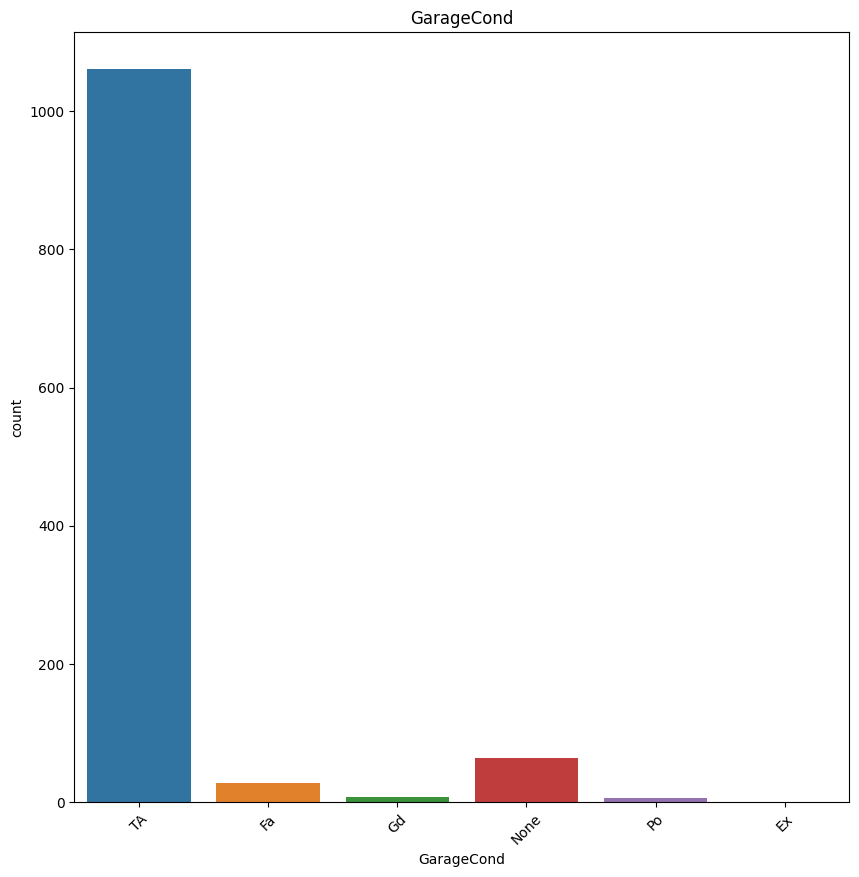

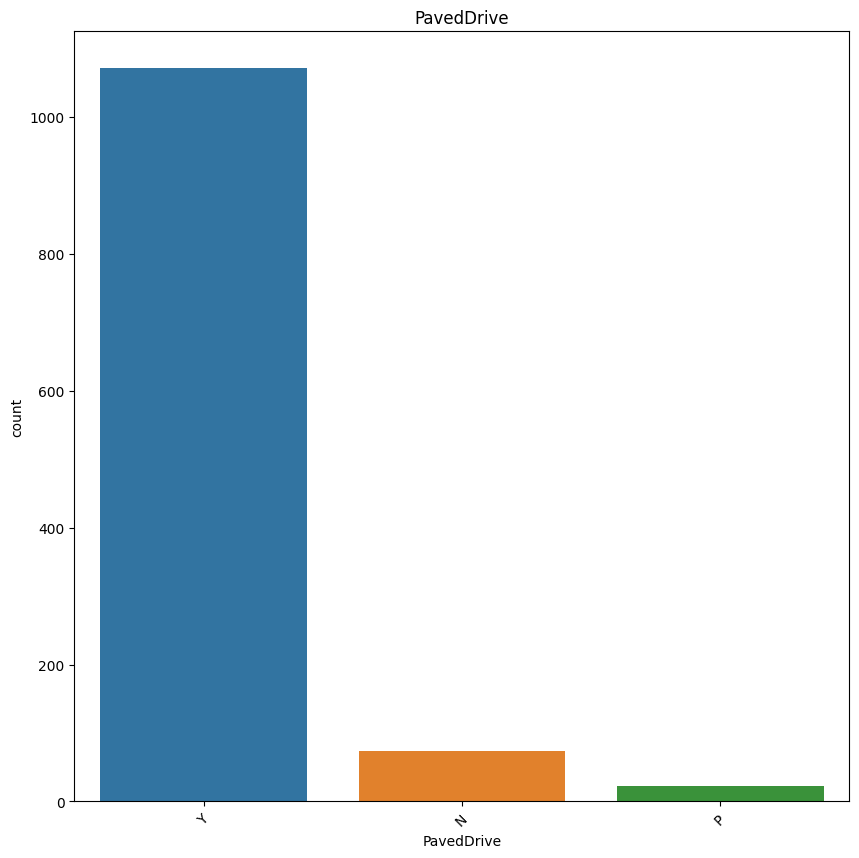

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

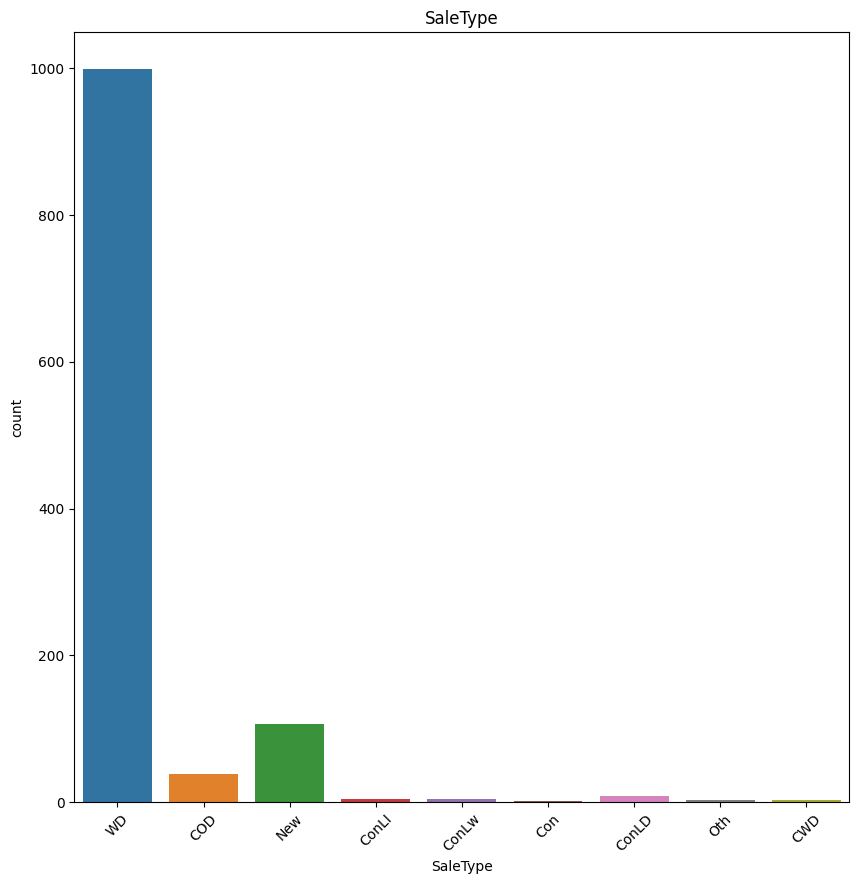

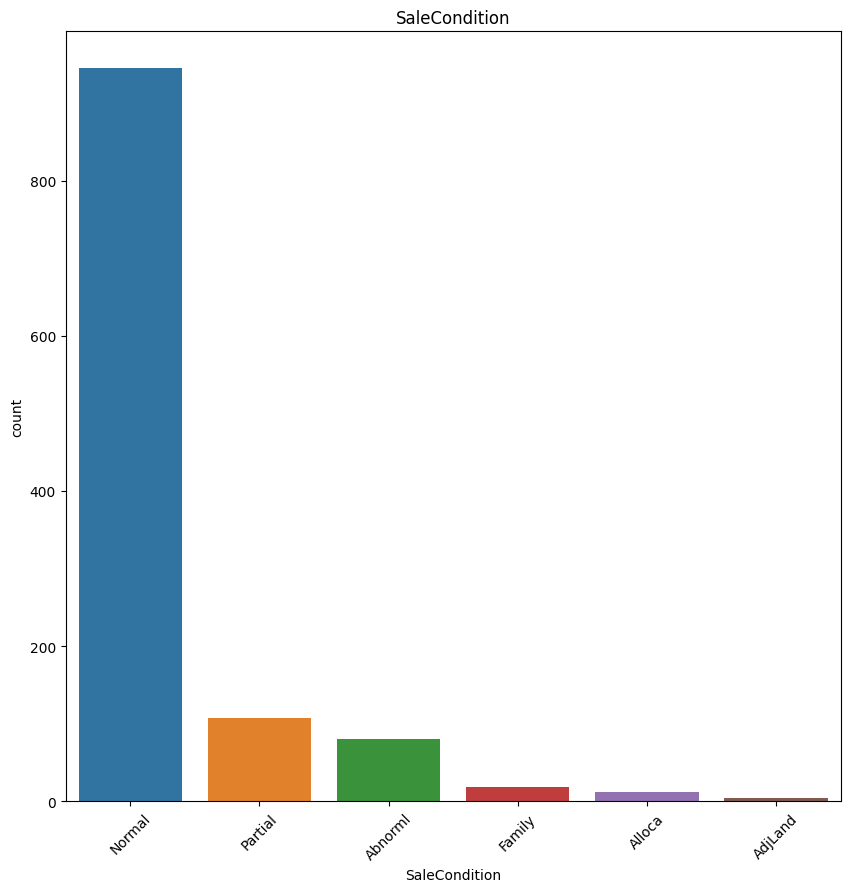

<Figure size 1000x1000 with 0 Axes>

In [372]:
for col in train_data.columns:
  plt.figure(figsize=(10, 10))
  if train_data[col].dtype == 'object':
      sns.countplot(data = train_data , x = col,hue=col)
      plt.xticks(rotation=45)
      plt.title(col)
      plt.show()

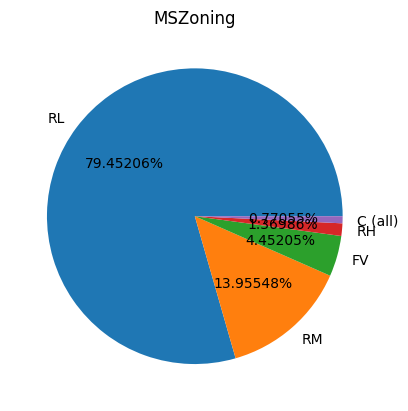

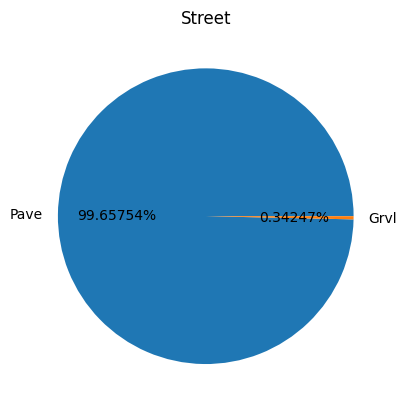

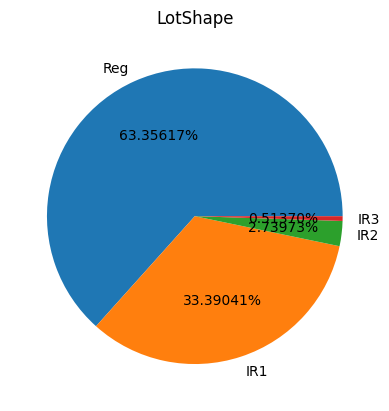

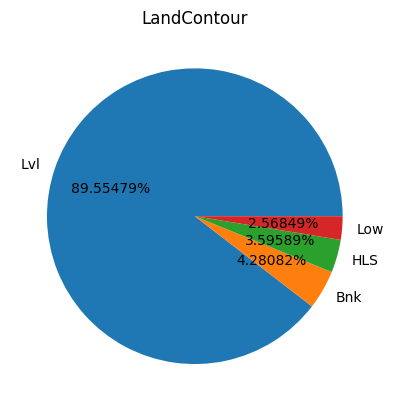

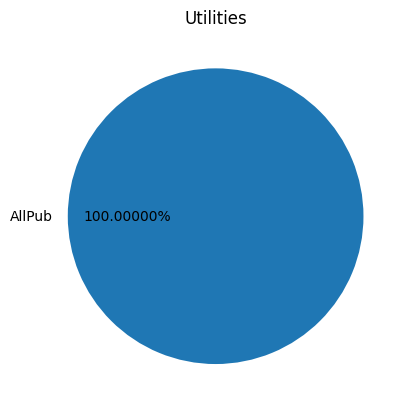

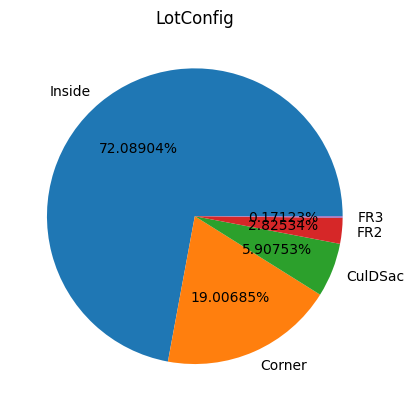

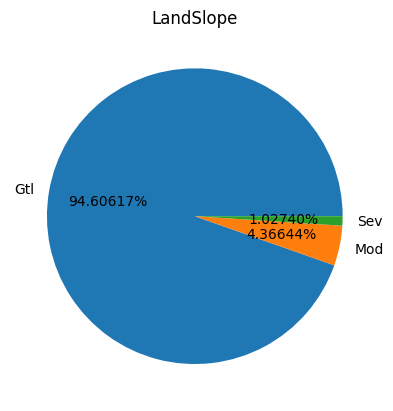

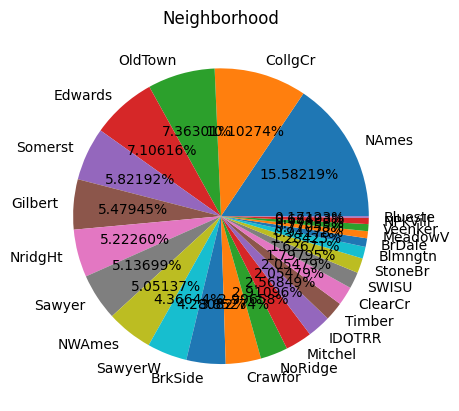

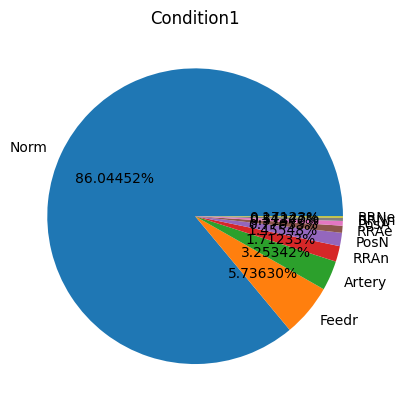

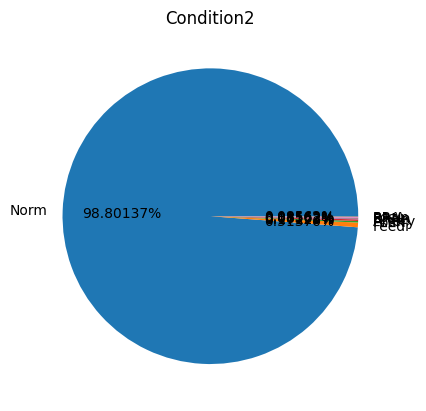

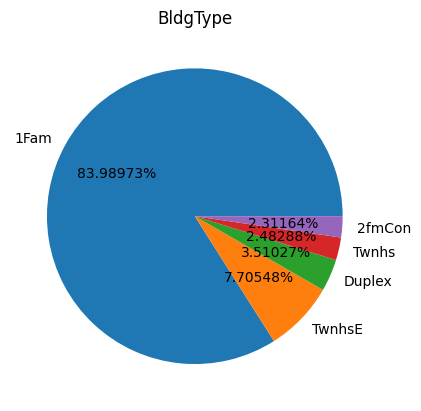

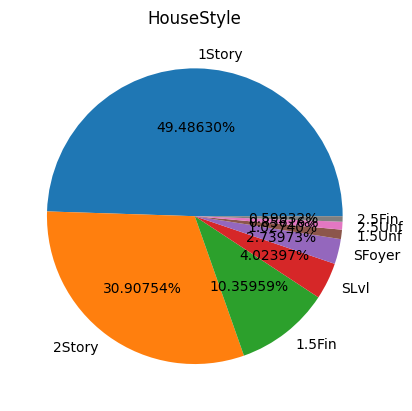

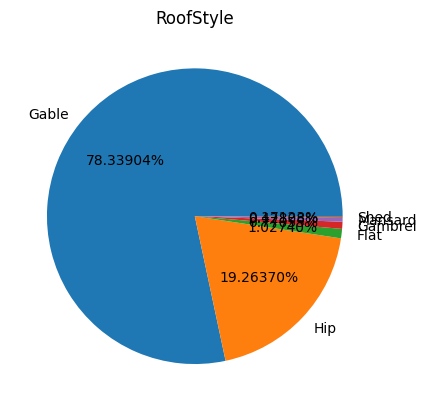

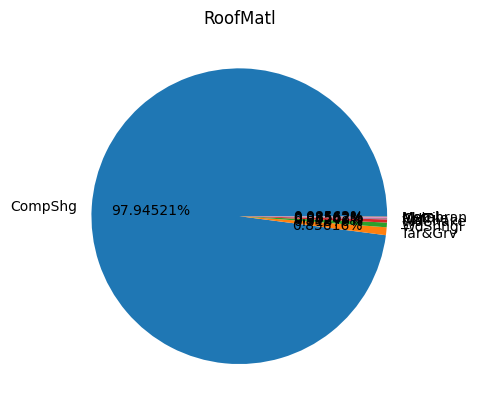

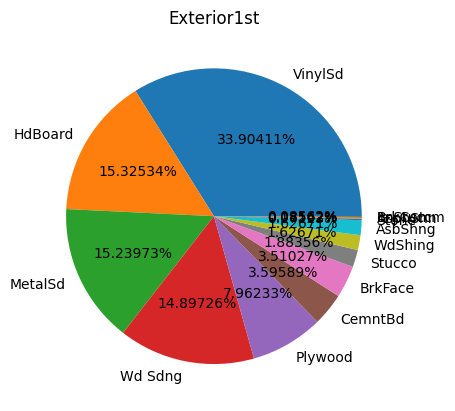

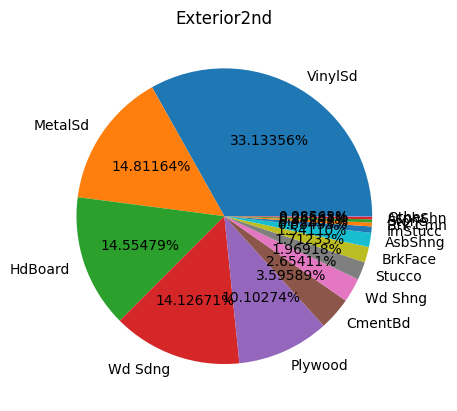

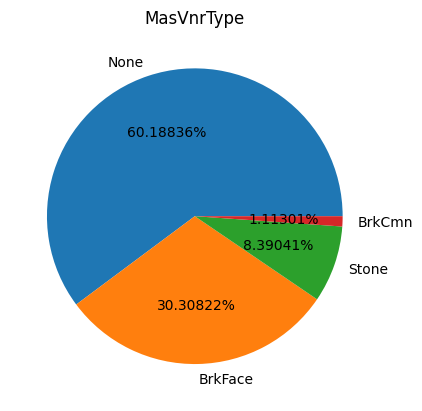

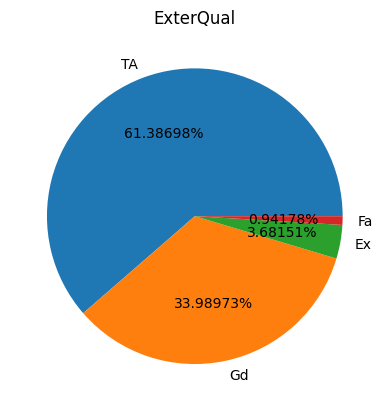

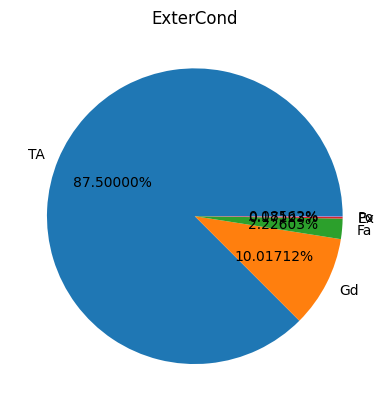

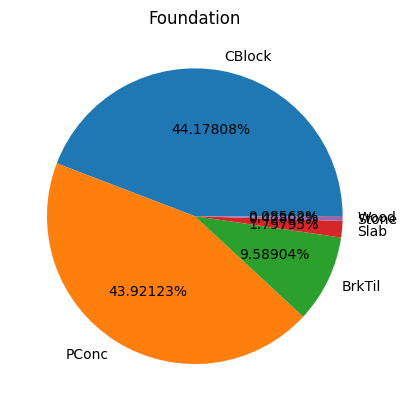

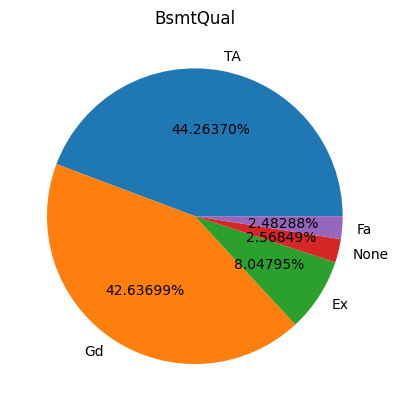

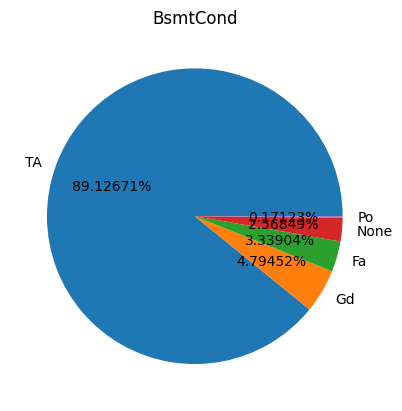

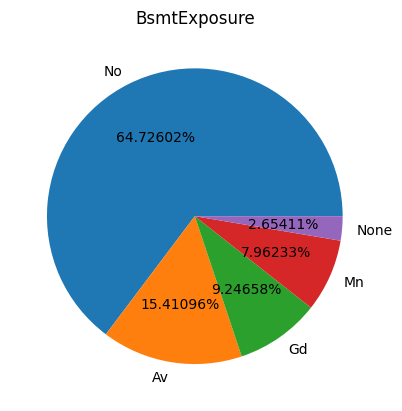

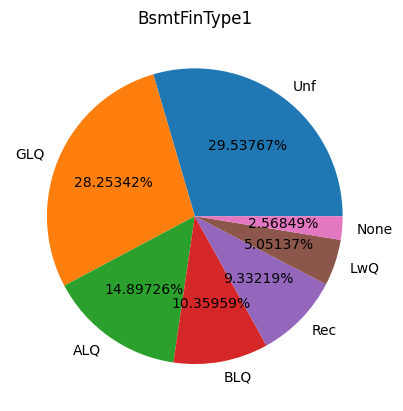

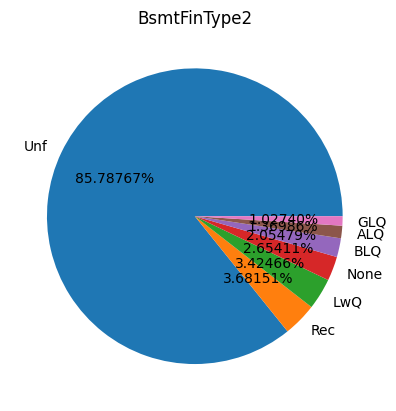

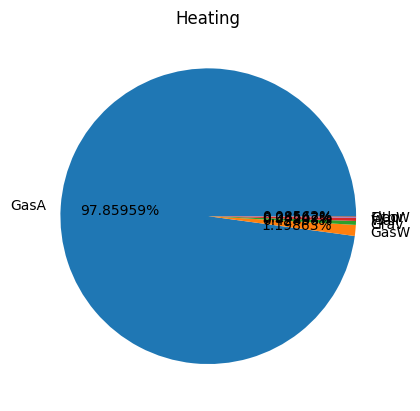

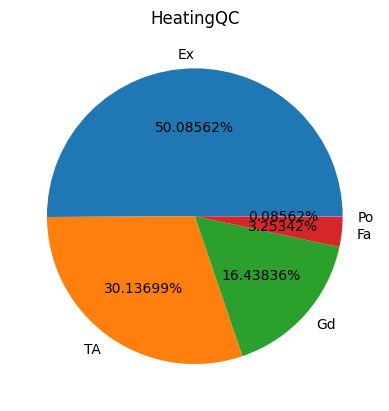

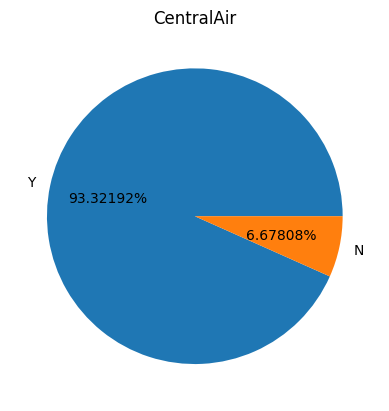

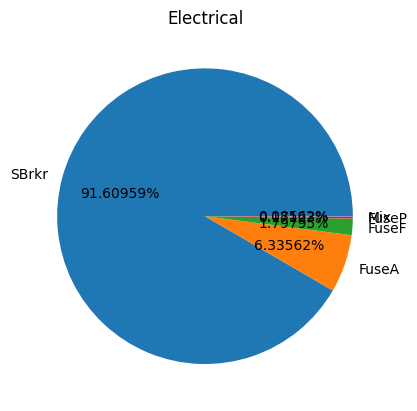

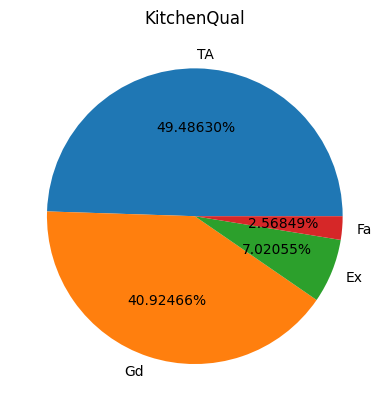

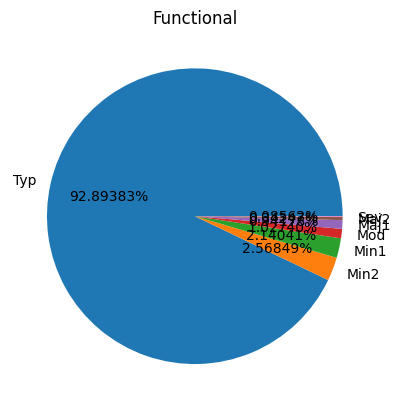

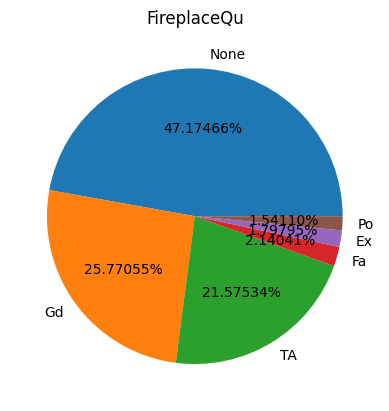

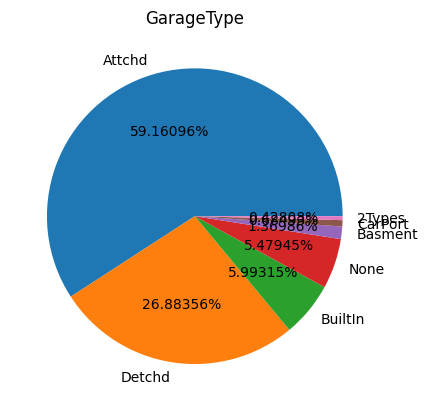

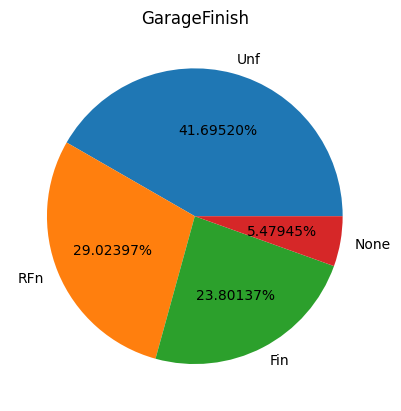

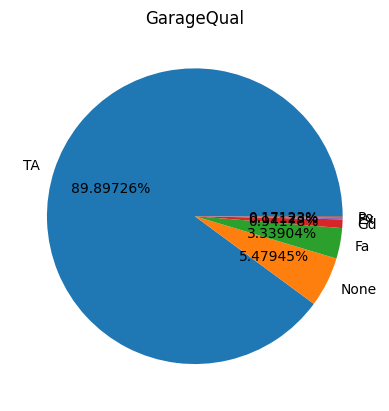

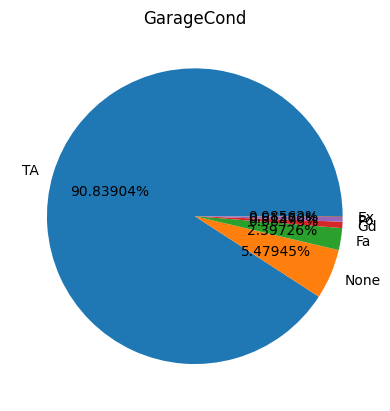

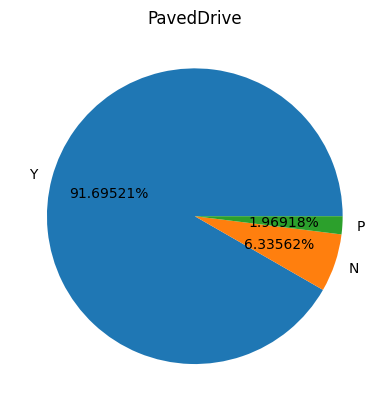

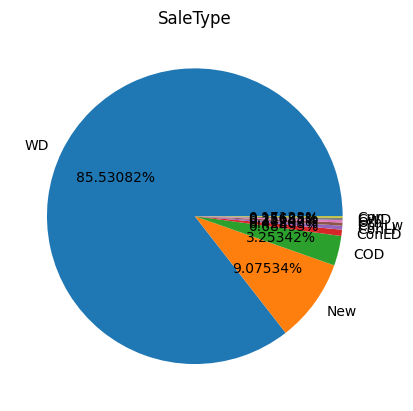

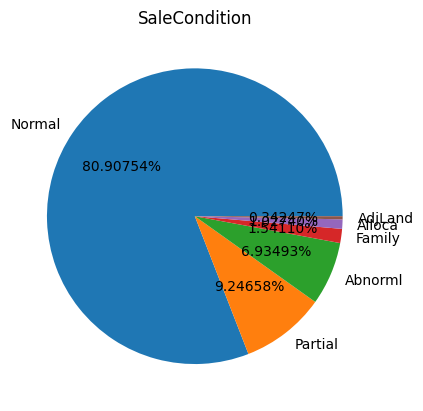

In [373]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        plt.pie(train_data[col].value_counts() , labels = train_data[col].value_counts().index , autopct = '%1.5f%%')
        plt.title(col)
        plt.show()

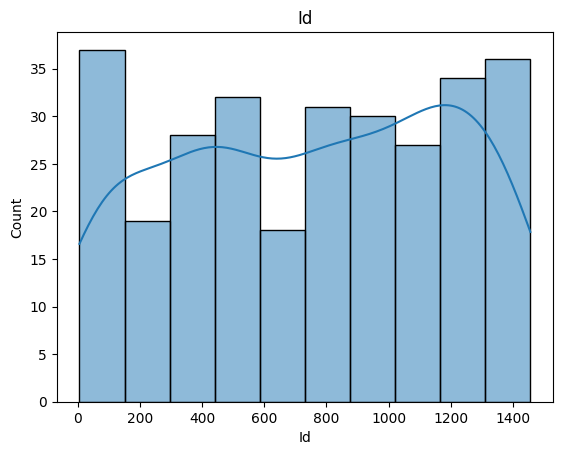

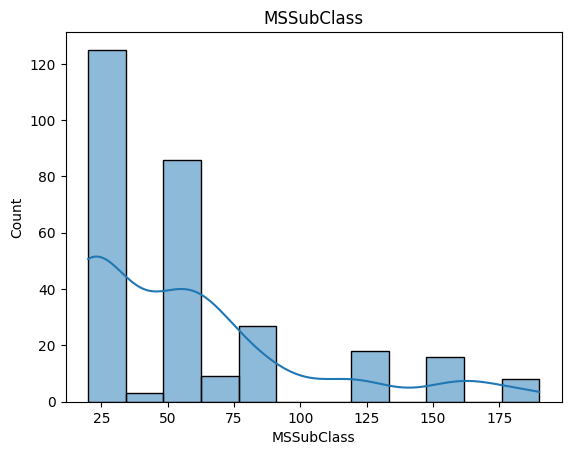

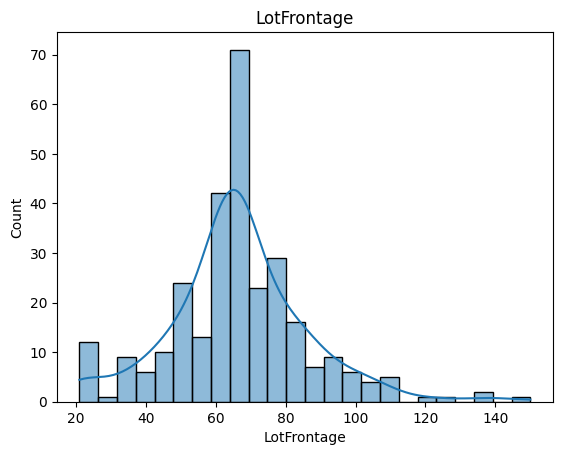

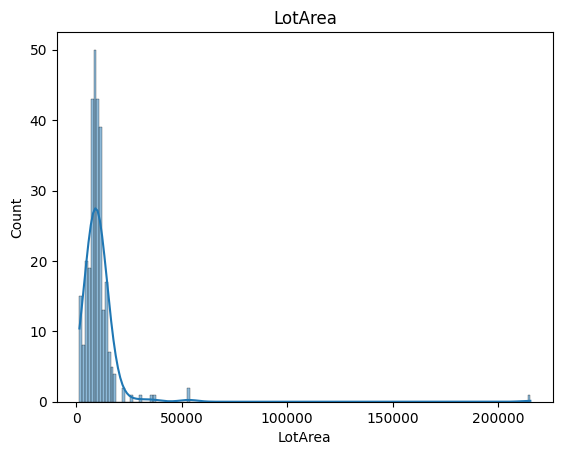

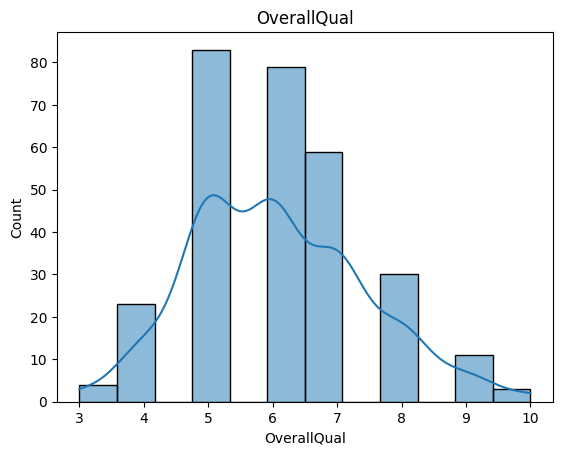

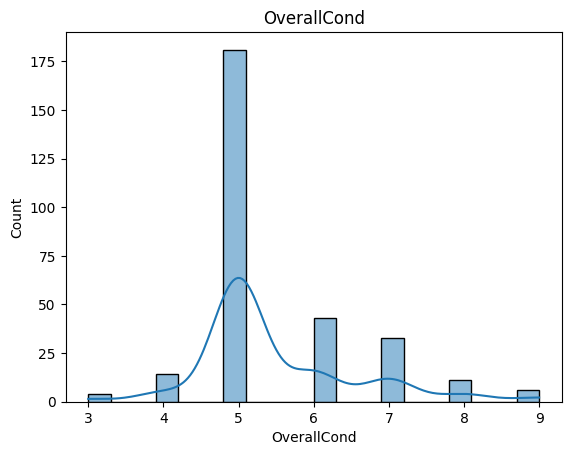

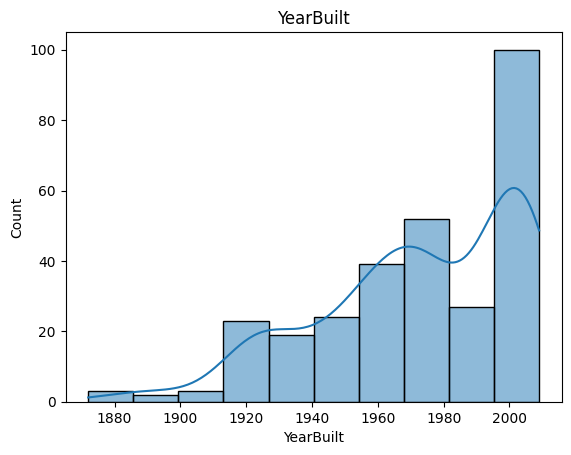

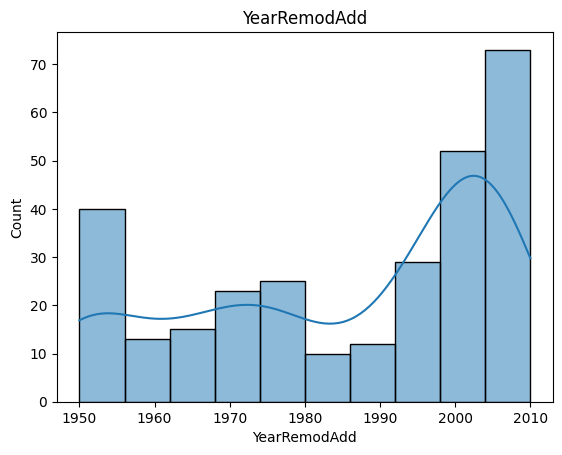

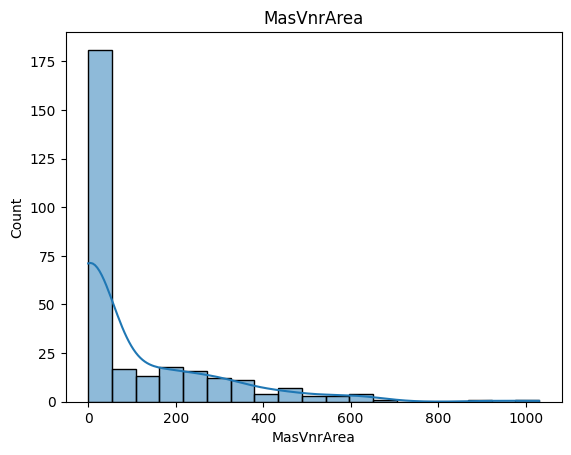

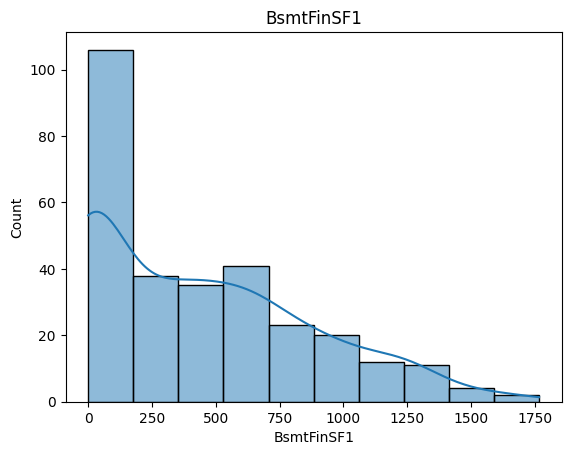

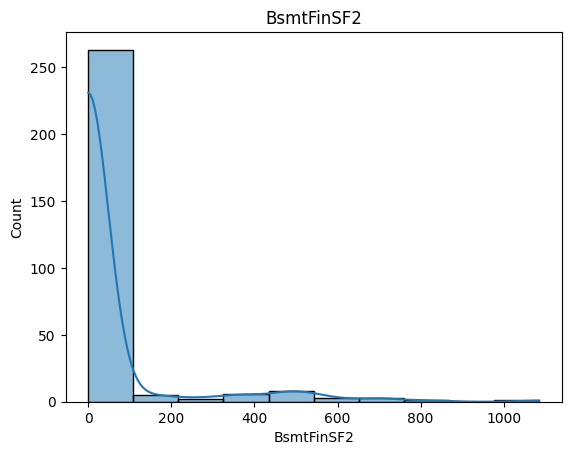

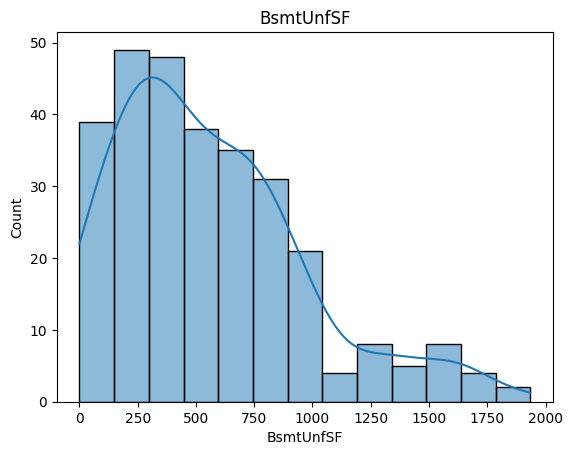

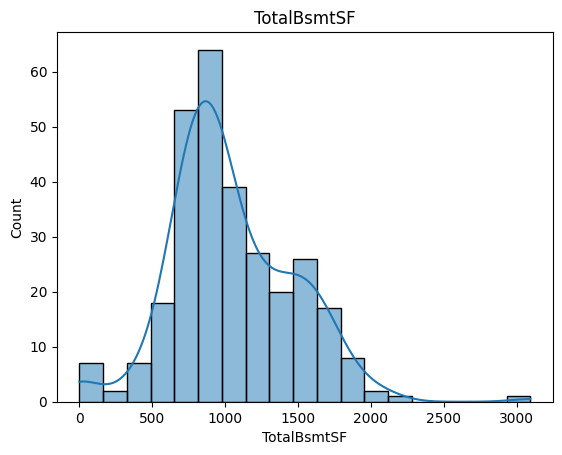

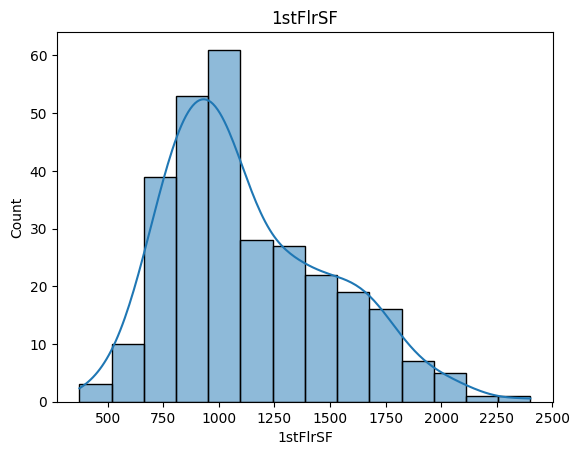

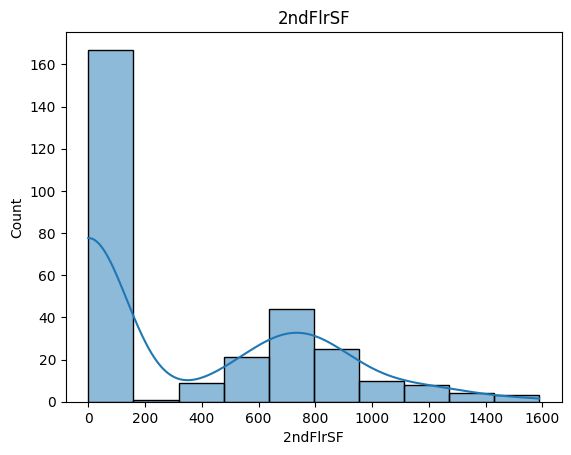

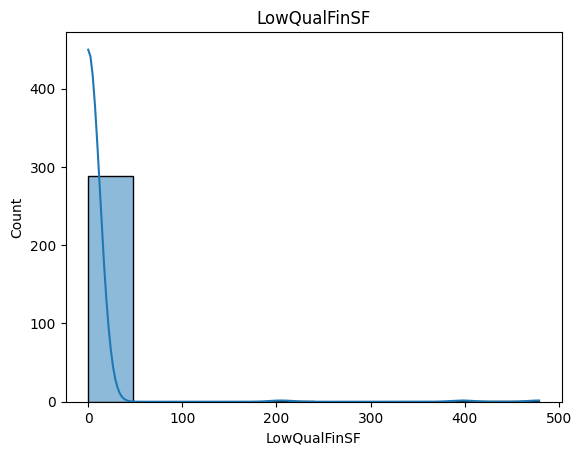

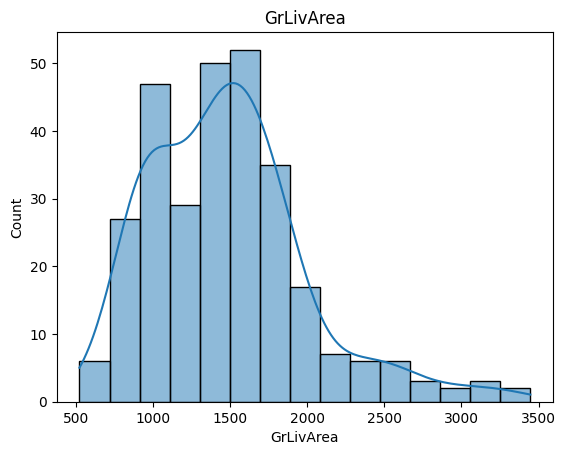

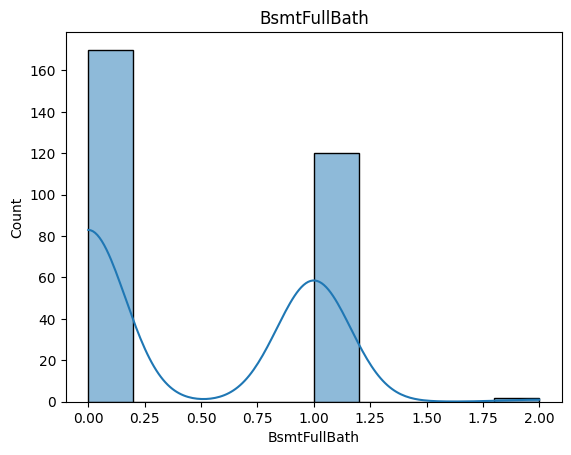

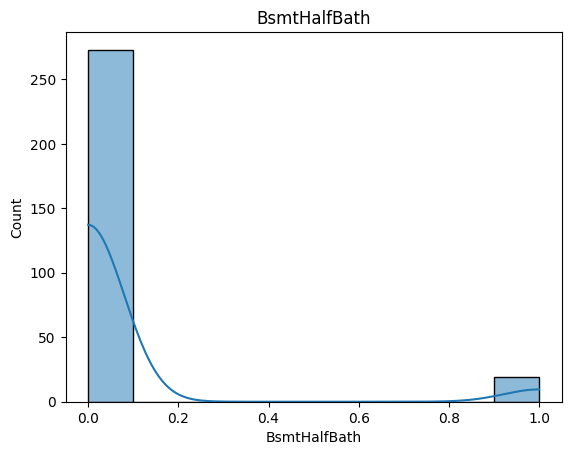

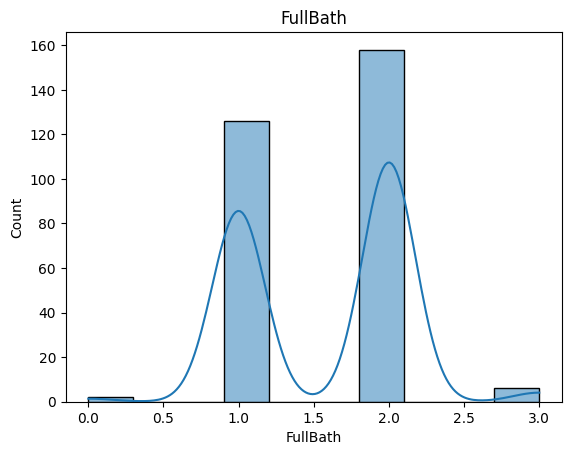

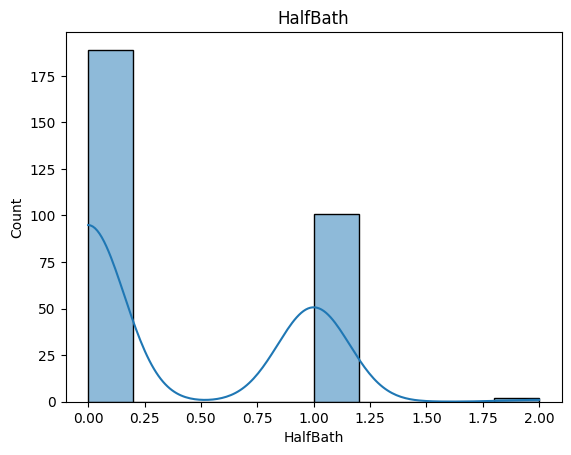

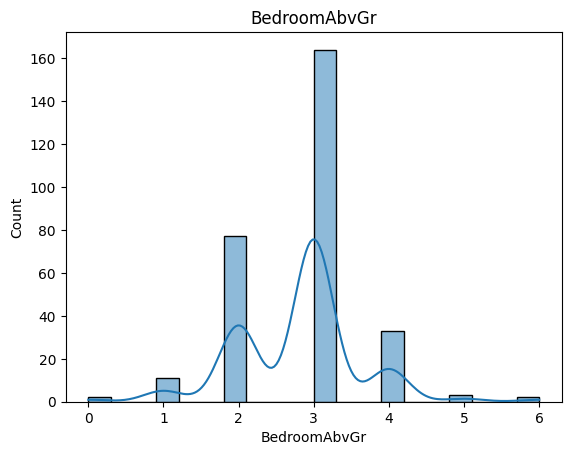

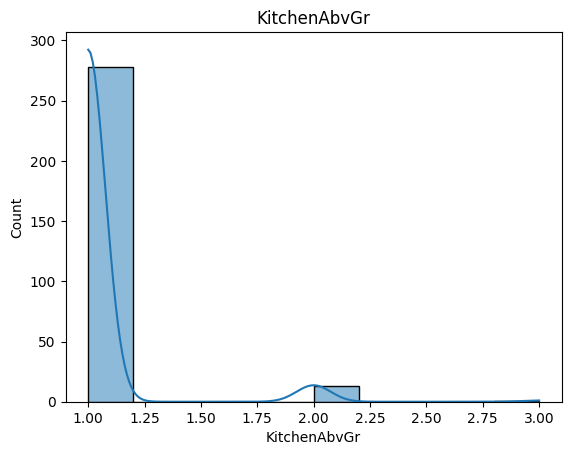

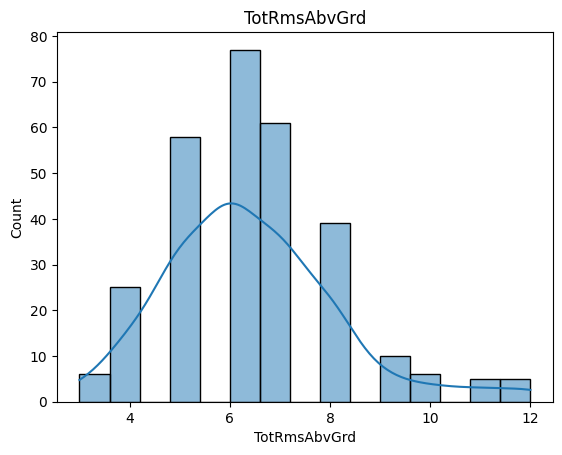

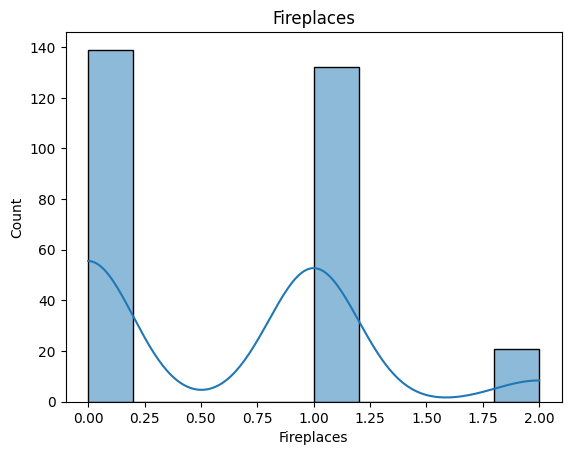

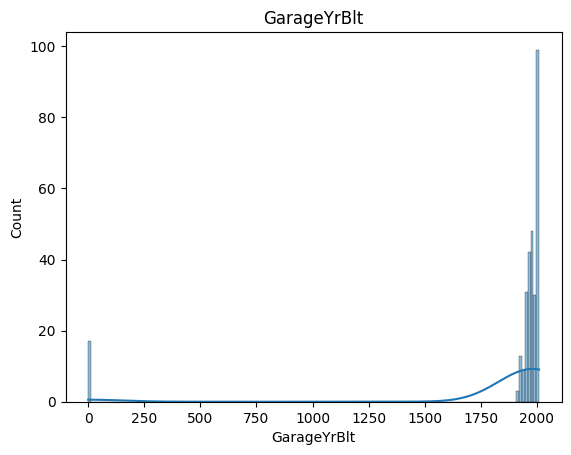

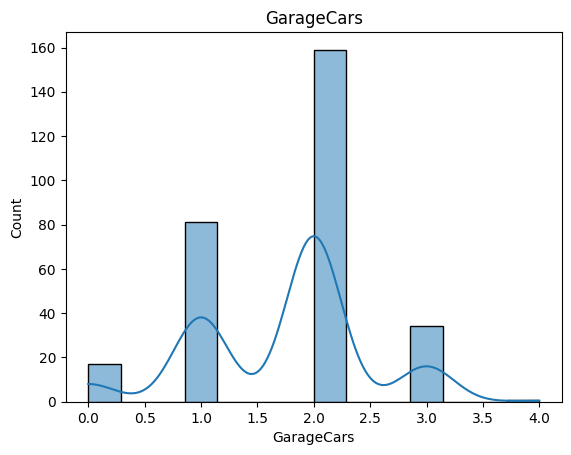

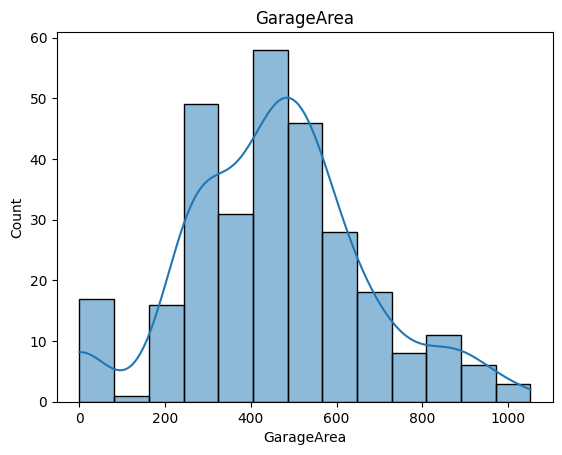

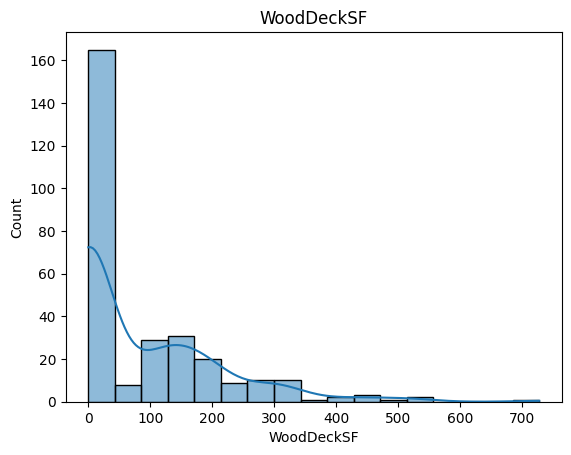

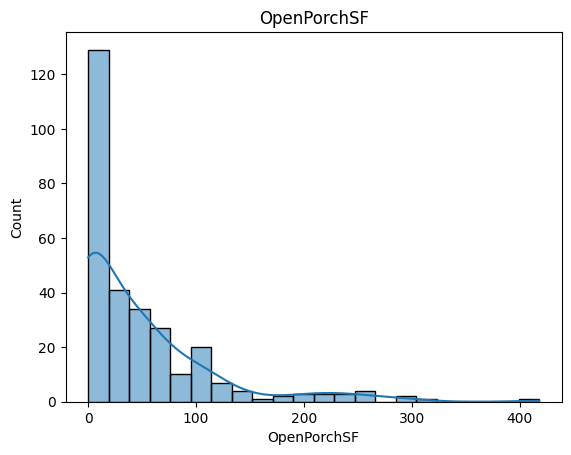

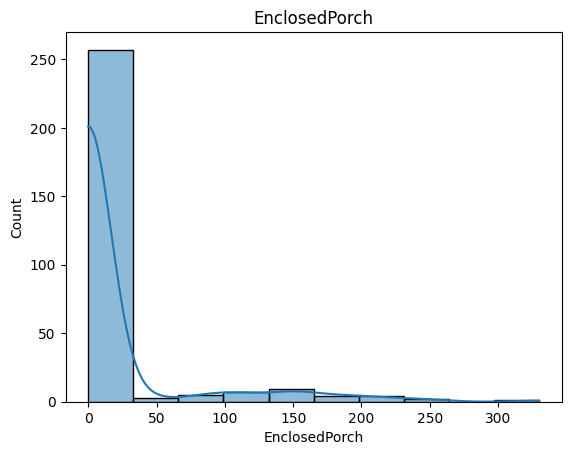

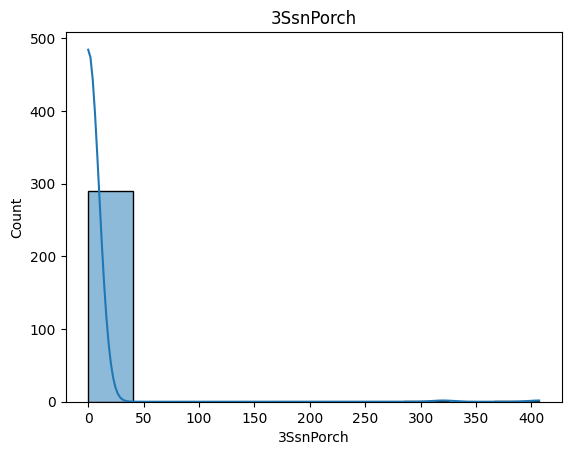

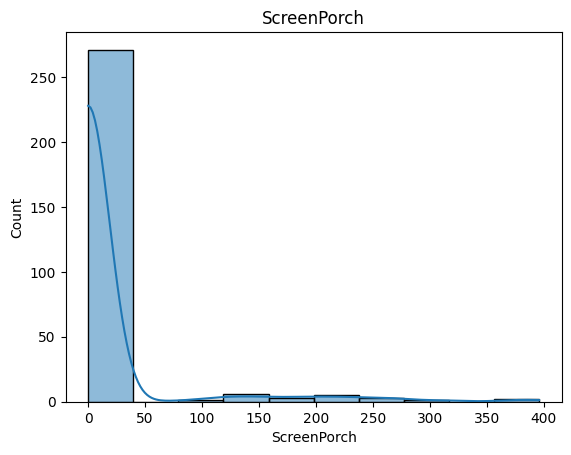

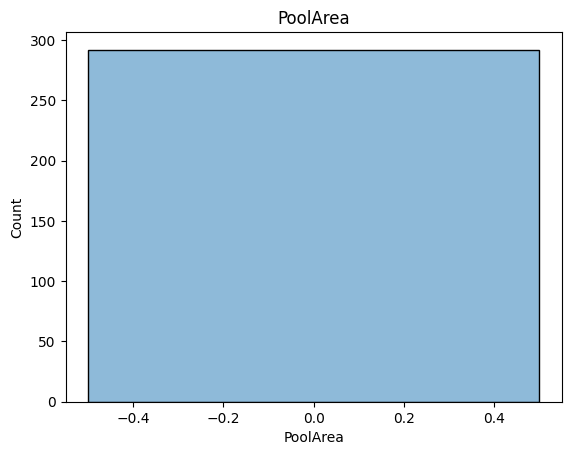

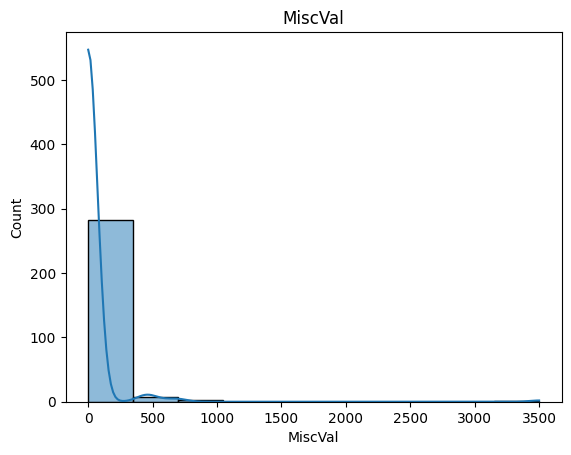

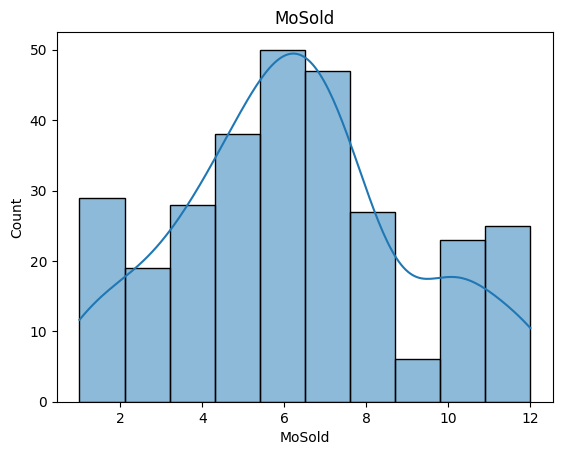

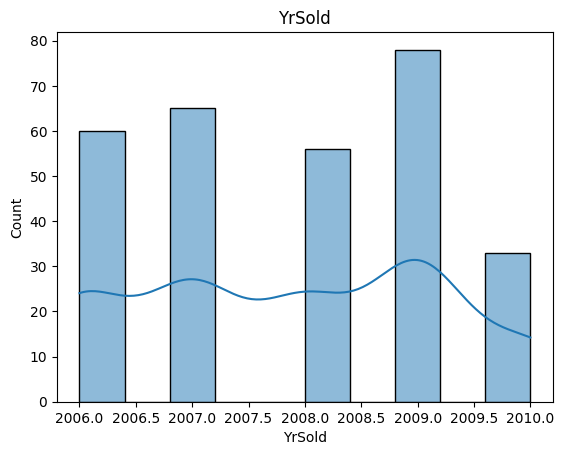

In [374]:
for col in train_data.drop('SalePrice' , axis =1).columns:
    if train_data[col].dtype != 'object':
      sns.histplot(test_data[col] , kde = True)
      plt.title(col)
      plt.show()


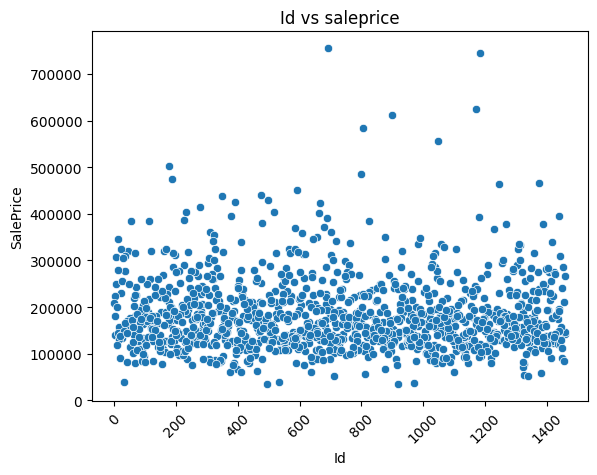

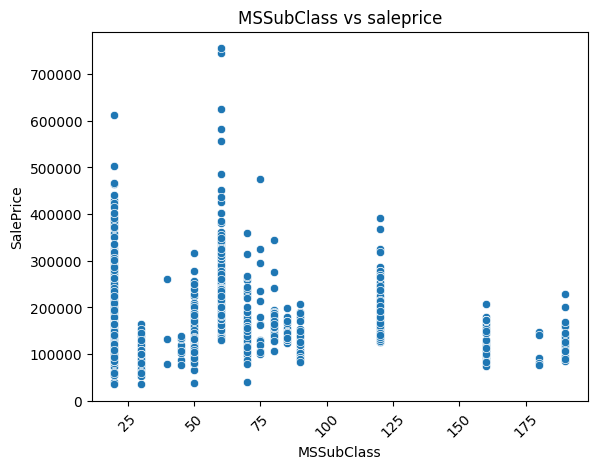

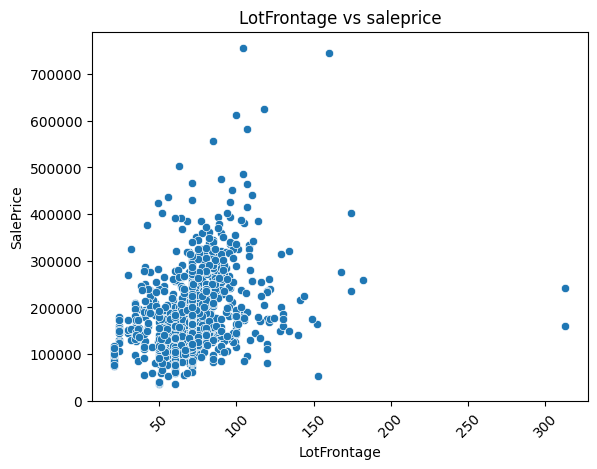

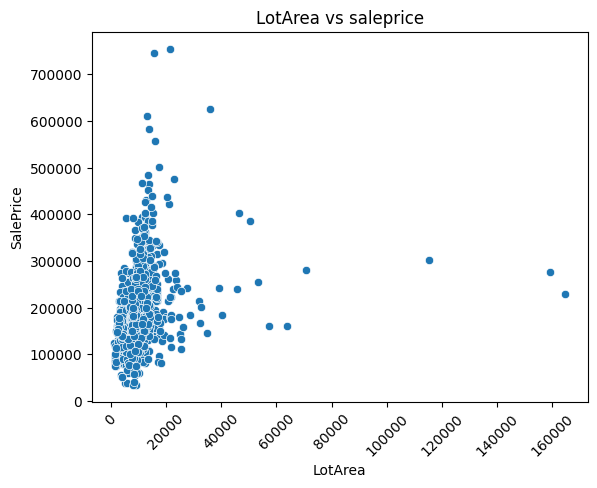

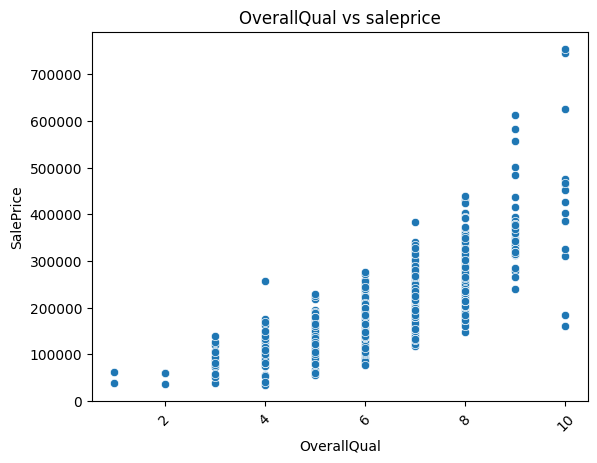

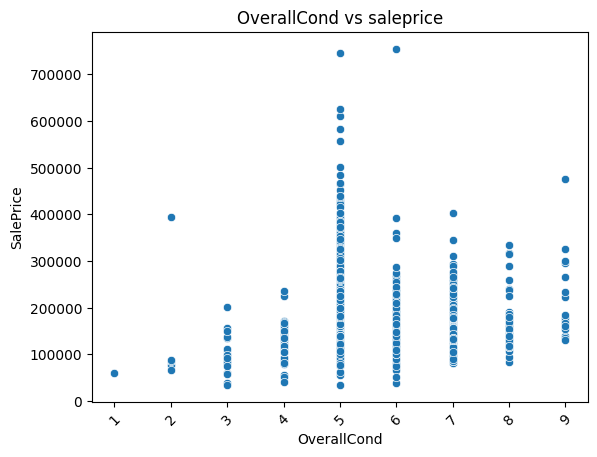

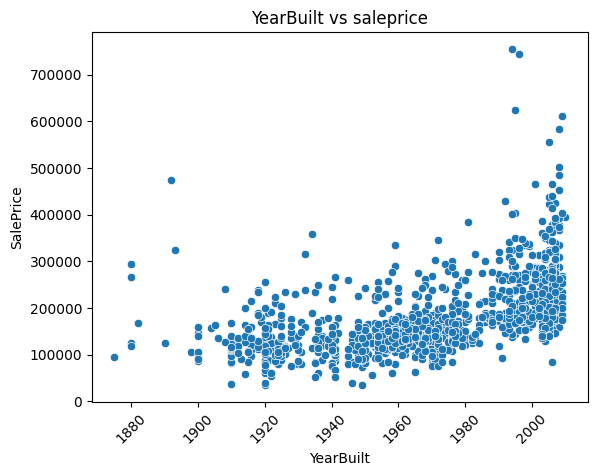

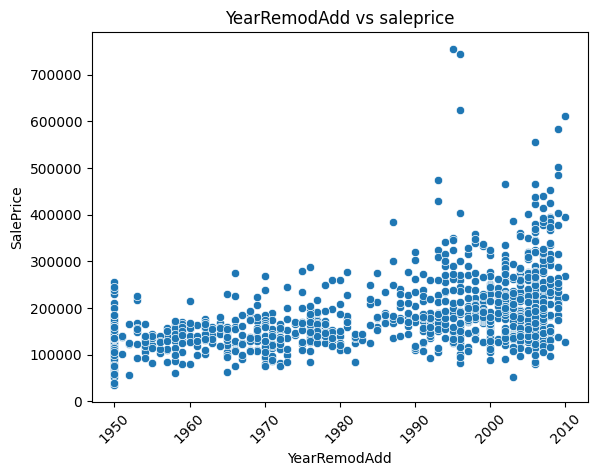

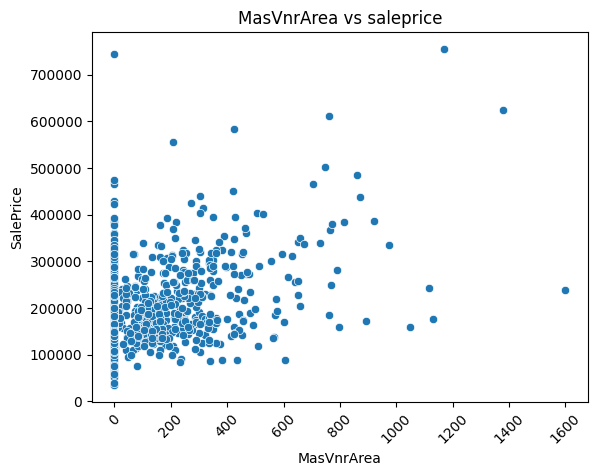

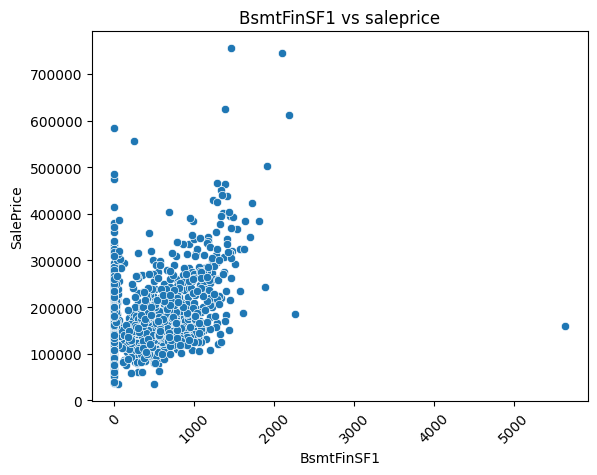

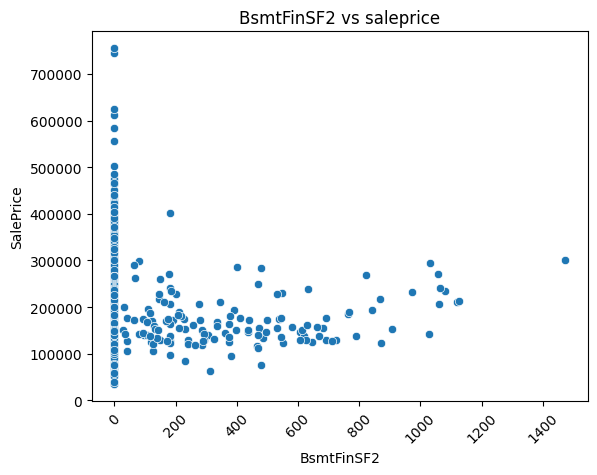

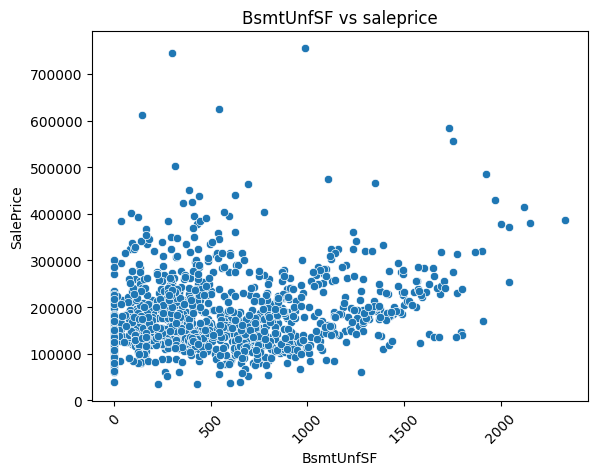

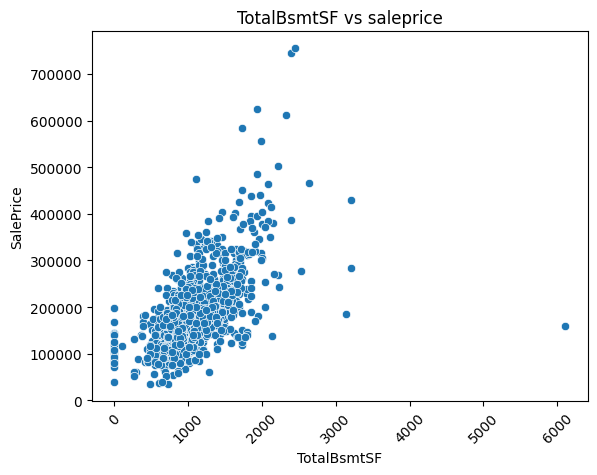

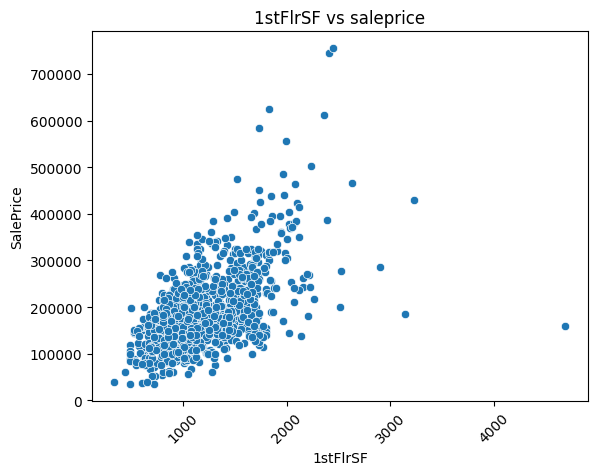

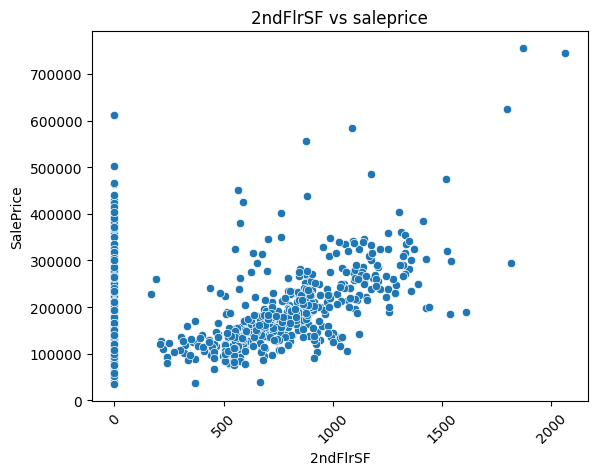

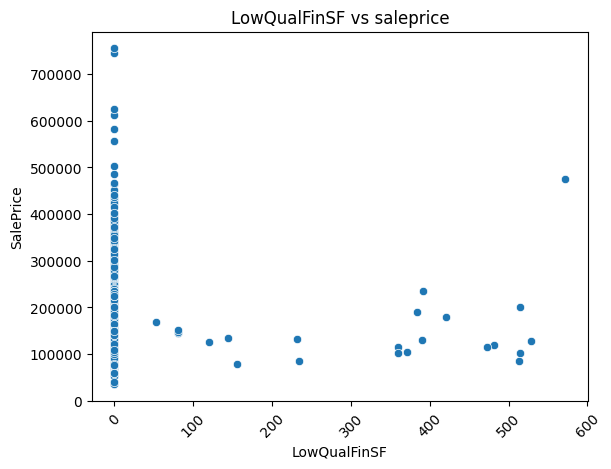

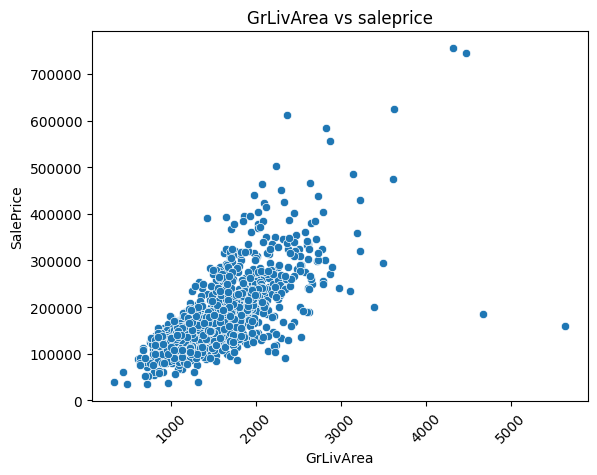

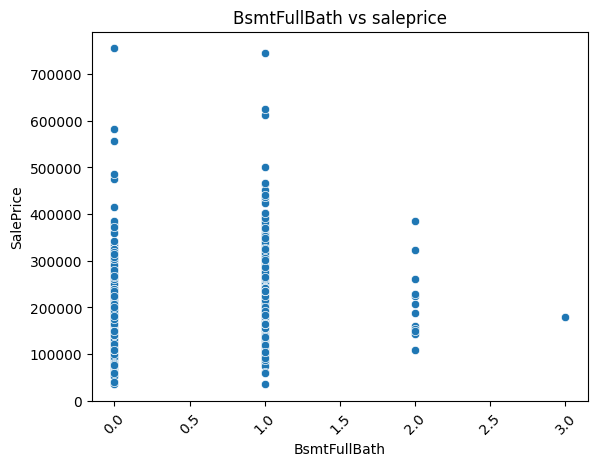

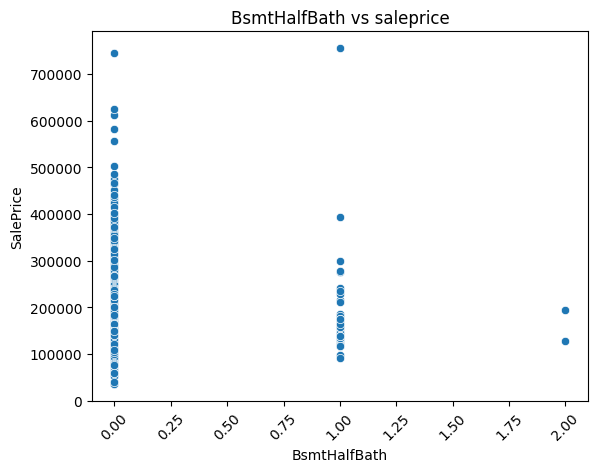

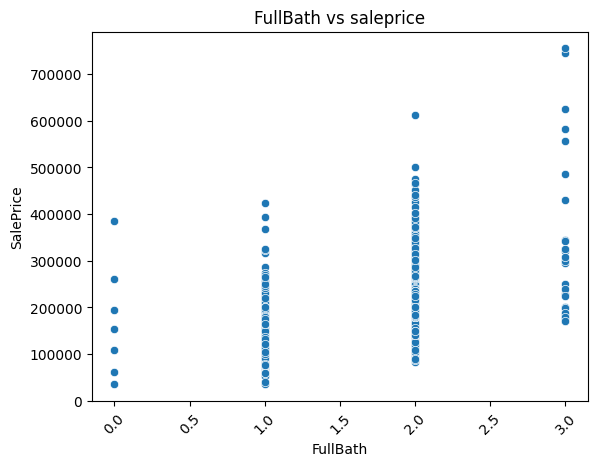

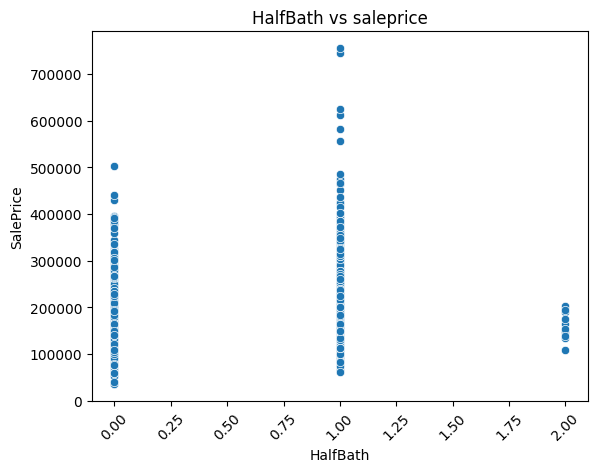

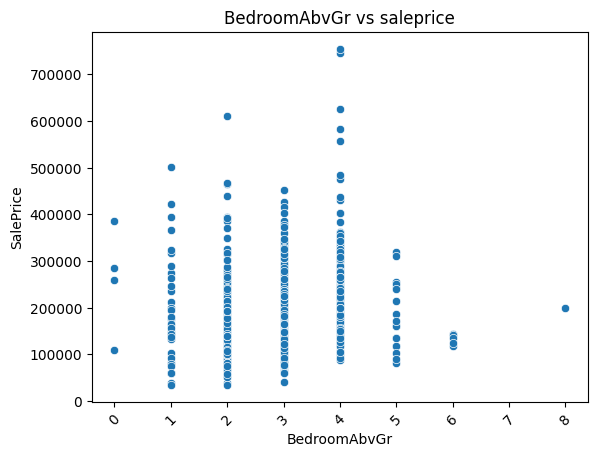

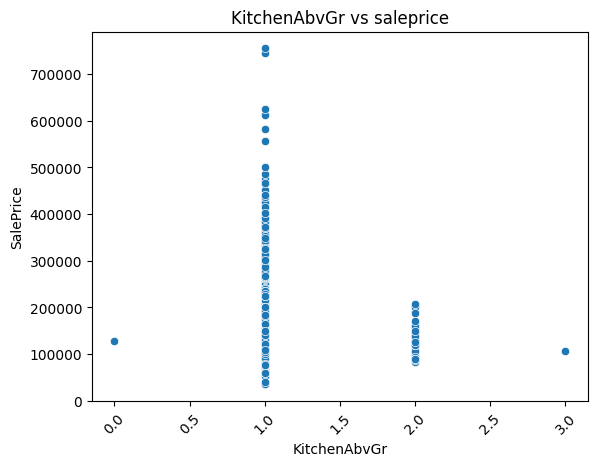

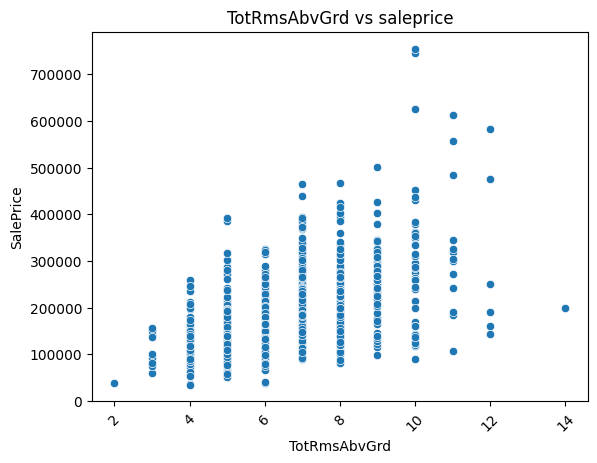

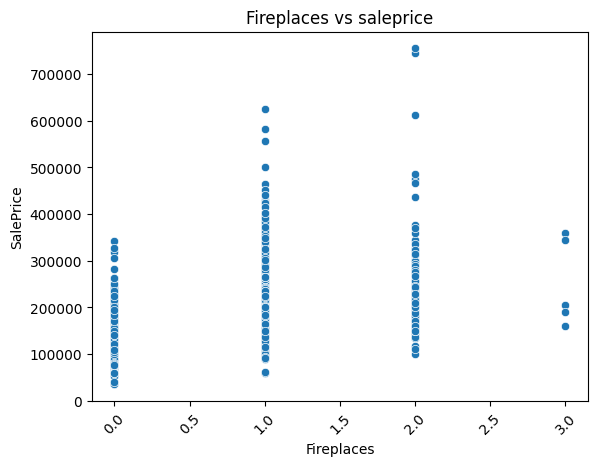

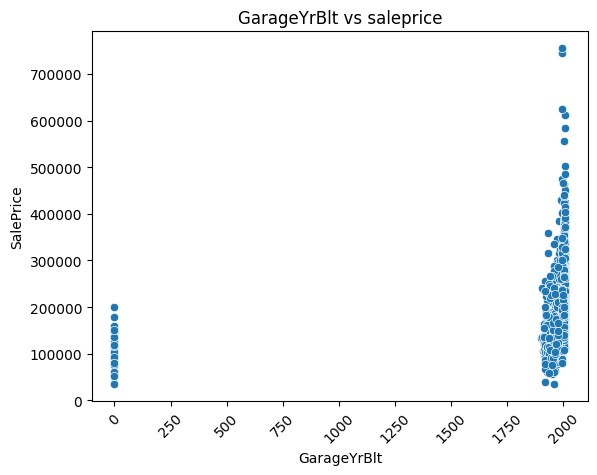

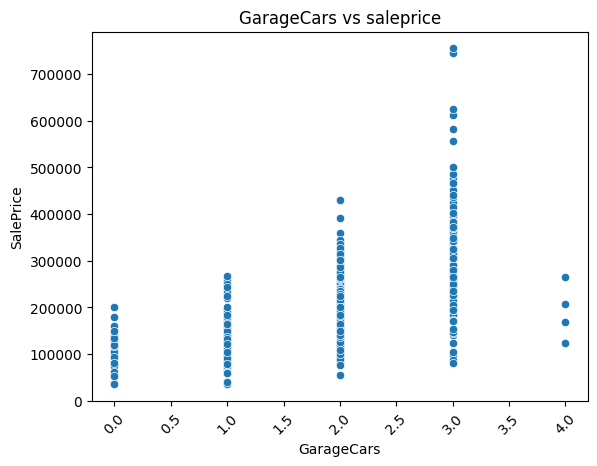

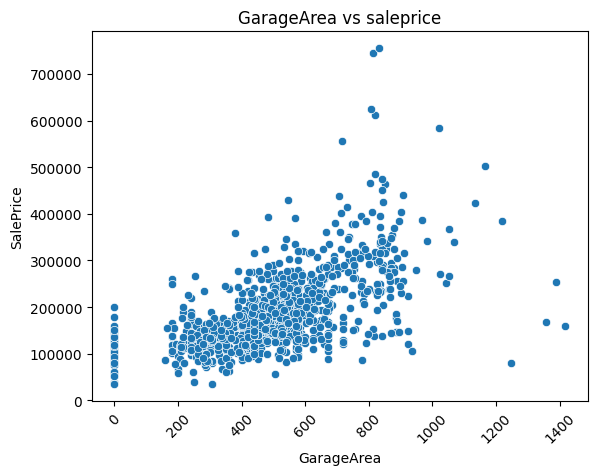

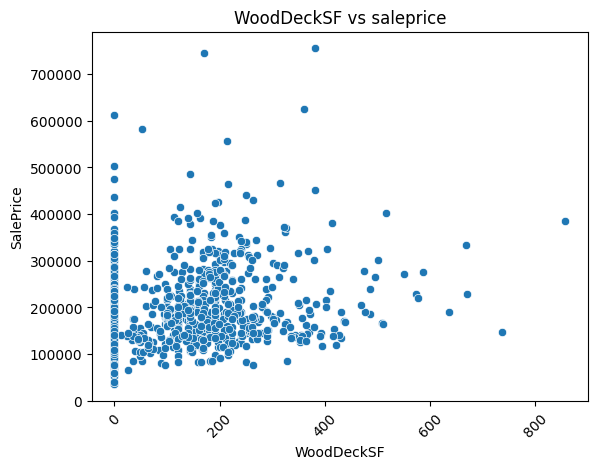

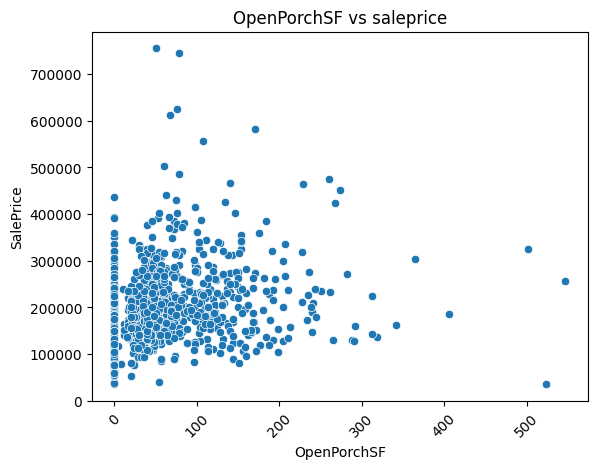

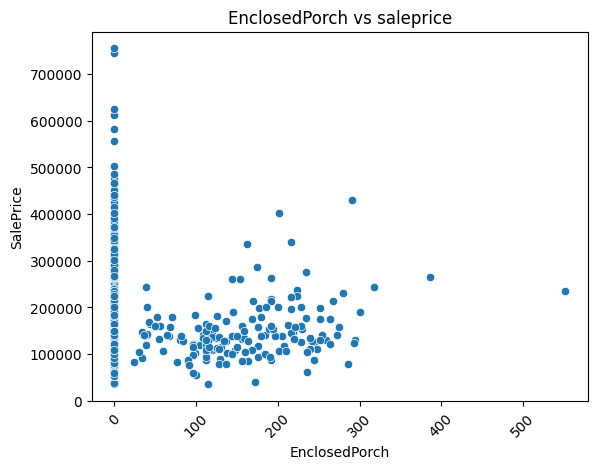

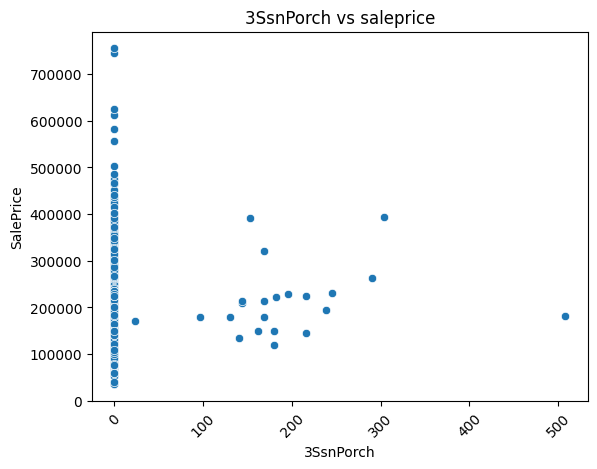

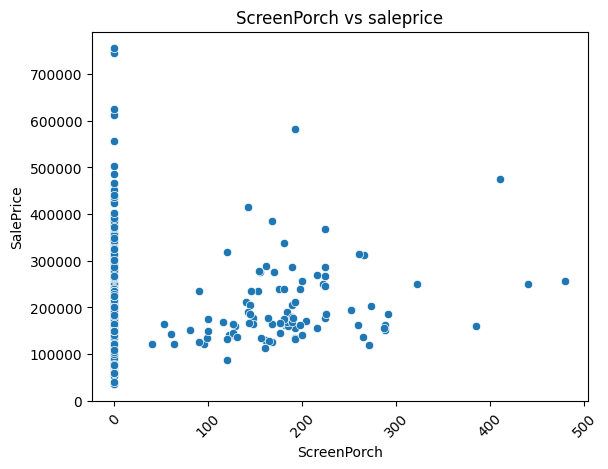

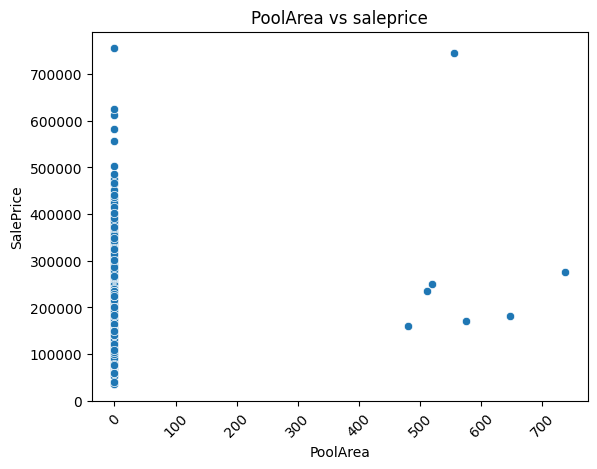

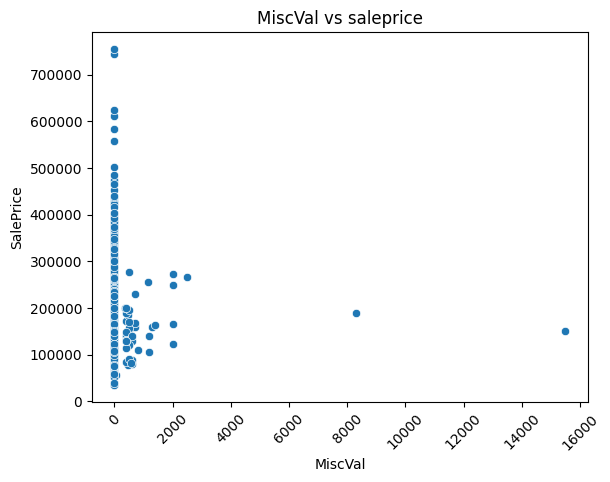

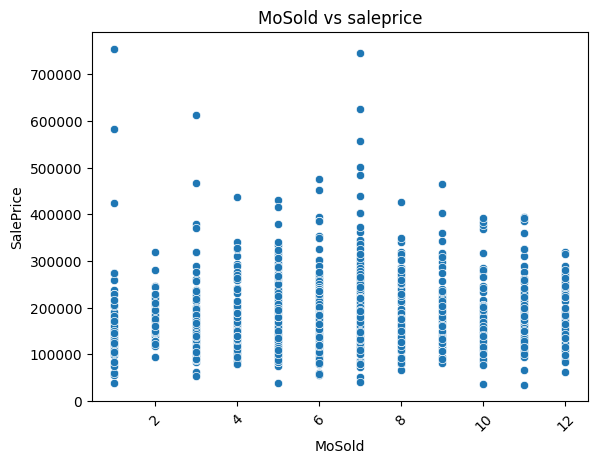

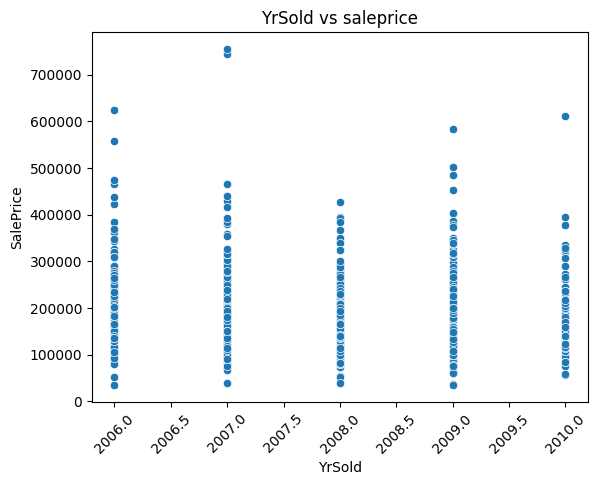

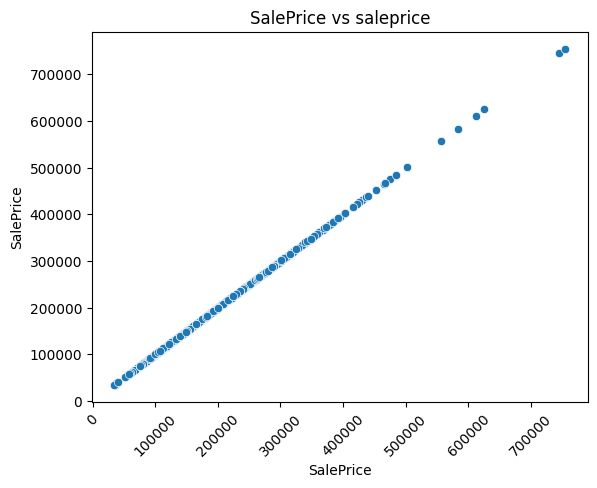

In [375]:
for col in train_data.columns:
    if train_data[col].dtype != 'object':
      sns.scatterplot(x = train_data[col] , y = train_data['SalePrice'])
      plt.xticks(rotation=45)
      plt.title(f'{col} vs saleprice')
      plt.show()

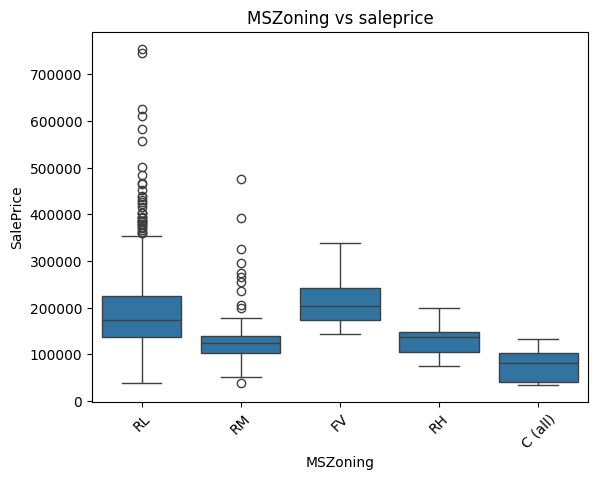

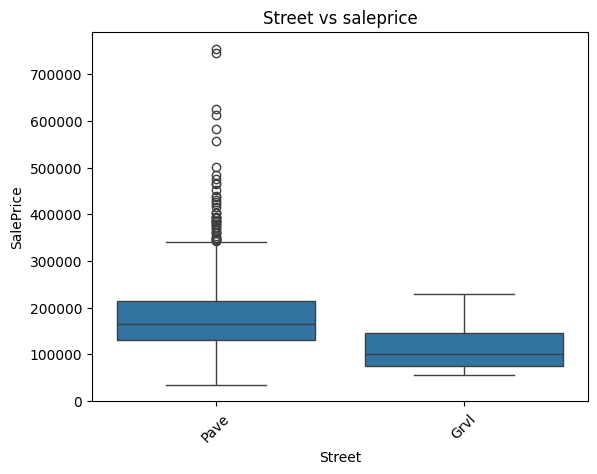

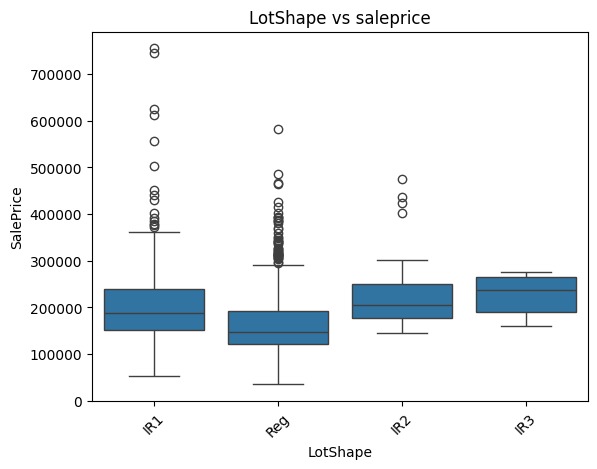

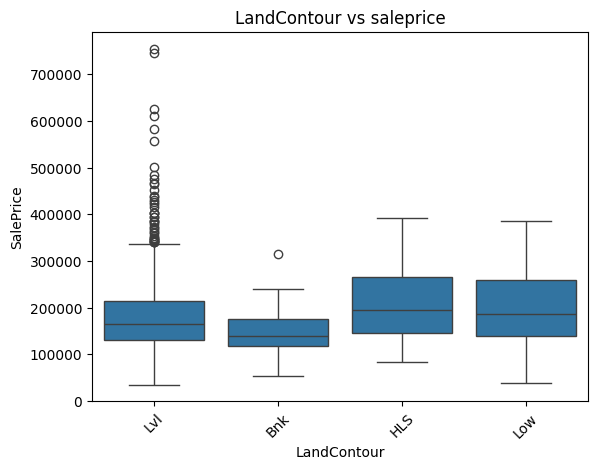

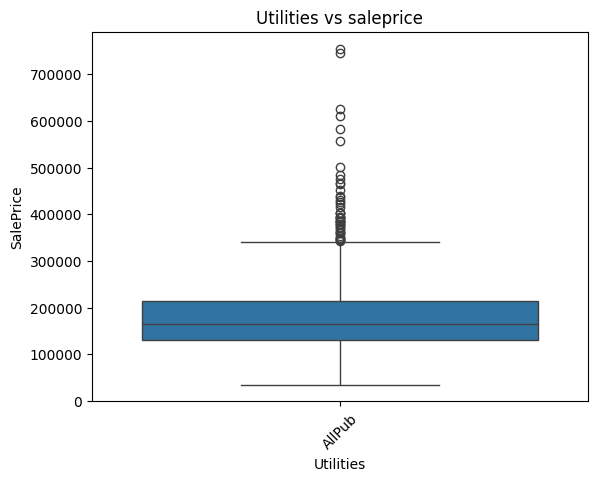

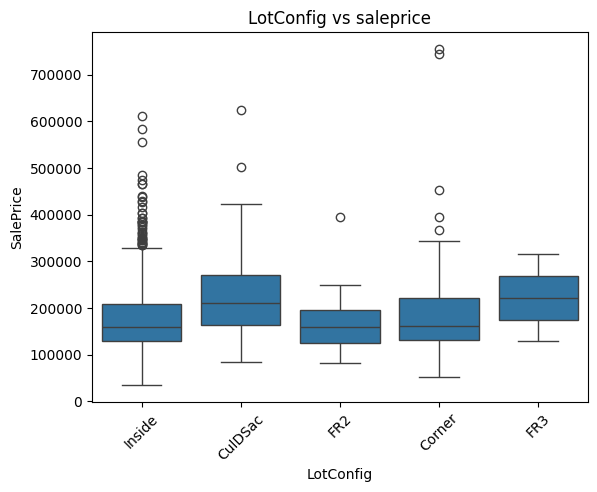

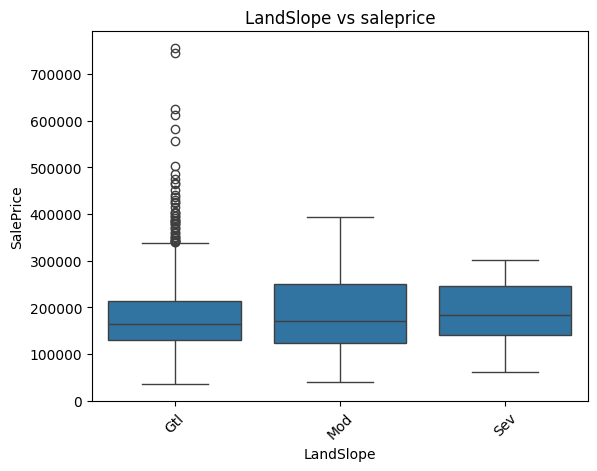

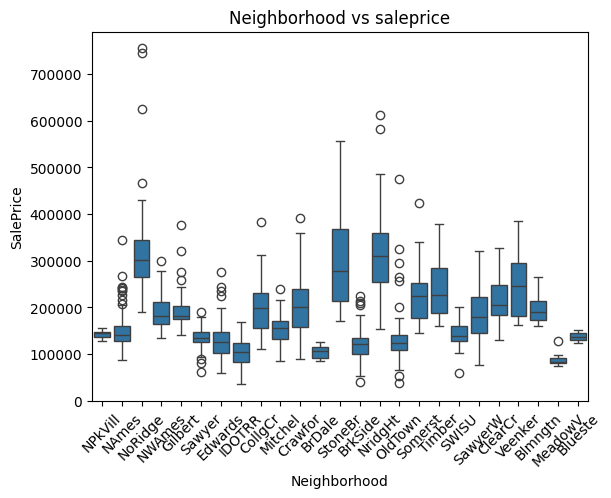

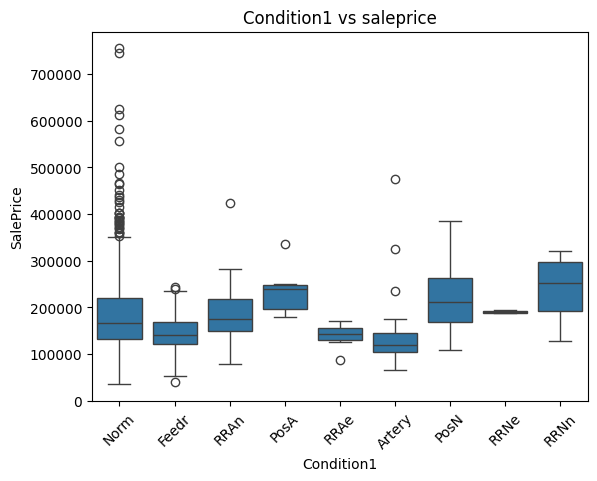

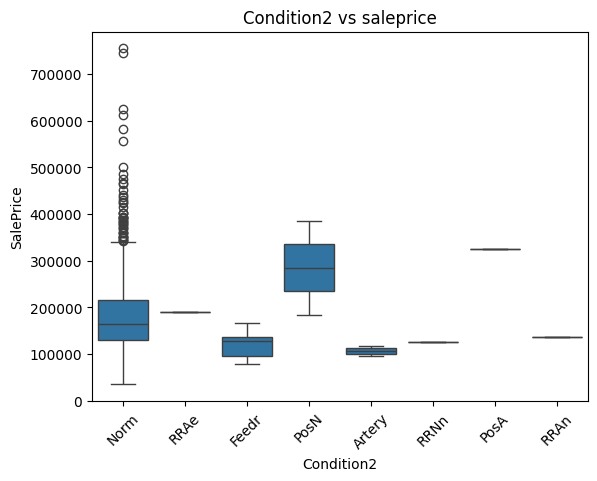

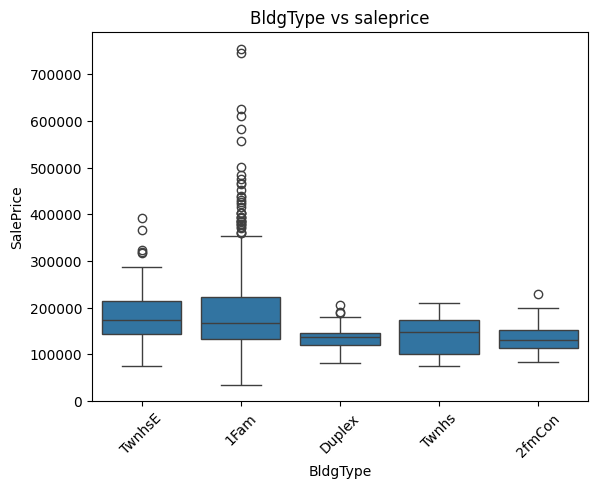

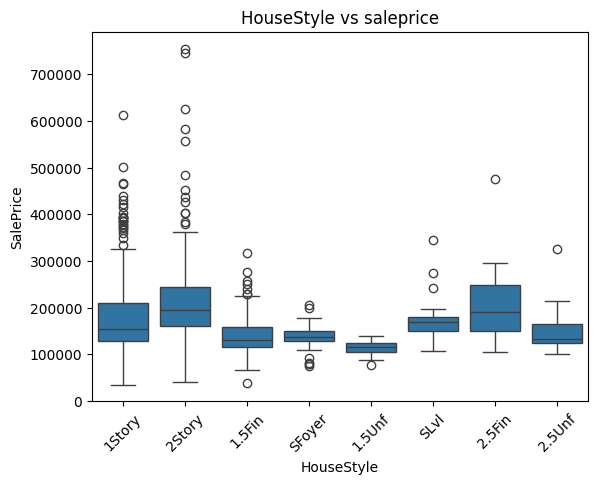

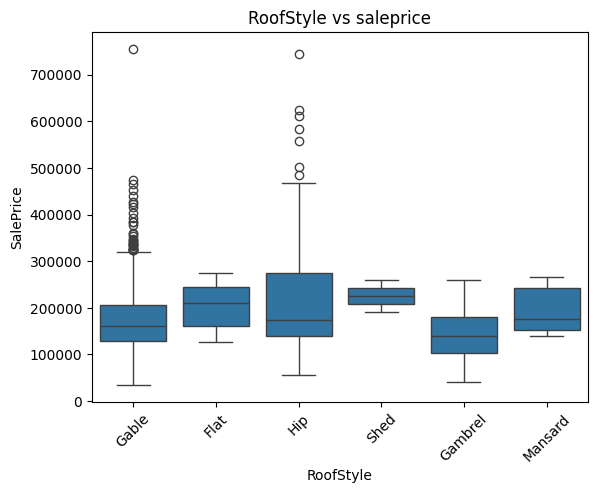

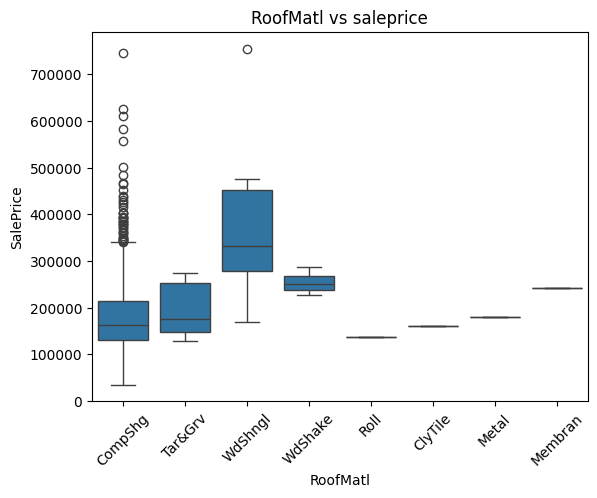

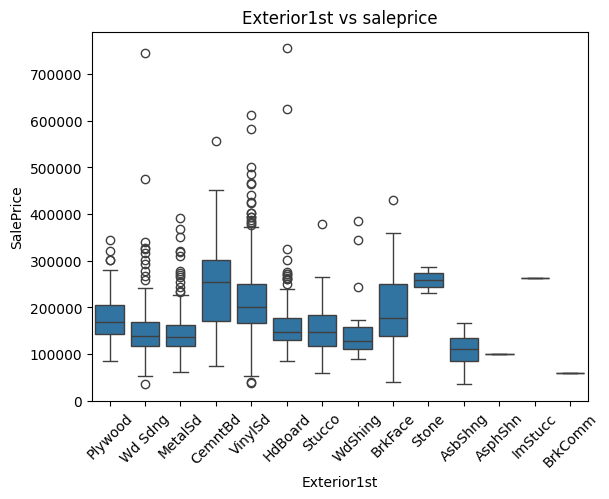

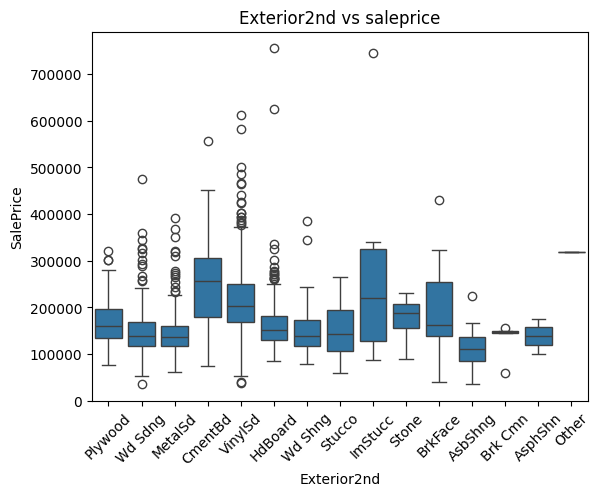

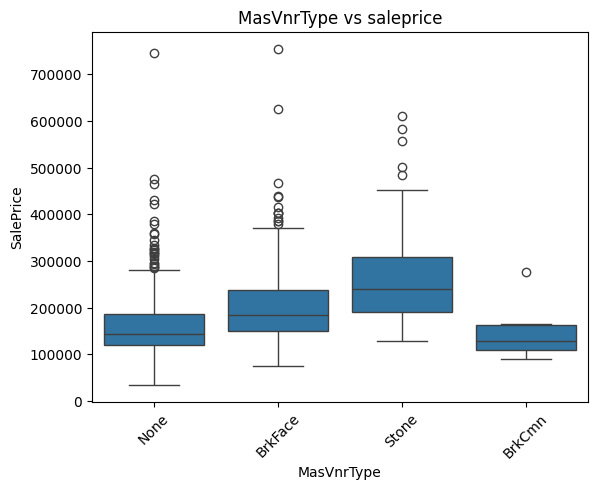

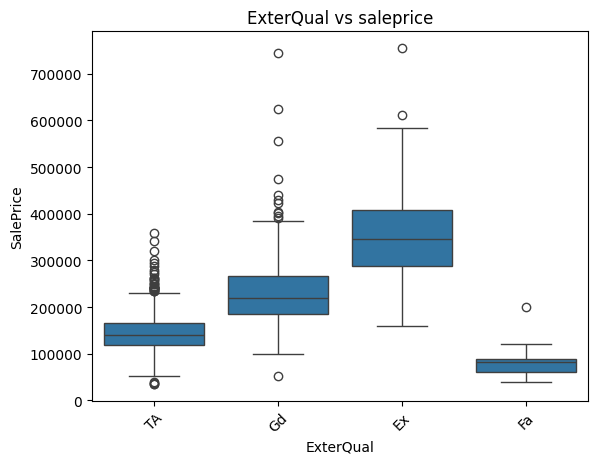

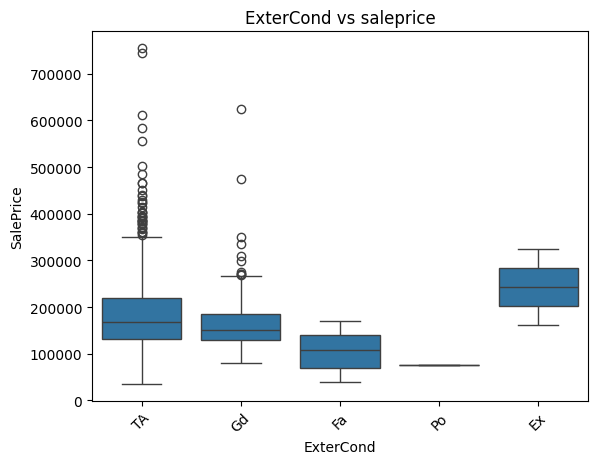

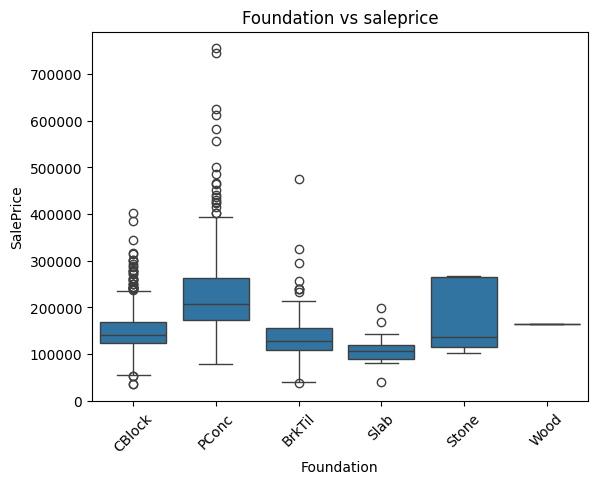

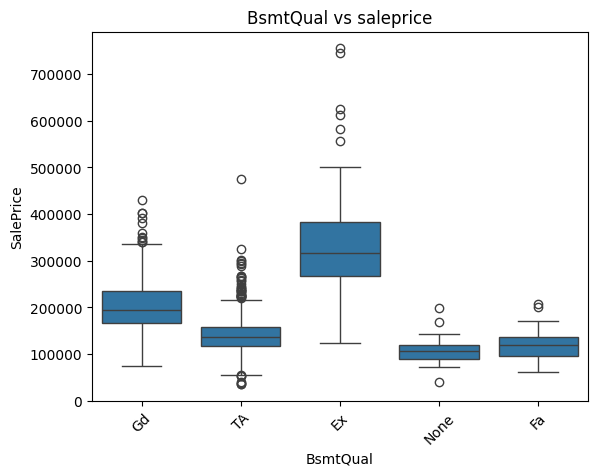

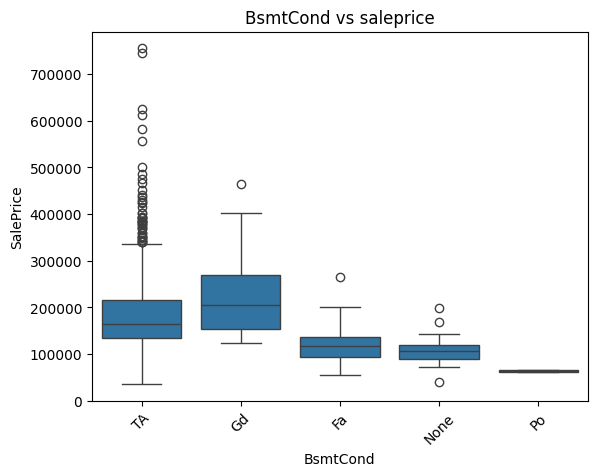

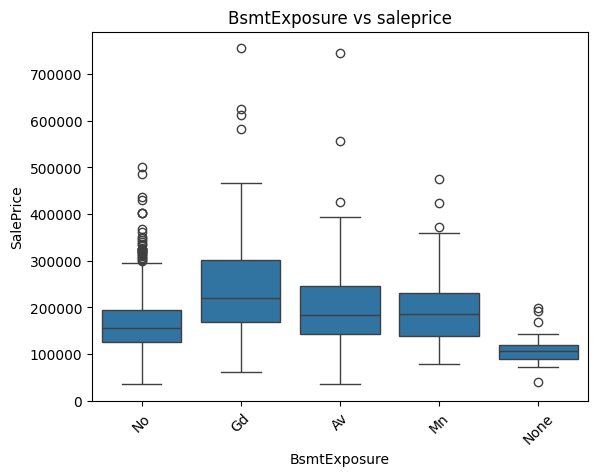

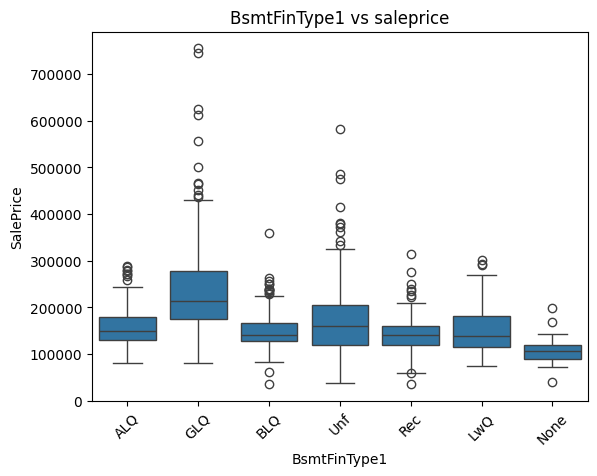

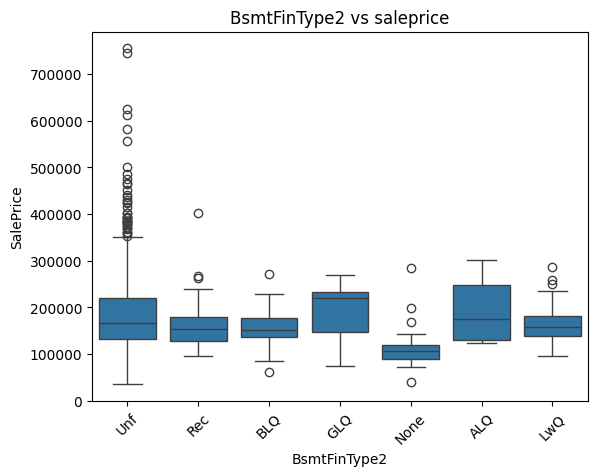

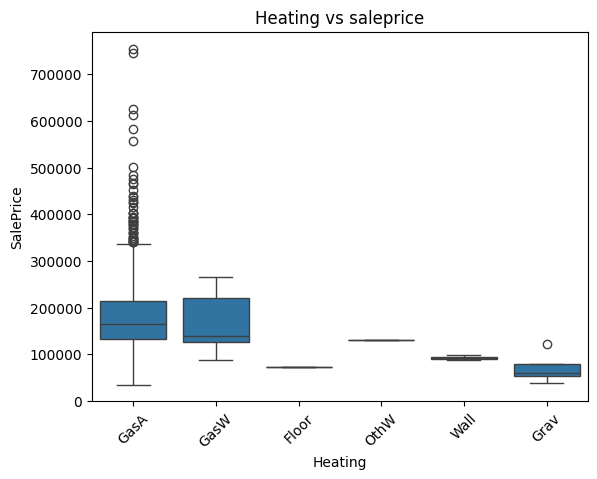

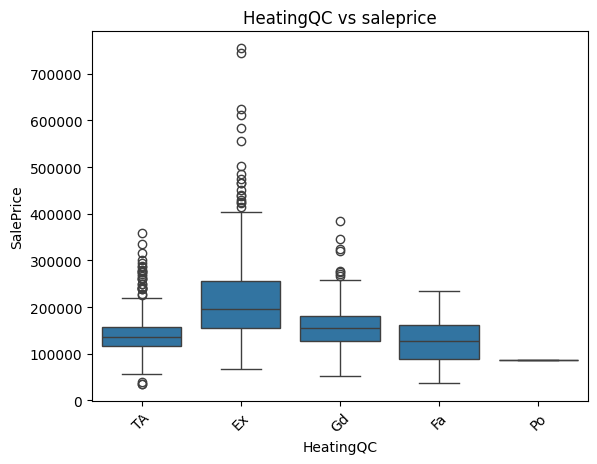

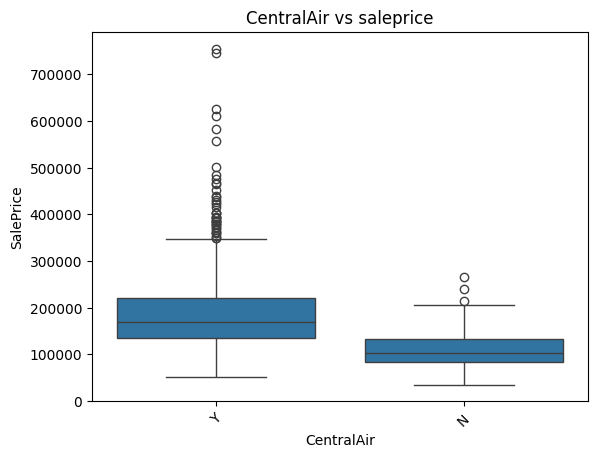

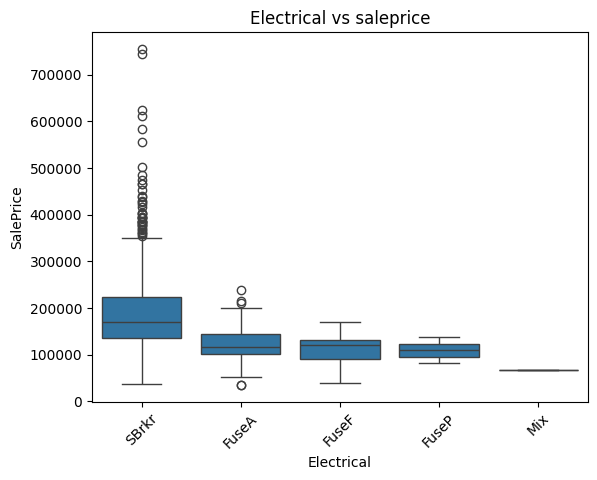

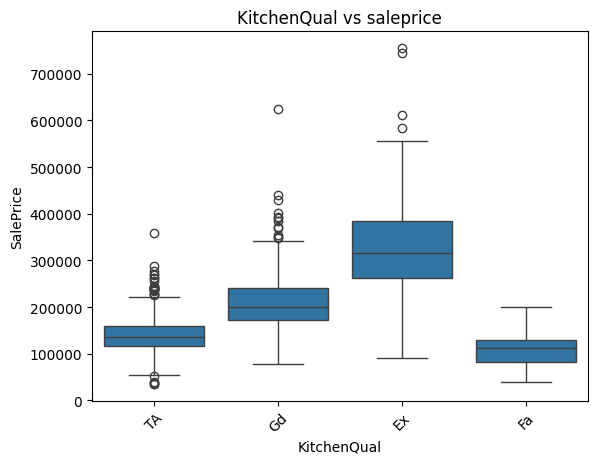

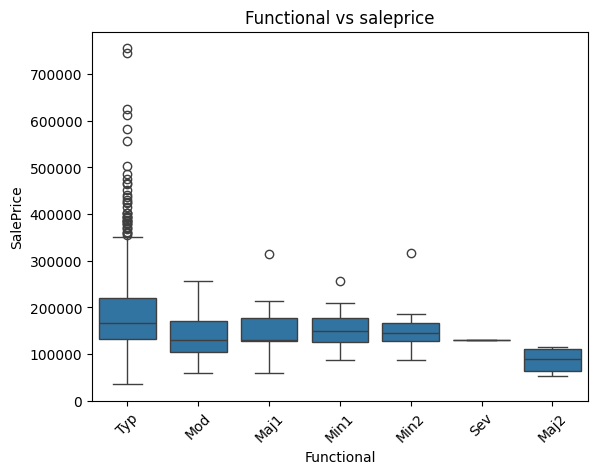

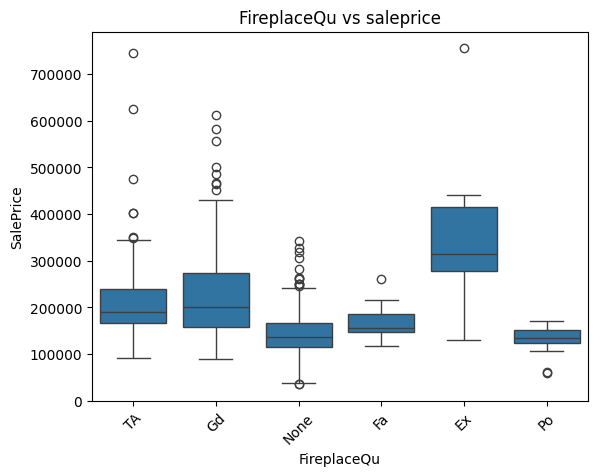

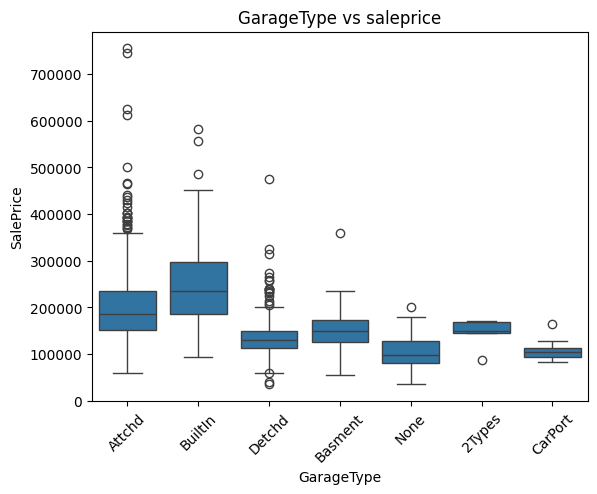

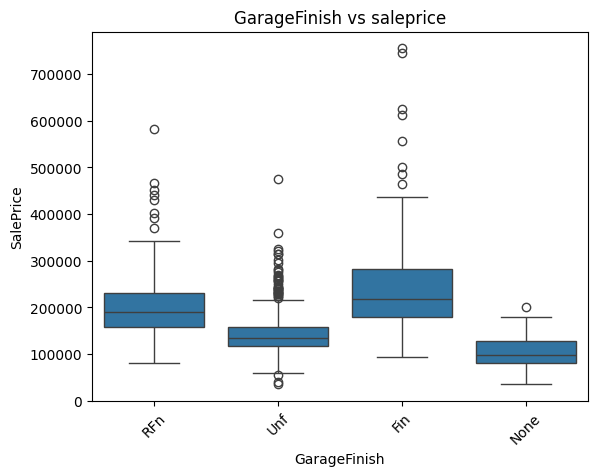

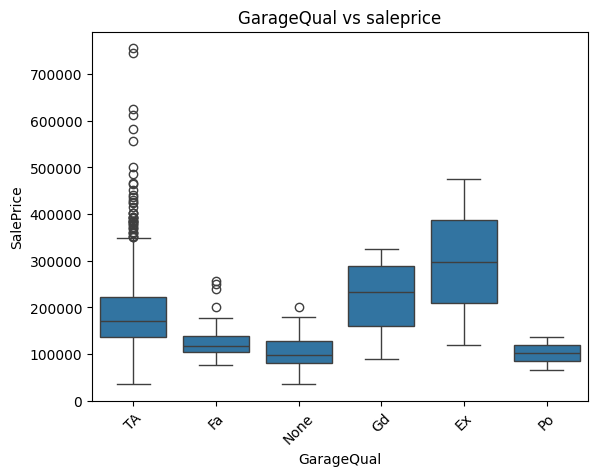

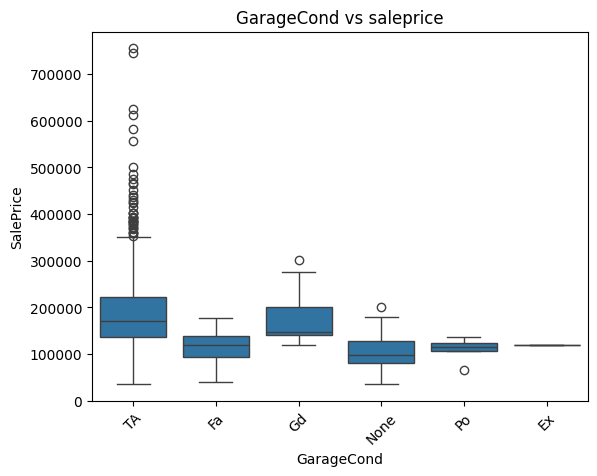

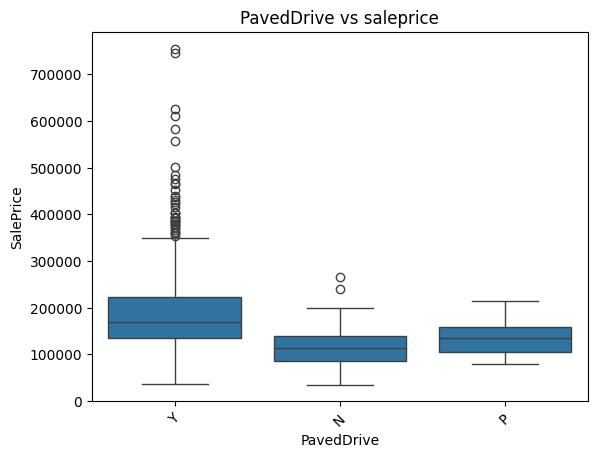

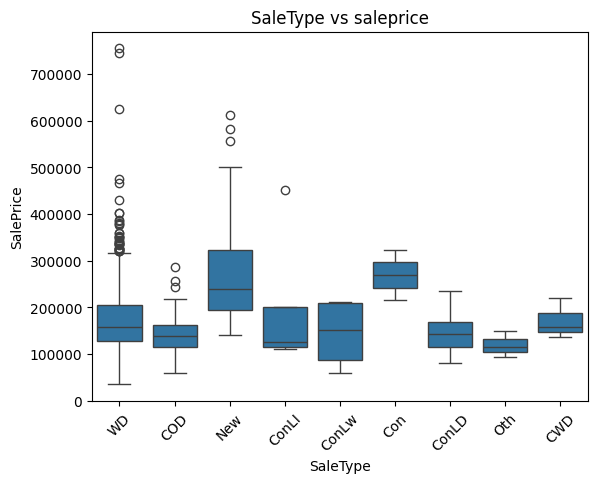

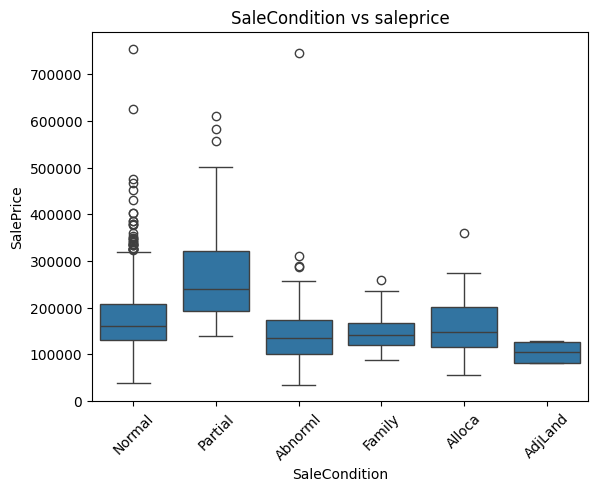

In [376]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
      sns.boxplot(x = train_data[col] , y = train_data['SalePrice'] )
      plt.xticks(rotation=45)
      plt.title(f'{col} vs saleprice')
      plt.show()

In [377]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL     70.98847     4928   Pave      IR1         Lvl   
1  889          20       RL     95.00000    15865   Pave      IR1         Lvl   
2  793          60       RL     92.00000     9920   Pave      IR1         Lvl   
3  110          20       RL    105.00000    11751   Pave      IR1         Lvl   
4  422          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub    Inside  ...             0         0         224        0   
2    AllPub   CulDSac  ...             0         0           0        0   
3    AllPub    Inside  ...             0         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 77 columns]

In [378]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# Get the union of all columns
all_columns = train_data_encoded.columns.union(test_data_encoded.columns)

# Reindex train_data_encoded and test_data_encoded to ensure all columns are present
train_data = train_data_encoded.reindex(columns=all_columns, fill_value=0)
test_data = test_data_encoded.reindex(columns=all_columns, fill_value=0)

# Now train_data_encoded and test_data_encoded have the same columns


In [379]:
train_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BldgType_2fmCon  \
0       958         0          0             2            False   
1      2217         0          0             4            False   
2      1127       886          0             3            False   
3      1844         0          0             3            False   
4      1602         0          0             3            False   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Gd  \
0            False           False             True        False   
1            False           False            False         True   
2            False           False            False        False   
3            False           False            False        False   
4            False           False            False        False   

   BsmtCond_None  ...  SaleType_WD  ScreenPorch  Street_Pave  TotRmsAbvGrd  \
0          False  ...         True            0         True             5   
1          False  ...         True          224         True             8   
2          False  ...         True            0         True             8   
3          False  ...        False            0         True             7   
4          False  ...         True            0         True             8   

   TotalBsmtSF  Utilities_NoSeWa  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  
0         1078                 0           0       1976          1976    2007  
1         2217                 0          81       1970          1970    2007  
2         1117                 0         180       1996          1997    2007  
3         1844                 0           0       1977          1977    2010  
4         1602                 0         240       1977          2000    2009  

[5 rows x 248 columns]

In [380]:
test_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BldgType_2fmCon  \
0      1922         0          0             3            False   
1      1360         0          0             1            False   
2      1788         0          0             3            False   
3       860       704          0             3            False   
4       894      1039          0             4            False   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Gd  \
0            False           False            False        False   
1            False           False             True        False   
2            False           False            False        False   
3            False           False            False        False   
4            False           False            False        False   

   BsmtCond_None  ...  SaleType_WD  ScreenPorch  Street_Pave  TotRmsAbvGrd  \
0          False  ...         True            0         True             8   
1          False  ...        False            0         True             4   
2          False  ...         True            0         True             7   
3          False  ...         True            0         True             7   
4          False  ...         True            0         True             9   

   TotalBsmtSF  Utilities_NoSeWa  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  
0         1922             False         178       2005          2006    2007  
1         1220             False          63       1984          1984    2009  
2         1753             False         202       2001          2001    2009  
3          704             False           0       1941          1950    2009  
4          894             False         100       2007          2007    2008  

[5 rows x 248 columns]

In [381]:
y_train = train_data['SalePrice']
x_train = train_data.drop('SalePrice' , axis = 1)
x_test = test_data.drop('SalePrice' , axis = 1)

In [382]:
minmax = MinMaxScaler()
x_traind = minmax.fit_transform(x_train)
x_testd = minmax.fit_transform(x_test)

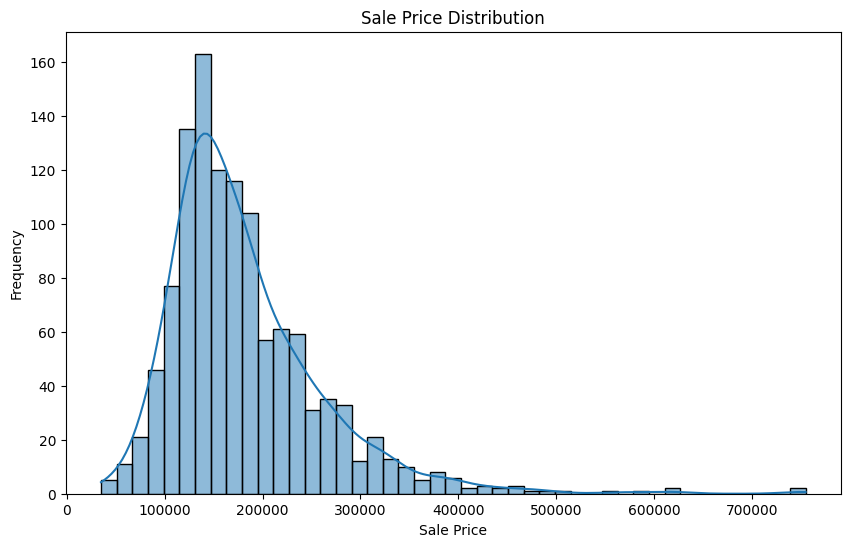

In [383]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train , kde=True  )
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [384]:
x_train.shape

(1168, 247)

In [385]:
x_test.shape

(292, 247)

In [386]:
x_traind = pd.DataFrame(x_traind, columns= x_train.columns)
x_testd = pd.DataFrame(x_testd , columns = x_train.columns)


In [387]:
thres = VarianceThreshold(threshold=0)
thres.fit(x_traind)

VarianceThreshold(threshold=0)

In [388]:
x_traind.columns[thres.get_support()].size

244

In [389]:
col = [col for col in x_train.columns if col not in x_train.columns[thres.get_support()]]
col

['Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Utilities_NoSeWa']

In [390]:
x_traind.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BldgType_2fmCon  \
0  0.143185  0.000000        0.0         0.250              0.0   
1  0.432079  0.000000        0.0         0.500              0.0   
2  0.181964  0.429056        0.0         0.375              0.0   
3  0.346489  0.000000        0.0         0.375              0.0   
4  0.290959  0.000000        0.0         0.375              0.0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Gd  \
0              0.0             0.0              1.0          0.0   
1              0.0             0.0              0.0          1.0   
2              0.0             0.0              0.0          0.0   
3              0.0             0.0              0.0          0.0   
4              0.0             0.0              0.0          0.0   

   BsmtCond_None  ...  SaleType_WD  ScreenPorch  Street_Pave  TotRmsAbvGrd  \
0            0.0  ...          1.0     0.000000          1.0      0.250000   
1            0.0  ...          1.0     0.466667          1.0      0.500000   
2            0.0  ...          1.0     0.000000          1.0      0.500000   
3            0.0  ...          0.0     0.000000          1.0      0.416667   
4            0.0  ...          1.0     0.000000          1.0      0.500000   

   TotalBsmtSF  Utilities_NoSeWa  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  
0     0.176432               0.0    0.000000   0.748148      0.433333    0.25  
1     0.362848               0.0    0.094516   0.703704      0.333333    0.25  
2     0.182815               0.0    0.210035   0.896296      0.783333    0.25  
3     0.301800               0.0    0.000000   0.755556      0.450000    1.00  
4     0.262193               0.0    0.280047   0.755556      0.833333    0.75  

[5 rows x 247 columns]

In [391]:
# pca = PCA(n_components = 20)
# x_traind = pca.fit_transform(x_traind)
# x_testd = pca.fit_transform(x_testd)

# x_trainf.columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20']
# x_testf.columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20']
from sklearn.preprocessing import MinMaxScaler
columns = x_train.columns
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Convert the scaled numpy arrays back to DataFrames
x_trainf = pd.DataFrame(x_train_scaled, columns=columns)
x_testf = pd.DataFrame(x_test_scaled, columns=columns)

In [392]:
# correlation_matrix = x_trainf.corr()

# plt.figure(figsize=(20, 10))
# sns.heatmap(correlation_matrix, cmap='coolwarm' , annot=True)   # annot for showing values
# plt.title('Correlation Matrix')
# plt.show()

In [393]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error


In [394]:
models = {
    'linear regression': LinearRegression(),
    'decision tree': DecisionTreeRegressor(random_state=42),
    'random forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'svm': SVR(),
    'xgboost': XGBRegressor(n_estimators=100, random_state=42),
    'gradient boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

In [ ]:
custom_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
for model_name, model in models.items():
    scores = cross_val_score(model, x_trainf, y_train, cv=5, scoring=custom_scorer)
    mean_score = scores.mean()
    print(f'{model_name}: Mean Absolute Error (MAE): {-mean_score}')


In [396]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_trainf , y_train , test_size = 0.2 , random_state = 42)


In [397]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name}: Mean Squared Error (MSE): {mse}')
    print(f'{model_name}: R-squared (R2): {r2}')

linear regression: Mean Squared Error (MSE): 2.779027356773416e+31
linear regression: R-squared (R2): -3.9831188783151286e+21
decision tree: Mean Squared Error (MSE): 2543824919.2521367
decision tree: R-squared (R2): 0.6353991609940178
random forest: Mean Squared Error (MSE): 1467048083.3369575
random forest: R-squared (R2): 0.7897312201014113
svm: Mean Squared Error (MSE): 7249040265.66405
svm: R-squared (R2): -0.03898902115727454
xgboost: Mean Squared Error (MSE): 1452192819.1733227
xgboost: R-squared (R2): 0.7918603924893086
gradient boosting: Mean Squared Error (MSE): 1332645404.2374787
gradient boosting: R-squared (R2): 0.8089948609256895
